## MODELISATION



Ce note book vise à developper les modèles qui aiderons dans la prediction de la consommation d'énergie dans la ville de Seattle. Pour atteindre cet objectif, après importation de la base nettoyé data_cleaned nous allons 
d'abord effectué les opérations de remises à l'échelle (standartisation) sur les variables numériques de notre Data set et tranformer les variables catégorielles à l'aide du One-Hot Encoder ensuite nous ferrons la modélisation proprement dite.
Pour la modelisation nous ferons deux cas :
    . le premier cas consistera à faire la modélisation sans prendre en compte la variable ENERGYSTARScore
    . Le second consistera à prédire la consommation d'energie en introduisant la variable ENERGYSTARScore

## IMPORTATION DES PACKAGES

In [2]:
# Importation des bibliothèques nécessaires 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso, LassoCV,RidgeCV,Ridge,ElasticNet,ElasticNetCV
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
#import xgboost as xgb
#from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import statsmodels.api as sm

In [3]:
%%sh
pwd

Couldn't find program: 'sh'


In [5]:
# Return a new path pointing to the current working directory
HOME_DIR = Path.cwd().parent

# create a variable for data directory
DATA_DIR = Path(HOME_DIR, "machine learning")

print(f"Work directory: {HOME_DIR} \nData directory: {DATA_DIR}")

Work directory: C:\Users\HP\Documents\ISE2_2023_2024 
Data directory: C:\Users\HP\Documents\ISE2_2023_2024\machine learning


Importation de la base nettoyée

In [6]:
data_cleaned = pd.read_csv(Path(DATA_DIR, "data_cleaned.csv"))


### MODELE SANS INSERTION DE LA VARIABLE ENERGIE ENERGYSTARScore 

In [7]:
# Suppression de la variable ENERGYSTARScore
data_cleaned=data_cleaned.drop(["ENERGYSTARScore"],axis=1)

## feature scaling des variables

Les variables de notre jeu de données ayant une très grande échelle, nous allons faire du feature scaling 
(les remettre à l'echelle) pour rendre nos données homogènes. La méthode privilégiée dans notre cas est la 
standardisation car les méthodes (regression) utilisées reposent sur l'hypothèse de normalité.

In [8]:
data_cleaned.columns

Index(['Unnamed: 0', 'OSEBuildingID', 'BuildingType', 'PrimaryPropertyType',
       'Neighborhood', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'SourceEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kBtu)', 'NaturalGas(kBtu)', 'ComplianceStatus', 'Outlier',
       'TotalGHGEmissions', 'GHGEmissionsIntensity', 'NumberOfUse',
       'BuildingAge', 'SiteEnergyUse(log(kBtu))'],
      dtype='object')

In [9]:
col_num = data_cleaned.select_dtypes(['int64','float64']).columns
col_num

Index(['Unnamed: 0', 'OSEBuildingID', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA',
       'SourceEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kBtu)', 'NaturalGas(kBtu)', 'TotalGHGEmissions',
       'GHGEmissionsIntensity', 'NumberOfUse', 'BuildingAge',
       'SiteEnergyUse(log(kBtu))'],
      dtype='object')

In [10]:
Var_cat=data_cleaned.select_dtypes(['object']).columns
Var_cat

Index(['BuildingType', 'PrimaryPropertyType', 'Neighborhood',
       'LargestPropertyUseType', 'SecondLargestPropertyUseType',
       'ThirdLargestPropertyUseType', 'ComplianceStatus', 'Outlier'],
      dtype='object')

selection des variables qualitatives pour la modélisation

In [14]:

var_norm=[ 'NumberofFloors', 'PropertyGFATotal',
       'SourceEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kBtu)', 'NaturalGas(kBtu)', 'TotalGHGEmissions',
       'GHGEmissionsIntensity', 'NumberOfUse', 'BuildingAge',
       'SiteEnergyUse(log(kBtu))']
var_cat=['BuildingType', 'PrimaryPropertyType', 'Neighborhood']

In [15]:
data_cleaned[var_norm].isnull().sum()

NumberofFloors              0
PropertyGFATotal            0
SourceEUI(kBtu/sf)          0
SiteEnergyUse(kBtu)         0
SteamUse(kBtu)              0
Electricity(kBtu)           0
NaturalGas(kBtu)            0
TotalGHGEmissions           0
GHGEmissionsIntensity       0
NumberOfUse                 0
BuildingAge                 0
SiteEnergyUse(log(kBtu))    0
dtype: int64

In [28]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1295 entries, 0 to 1294
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       1295 non-null   int64  
 1   OSEBuildingID                    1295 non-null   int64  
 2   BuildingType                     1295 non-null   object 
 3   PrimaryPropertyType              1295 non-null   object 
 4   Neighborhood                     1295 non-null   object 
 5   YearBuilt                        1295 non-null   int64  
 6   NumberofBuildings                1295 non-null   float64
 7   NumberofFloors                   1295 non-null   float64
 8   PropertyGFATotal                 1295 non-null   float64
 9   PropertyGFAParking               1295 non-null   int64  
 10  PropertyGFABuilding(s)           1295 non-null   int64  
 11  LargestPropertyUseType           1295 non-null   object 
 12  LargestPropertyUseTy

In [30]:
data_mod=data_cleaned[['NumberofFloors', 'PropertyGFATotal',
       'SourceEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kBtu)', 'NaturalGas(kBtu)', 'TotalGHGEmissions',
       'GHGEmissionsIntensity', 'NumberOfUse', 'BuildingAge',
       'SiteEnergyUse(log(kBtu))','BuildingType', 'PrimaryPropertyType', 'Neighborhood']]

In [31]:
data_mod

NumberofFloors  PropertyGFATotal  SourceEUI(kBtu/sf)  \
0           1.391058         -0.089255            0.033681   
1           1.218161          0.001653            0.000434   
2           6.405090          5.123454            0.342247   
3           1.045263         -0.252147            0.208742   
4          -0.337918         -0.036063            0.728733   
...              ...               ...                 ...   
1290       -0.510816         -0.546679           -0.074369   
1291       -0.510816         -0.524415           -0.321118   
1292       -0.510816         -0.541494            2.954668   
1293       -0.510816         -0.535823           -0.367351   
1294       -0.510816         -0.510849           -0.312807   

      SiteEnergyUse(kBtu)  SteamUse(kBtu)  Electricity(kBtu)  \
0                0.046947        1.045306          -0.068894   
1                0.127279       -0.135340          -0.129545   
2                4.567149       12.571236           3.862555   
3                0.017086        1.169366          -0.170422   
4                0.383072       -0.135340           0.226556   
...                   ...             ...                ...   
1290            -0.394046       -0.135340          -0.364030   
1291            -0.387093       -0.135340          -0.375046   
1292            -0.054055       -0.135340          -0.254671   
1293            -0.403055       -0.135340          -0.379158   
1294            -0.373081       -0.135340          -0.371940   

      NaturalGas(kBtu)  TotalGHGEmissions  GHGEmissionsIntensity  NumberOfUse  \
0            -0.058085           0.341808               0.659356    -0.657886   
1             0.700881           0.477402               0.674224     0.966446   
2            -0.015445           5.777713               0.342162    -0.657886   
3             0.046827           0.449533               1.571287    -0.657886   
4             0.616541           0.494987               0.793172    -0.657886   
...                ...                ...                    ...          ...   
1290         -0.244652          -0.335102               0.099311    -0.657886   
1291         -0.199872          -0.301913               0.252951    -0.657886   
1292          0.471081           0.263666               7.677265     0.966446   
1293         -0.235799          -0.331644               0.034881     2.590779   
1294         -0.167185          -0.275018               0.376855     2.590779   

      BuildingAge  SiteEnergyUse(log(kBtu))        BuildingType  \
0        1.003184                  0.760770      NonResidential   
1       -1.078213                  0.878490      NonResidential   
2       -0.263753                  2.582787      NonResidential   
3        1.033349                  0.712113      NonResidential   
4       -1.168708                  1.166993  Nonresidential COS   
...           ...                       ...                 ...   
1290    -0.897222                 -0.929754  Nonresidential COS   
1291    -1.319534                 -0.841447  Nonresidential COS   
1292    -0.414579                  0.582462  Nonresidential COS   
1293    -0.867056                 -1.061186  Nonresidential COS   
1294     0.671367                 -0.688802  Nonresidential COS   

     PrimaryPropertyType           Neighborhood  
0                  Hotel               Downtown  
1                  Hotel               Downtown  
2                  Hotel               Downtown  
3                  Hotel               Downtown  
4                  Other               Downtown  
...                  ...                    ...  
1290              Office       Greater duwamish  
1291               Other               Downtown  
1292               Other  Magnolia / queen anne  
1293  Mixed Use Property       Greater duwamish  
1294  Mixed Use Property       Greater duwamish  

[1295 rows x 15 columns]


Nous allons appliquer le logarithme des variables présentes dans le vecteur var_log 
ceci par soucis de remise à l'échelle et dans le but de normaliser ses variables.

In [32]:
# standardisation des variables numériques
data_mod[var_norm] = StandardScaler().fit_transform(data_mod[var_norm])

C:\Users\HP\AppData\Local\Temp\ipykernel_4924\2568595305.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_mod[var_norm] = StandardScaler().fit_transform(data_mod[var_norm])


Verification de la normalisation des variables numériques

In [34]:
def verification_normalisation(data_mod):
      for variable_norm in data_mod :
        data_mod_col=data_mod[variable_norm]
        moyenne=np.mean(data_mod_col)
        ecartType = np.std(data_mod_col)

        print("les statistiques pour la variable {}" .format(variable_norm))
        print("La moyenne est de : {} ".format(round(abs(moyenne), 2)))
        print("L'écart type est de : {} ".format(round(abs(ecartType), 2)))
        print(" ")
        print(" ")

In [35]:
verification_normalisation(data_cleaned[var_norm])

les statistiques pour la variable NumberofFloors
La moyenne est de : 0.0 
L'écart type est de : 1.0 
 
 
les statistiques pour la variable PropertyGFATotal
La moyenne est de : 0.0 
L'écart type est de : 1.0 
 
 
les statistiques pour la variable SourceEUI(kBtu/sf)
La moyenne est de : 0.0 
L'écart type est de : 1.0 
 
 
les statistiques pour la variable SiteEnergyUse(kBtu)
La moyenne est de : 0.0 
L'écart type est de : 1.0 
 
 
les statistiques pour la variable SteamUse(kBtu)
La moyenne est de : 0.0 
L'écart type est de : 1.0 
 
 
les statistiques pour la variable Electricity(kBtu)
La moyenne est de : 0.0 
L'écart type est de : 1.0 
 
 
les statistiques pour la variable NaturalGas(kBtu)
La moyenne est de : 0.0 
L'écart type est de : 1.0 
 
 
les statistiques pour la variable TotalGHGEmissions
La moyenne est de : 0.0 
L'écart type est de : 1.0 
 
 
les statistiques pour la variable GHGEmissionsIntensity
La moyenne est de : 0.0 
L'écart type est de : 1.0 
 
 
les statistiques pour la vari


Commentaire: Les variables ont bien été standartisée car chacune d'elle à une moyenne de zéro et
un écart-type de 1.

In [36]:
# affichage de l'entête de la base de donnée après normalisation des varibles
data_mod.head()

NumberofFloors  PropertyGFATotal  SourceEUI(kBtu/sf)  SiteEnergyUse(kBtu)  \
0        1.391058         -0.089255            0.033681             0.046947   
1        1.218161          0.001653            0.000434             0.127279   
2        6.405090          5.123454            0.342247             4.567149   
3        1.045263         -0.252147            0.208742             0.017086   
4       -0.337918         -0.036063            0.728733             0.383072   

   SteamUse(kBtu)  Electricity(kBtu)  NaturalGas(kBtu)  TotalGHGEmissions  \
0        1.045306          -0.068894         -0.058085           0.341808   
1       -0.135340          -0.129545          0.700881           0.477402   
2       12.571236           3.862555         -0.015445           5.777713   
3        1.169366          -0.170422          0.046827           0.449533   
4       -0.135340           0.226556          0.616541           0.494987   

   GHGEmissionsIntensity  NumberOfUse  BuildingAge  SiteEnergyUse(log(kBtu))  \
0               0.659356    -0.657886     1.003184                  0.760770   
1               0.674224     0.966446    -1.078213                  0.878490   
2               0.342162    -0.657886    -0.263753                  2.582787   
3               1.571287    -0.657886     1.033349                  0.712113   
4               0.793172    -0.657886    -1.168708                  1.166993   

         BuildingType PrimaryPropertyType Neighborhood  
0      NonResidential               Hotel     Downtown  
1      NonResidential               Hotel     Downtown  
2      NonResidential               Hotel     Downtown  
3      NonResidential               Hotel     Downtown  
4  Nonresidential COS               Other     Downtown

In [37]:

# vérification des valeurs manquantes sur les varibles quantitatives de notre dataset
data_mod[var_norm].isnull().sum()

NumberofFloors              0
PropertyGFATotal            0
SourceEUI(kBtu/sf)          0
SiteEnergyUse(kBtu)         0
SteamUse(kBtu)              0
Electricity(kBtu)           0
NaturalGas(kBtu)            0
TotalGHGEmissions           0
GHGEmissionsIntensity       0
NumberOfUse                 0
BuildingAge                 0
SiteEnergyUse(log(kBtu))    0
dtype: int64

## ENCODAGE DES VARIABLES CATEGORIELLES


Les modèles de machine Learning qui seront dévéloppés étant les modèles de regression, il est impératif de transformer les variables catégorielles de notre data set en variables numériques "quantitatives" (car se ne sont pas réellement les variables numériques) pour que le modèle puisse fonctionné Car ces modèles ne prennent en compte que les varibles numériques voire quantitative.

pour l'encodage des variables categorielles la methode utilisée sera celle du One-Hot Encoding qui consiste à diviser une variable catégorielle en N variables où chaque nouvelle variable correspond à une modalité prise par la variable catégorielle. Chaque variable créée est codée en 0 ou 1 selon la présence ou l'absence de cette modalité pour la ligne.

Le choix du One-Hot Encoding se justifie par le fait qu'il ne prend pas en compte l'ordre qui existe entre les variables et qu'on peut interprété les variables comme categorielles en calculant les proportions.


In [39]:
# reccupération des variables Catégorielles
col_cat = data_mod.select_dtypes(['object']).columns

Index(['BuildingType', 'PrimaryPropertyType', 'Neighborhood'], dtype='object')

In [40]:

# affichage de l'entête de la base de donnée pour les variables categorielles
data_mod[col_cat].head()

BuildingType PrimaryPropertyType Neighborhood
0      NonResidential               Hotel     Downtown
1      NonResidential               Hotel     Downtown
2      NonResidential               Hotel     Downtown
3      NonResidential               Hotel     Downtown
4  Nonresidential COS               Other     Downtown

#### Affichage du nombre de modalités pour chaque variables catégorielles

In [ ]:
data_mod["BuildingType"].unique().shape

(5,)

In [54]:
data_mod["PrimaryPropertyType"].unique().shape

(17,)

In [55]:
data_mod["Neighborhood"].unique().shape

(13,)

In [ ]:
data_cleaned["Outlier"].unique().shape

(3,)

In [44]:
col_num = data_mod.select_dtypes(['int64','float64']).columns

In [46]:
#création d'une instance one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#effectuer un one-hot encoding sur les colonnes 'col_cat'
data_ohe = pd.DataFrame(encoder.fit_transform(data_mod[col_cat]).toarray())

encoder.get_feature_names([col_cat])
data_ohe.columns = encoder.get_feature_names([col_cat])
#merge les colonnes one-hot encoded avec le DataFrame d'origine
data_mod_encode = pd.merge(data_mod[col_num].reset_index(), data_ohe, left_index = True, right_index = True)
#data_mod  = data_prepro[col_num].join(data_ohe)

data_mod_encode

AttributeError: 'OneHotEncoder' object has no attribute 'get_feature_names'

In [47]:
encoder = OneHotEncoder()

# Supposons que data_mod est votre DataFrame, col_cat est la liste de vos colonnes catégorielles, et col_num est la liste de vos colonnes numériques

# Appliquer l'encodage one-hot aux colonnes catégorielles
data_ohe = pd.DataFrame(encoder.fit_transform(data_mod[col_cat]).toarray(), columns=encoder.get_feature_names(col_cat))

# Merge des colonnes one-hot encoded avec le DataFrame d'origine
data_mod_encode = pd.merge(data_mod[col_num].reset_index(), data_ohe, left_index = True, right_index = True)
#data_mod  = data_prepro[col_num].join(data_ohe)

data_mod_encode

AttributeError: 'OneHotEncoder' object has no attribute 'get_feature_names'

In [62]:
## affichage du nom des colonnes du nouveau de la nouvelle base
data_mod_encode.columns

Index(['index', 'Unnamed: 0', 'OSEBuildingID', 'YearBuilt',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseTypeGFA',
       ...
       'ThirdLargestPropertyUseType_Sport center',
       'ThirdLargestPropertyUseType_Supermarket/Grocery Store',
       'ThirdLargestPropertyUseType_Warehouse',
       'ThirdLargestPropertyUseType_Without', 'ComplianceStatus_Compliant',
       'ComplianceStatus_Error - Correct Default Data',
       'ComplianceStatus_Non-Compliant', 'Outlier_High outlier',
       'Outlier_Low outlier', 'Outlier_Not outlier'],
      dtype='object', length=129)

## CHOIX DU MODELE DE REGRESSION

Nous allons tester 7 algorithmes de regression à savoir:
    . L'algorithme de regression linéaire
    . L'algorithme Linear_SVR
    . L'algorithme de RandomForest Regressor
    . L'algorithme XGBoost
    . L'algorithme du modèle Ridge
    . L'algorithme du modèle Lasso
    . L'algorithme du modele elastique net
Cela se fera sans optimisation des hyperparamètres et sera appliquer à la consommations d'énergies  et on va garder l'algorithme de regression qui donne les meilleurs scores pour l'appliquer aux prédictions.

 comme technique de validation croisée nous allons utiliser la méthode du Traint test split car 
 ayant un jeu de donnée à Plus de 1000 observations, elle sera éfficace et rapide pour l'évaluation du modèle.

## Variable 'SiteEnergyUse(kBtu)'

### Division des données en train et en test
pour notre cas nous attribuerons 80% de nos données entrainnement et 20% pour le test
dans le but d'éviter que les resultats de nos prédictions soient du au hasard, nous ferrons usage de la fonction "random_state = 42" d'enlever les effets de l'aléa et pour permettre la reproductibilité de nos modèles.

In [63]:
# Division les données de data_cleaned_encode en ensembles d'apprentissage et de test

train, test = train_test_split(data_mod_encode, test_size=0.2, random_state=42)
print("Entrainement: {} lignes,\nTest: {} lignes.\n".format(train.shape[0],
                                                            test.shape[0]))


Entrainement: 1036 lignes,
Test: 259 lignes.



### selection des features sur la base de train
pour selectionner les variables du modèle nous allons nous appesentir uniquement sur la base de Train afin d'être 
assurer de l'indépendance entre les données du test et ceux de l'entrainnement

In [27]:
#resumé statistique des variables de la base de train
train.describe()

index   Unnamed: 0    YearBuilt  NumberofFloors  \
count  1027.000000  1027.000000  1027.000000     1027.000000   
mean    644.374878     0.008828     0.015108       -0.012747   
std     371.599869     1.001200     0.991096        0.933539   
min       0.000000    -1.328709    -1.816095       -0.510620   
25%     322.500000    -0.906825    -0.941461       -0.510620   
50%     649.000000    -0.153856     0.144293       -0.336110   
75%     964.000000     0.804787     0.837968        0.012912   
max    1283.000000     2.057394     1.652283        8.912957   

       SiteEnergyUse(kBtu)  SteamUse(kBtu)  Electricity(kBtu)  \
count          1027.000000     1027.000000        1027.000000   
mean             -0.011310        0.003444          -0.021528   
std               0.868312        1.033665           0.725684   
min              -0.448557       -0.137868          -0.406890   
25%              -0.369118       -0.137868          -0.347031   
50%              -0.278792       -0.137868          -0.276951   
75%              -0.000535       -0.137868          -0.027264   
max              17.222590       20.396501           9.609194   

       NaturalGas(kBtu)  TotalGHGEmissions  GHGEmissionsIntensity  ...  \
count       1027.000000        1027.000000            1027.000000  ...   
mean           0.015911           0.008991               0.011722  ...   
std            1.082751           1.059938               1.052971  ...   
min           -0.305411          -0.396083              -0.746540  ...   
25%           -0.305411          -0.336346              -0.568190  ...   
50%           -0.206767          -0.248179              -0.309457  ...   
75%           -0.008315          -0.008056               0.167817  ...   
max           26.748425          24.135225              12.170004  ...   

       ThirdLargestPropertyUseType_Sport center  \
count                               1027.000000   
mean                                   0.007790   
std                                    0.087958   
min                                    0.000000   
25%                                    0.000000   
50%                                    0.000000   
75%                                    0.000000   
max                                    1.000000   

       ThirdLargestPropertyUseType_Supermarket/Grocery Store  \
count                                        1027.000000       
mean                                            0.000974       
std                                             0.031204       
min                                             0.000000       
25%                                             0.000000       
50%                                             0.000000       
75%                                             0.000000       
max                                             1.000000       

       ThirdLargestPropertyUseType_Warehouse  \
count                            1027.000000   
mean                                0.009737   
std                                 0.098243   
min                                 0.000000   
25%                                 0.000000   
50%                                 0.000000   
75%                                 0.000000   
max                                 1.000000   

       ThirdLargestPropertyUseType_Without  ComplianceStatus_Compliant  \
count                          1027.000000                 1027.000000   
mean                              0.807205                    0.932814   
std                               0.394685                    0.250466   
min                               0.000000                    0.000000   
25%                               1.000000                    1.000000   
50%                               1.000000                    1.000000   
75%                               1.000000                    1.000000   
max                               1.000000                    1.000000   

       ComplianceStatus_Error - Correct Defaul

IndexError: index 20 is out of bounds for axis 0 with size 20

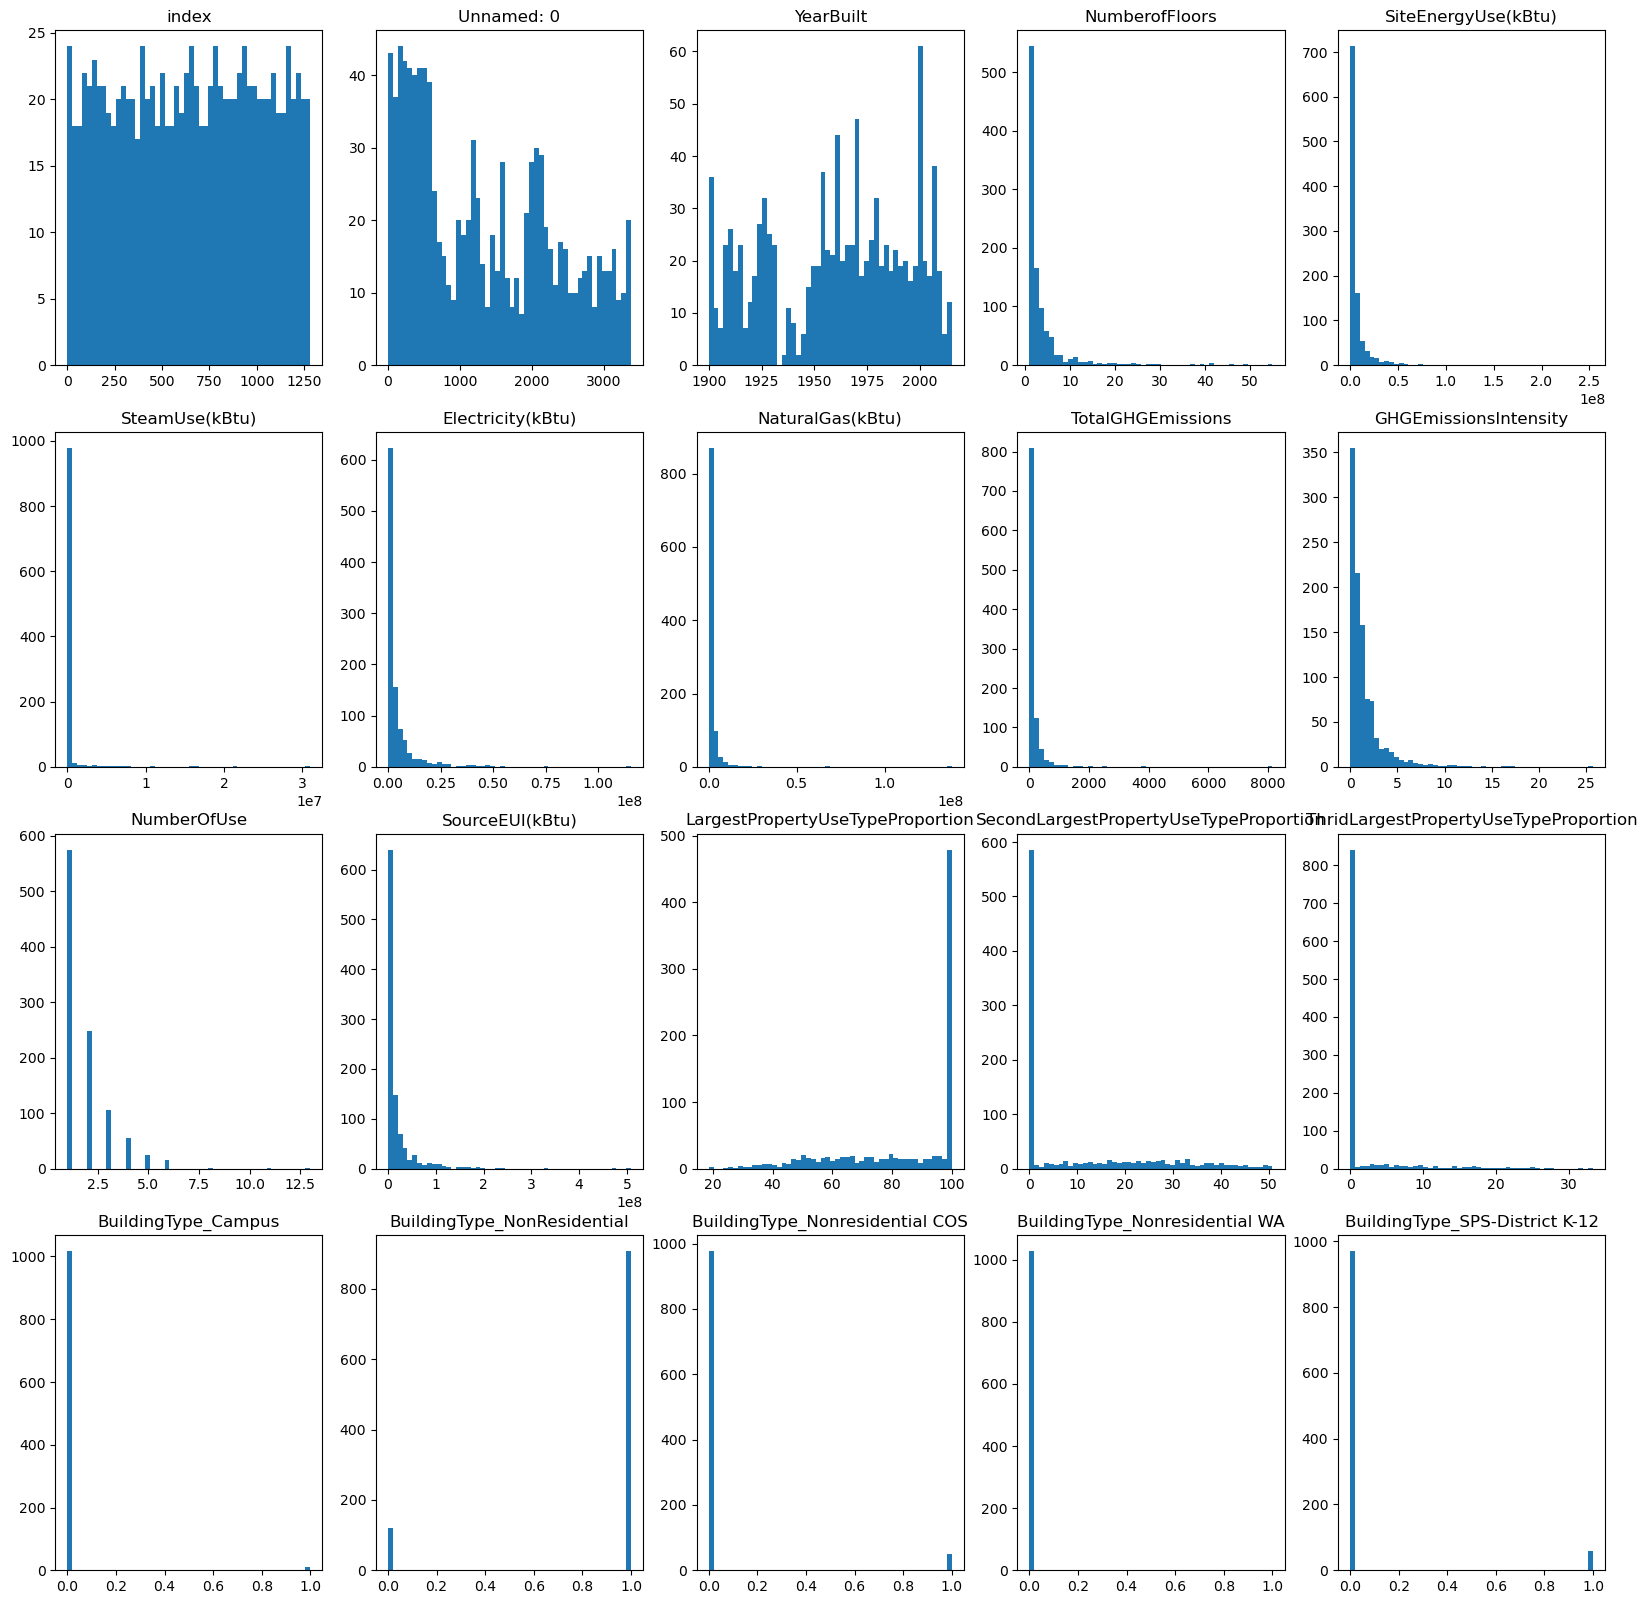

In [133]:
# Visualisation de la distribution des variables
fig, axs = plt.subplots(4, 5, figsize=(20, 20))
axs = axs.ravel()

for i, column in enumerate(train.columns):
    axs[i].hist(train[column], bins=50)
    axs[i].set_title(column)

plt.show()

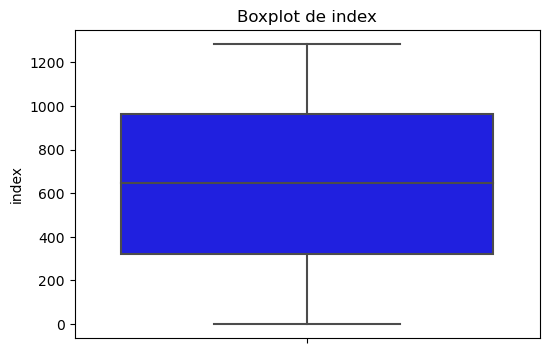

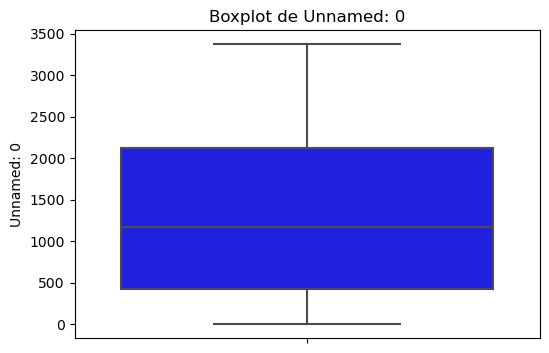

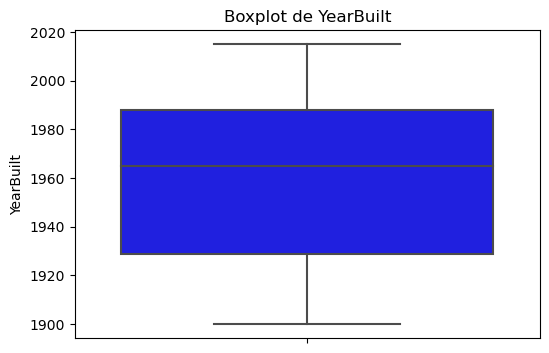

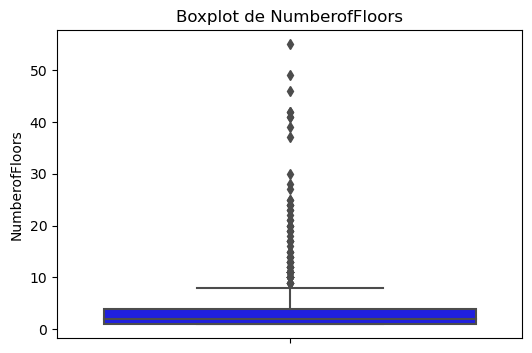

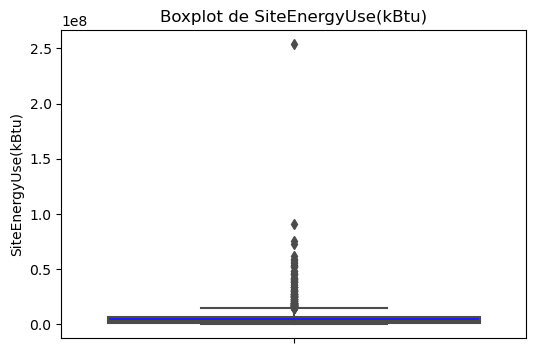

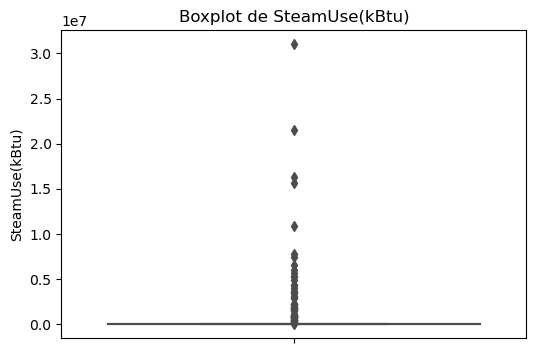

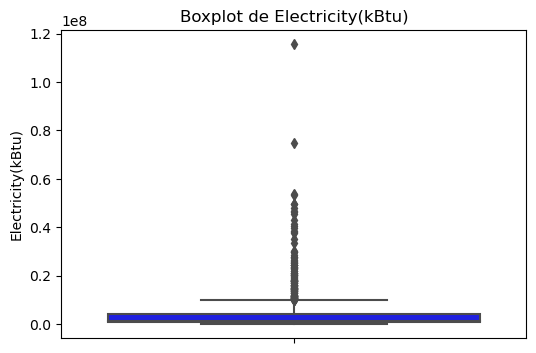

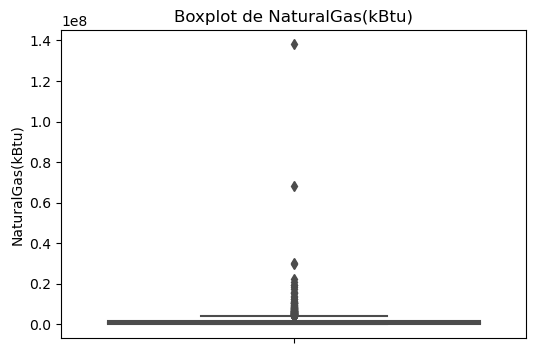

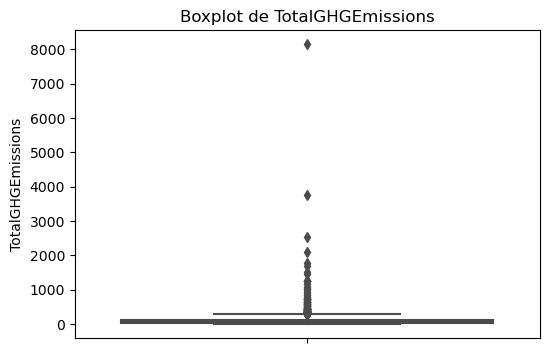

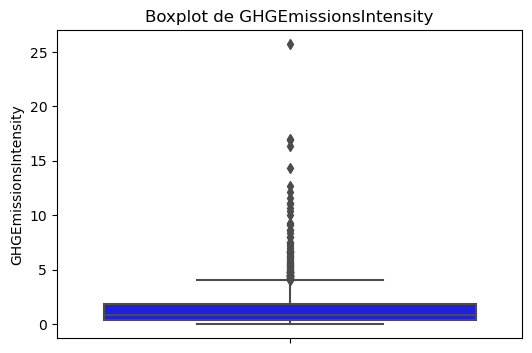

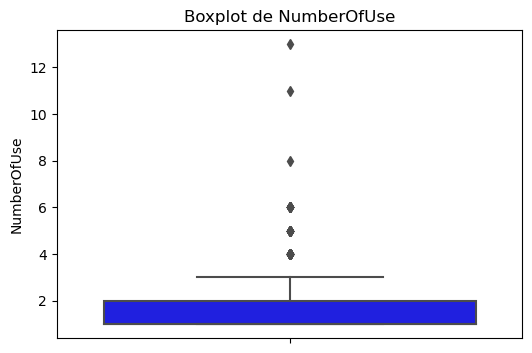

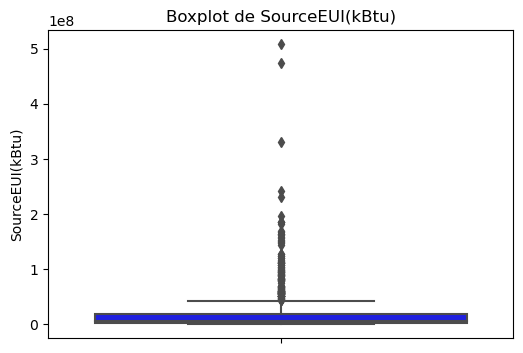

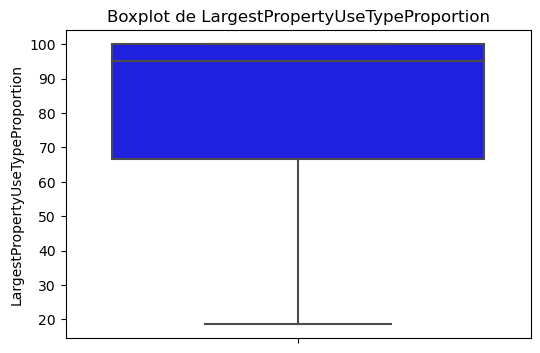

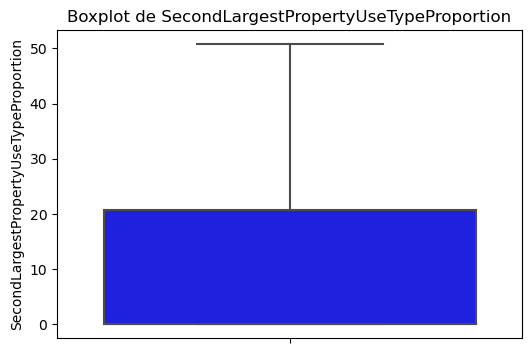

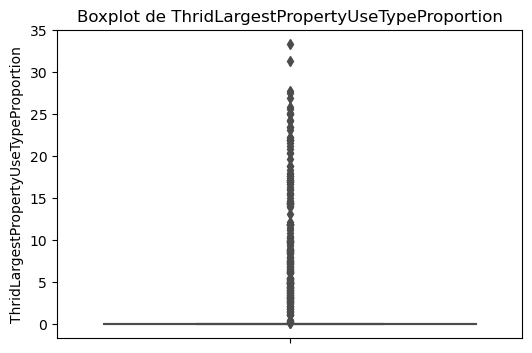

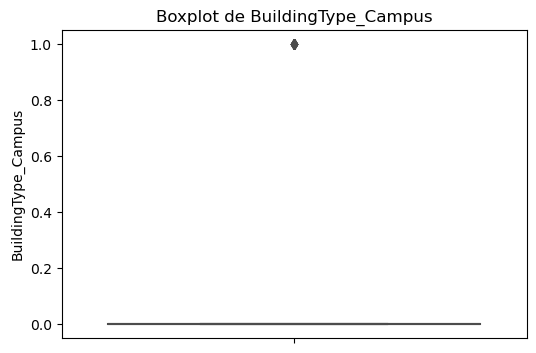

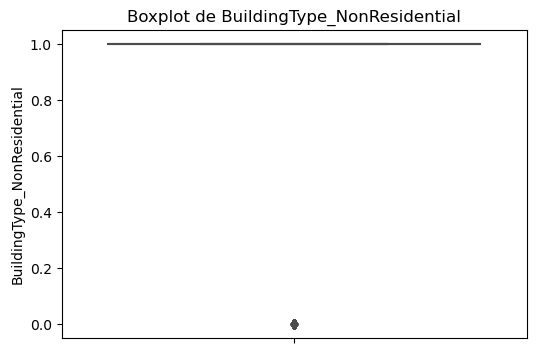

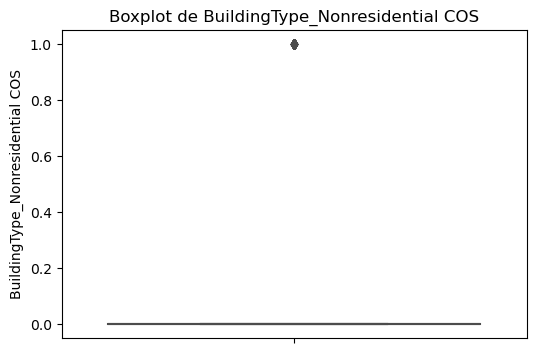

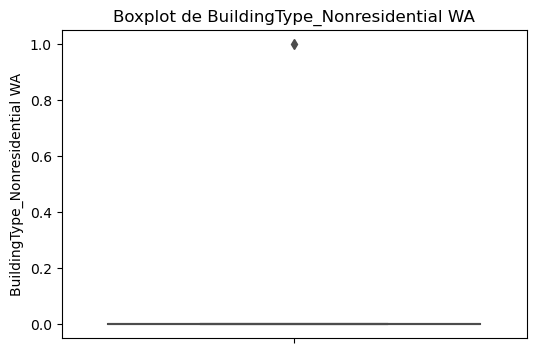

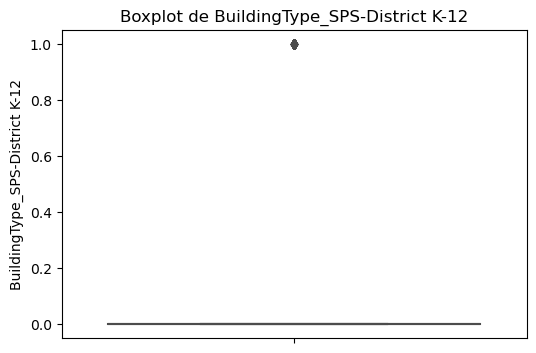

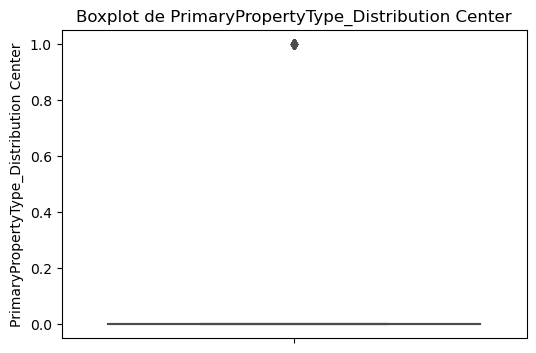

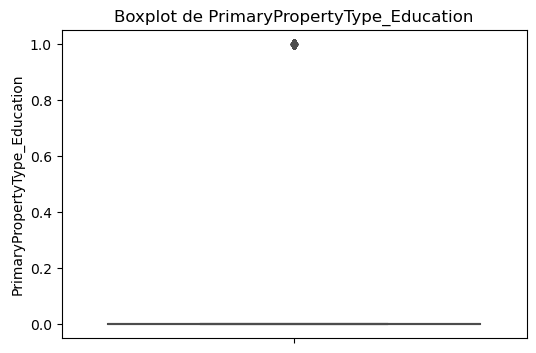

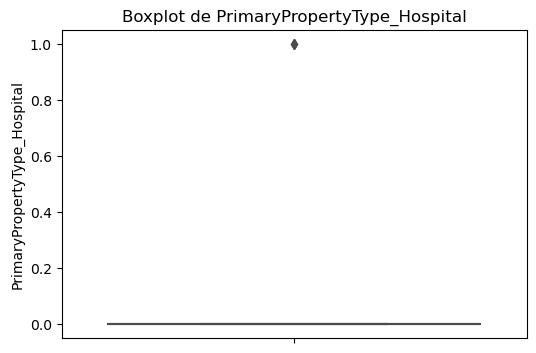

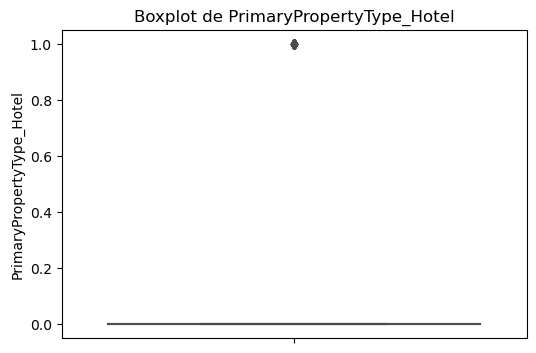

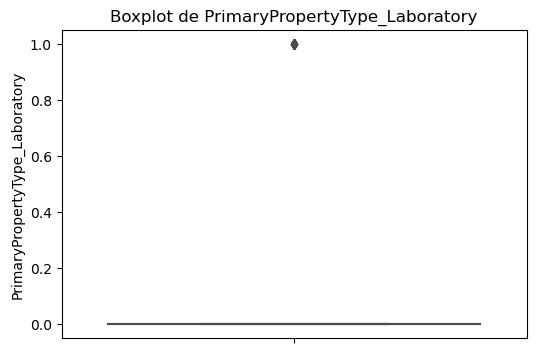

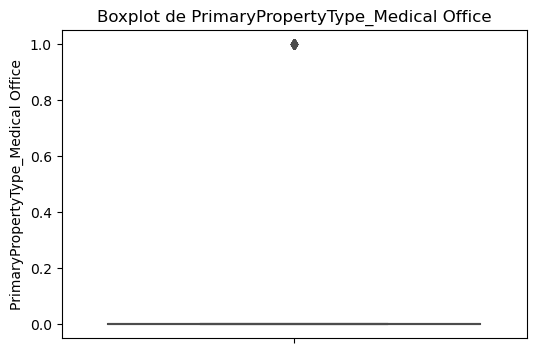

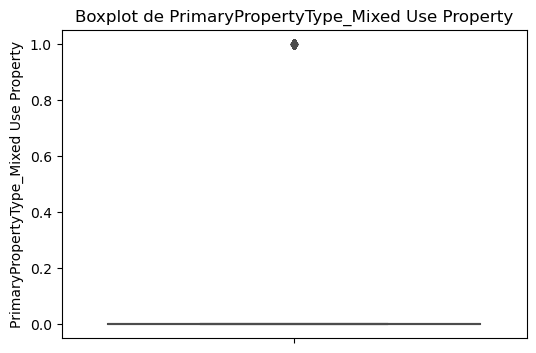

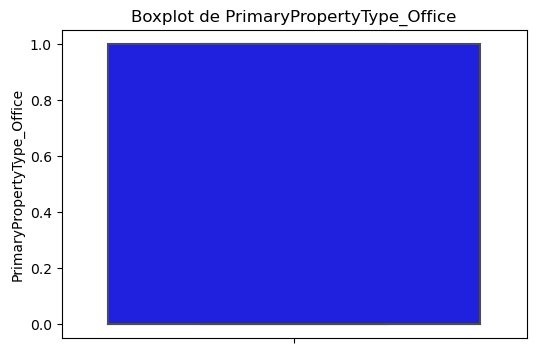

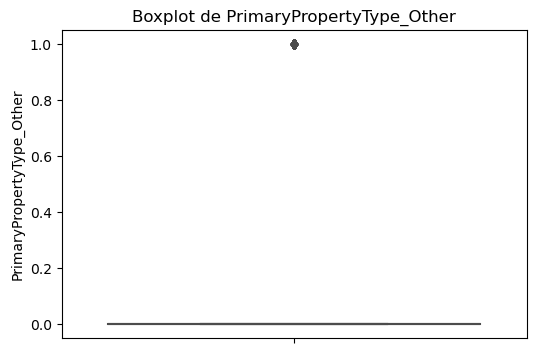

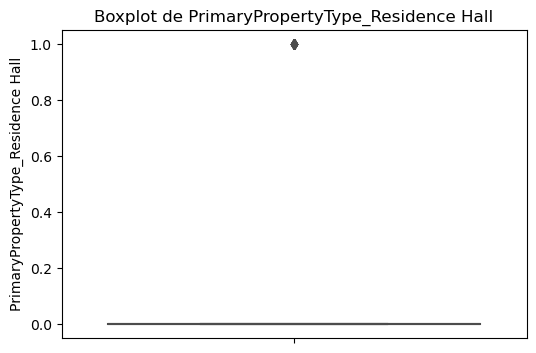

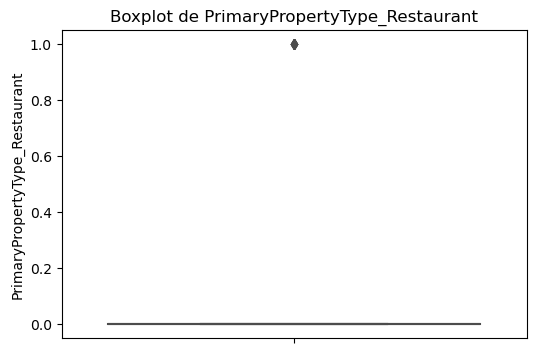

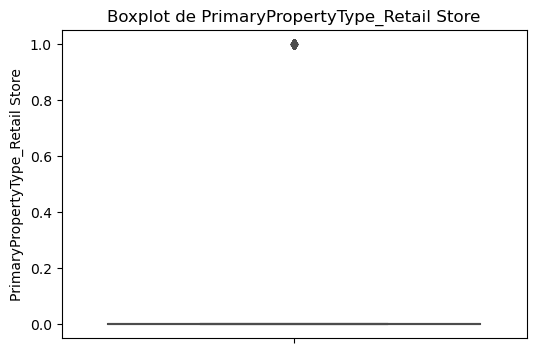

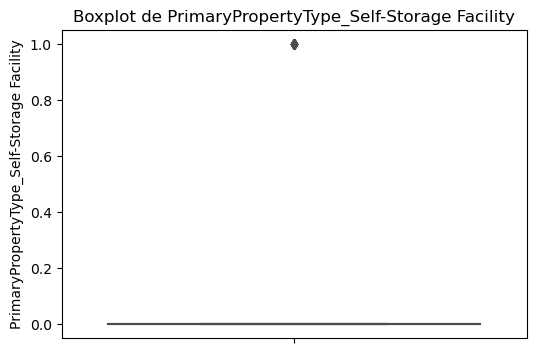

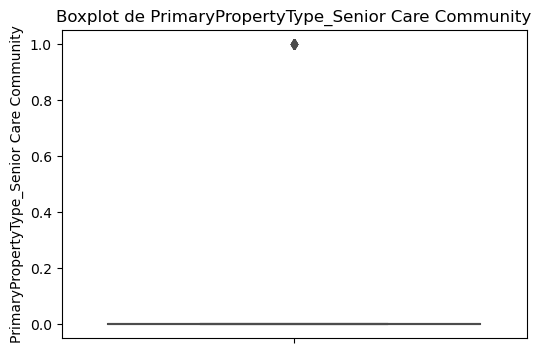

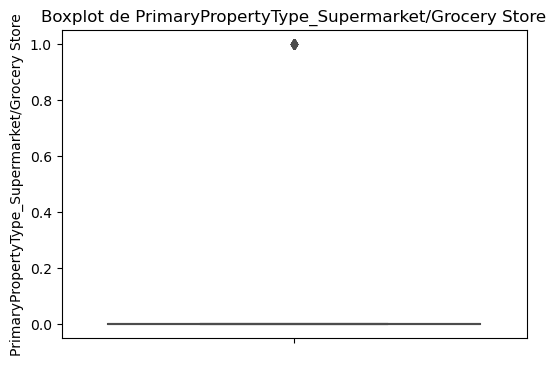

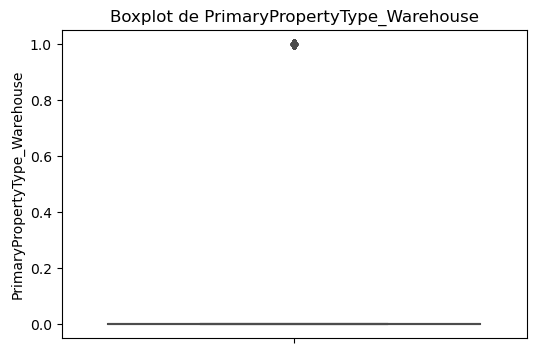

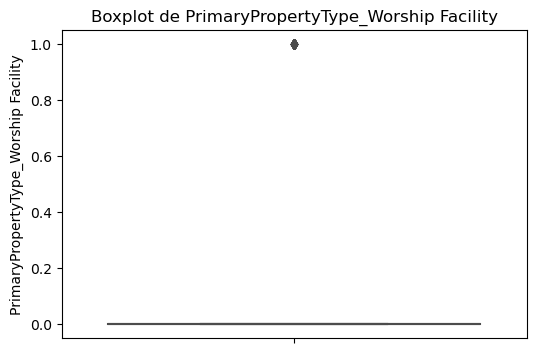

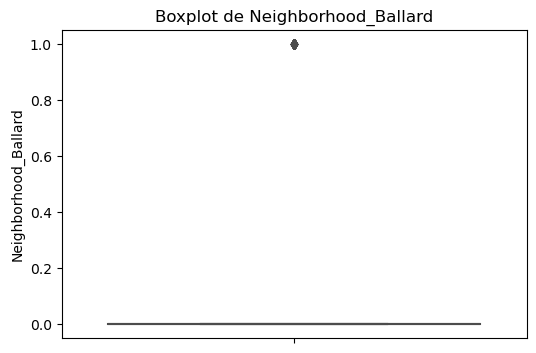

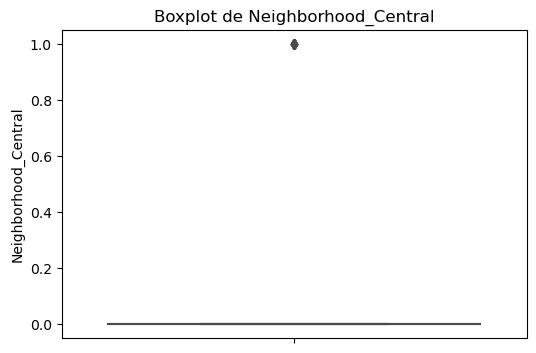

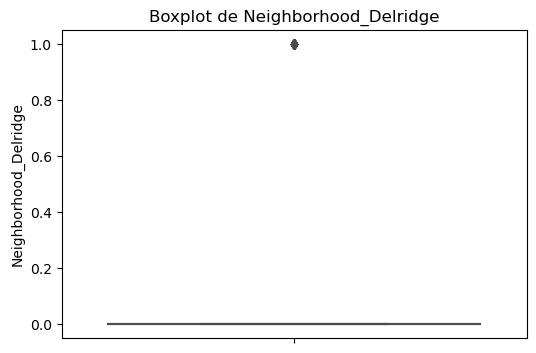

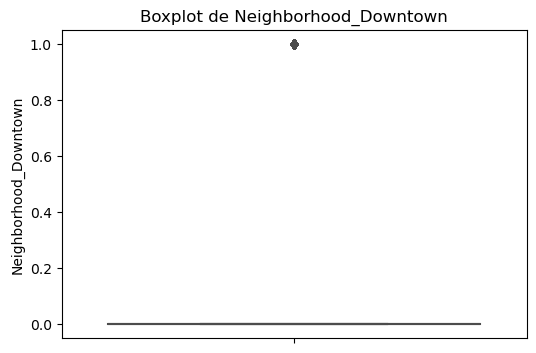

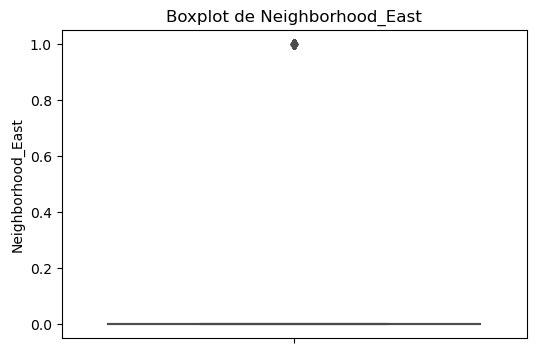

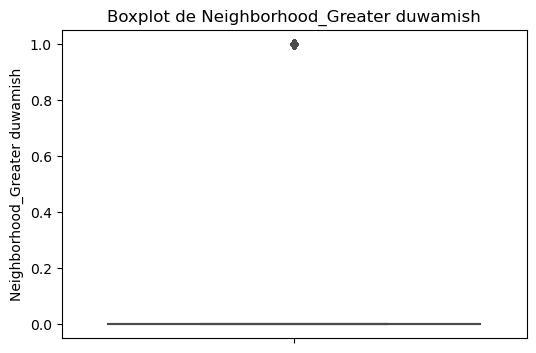

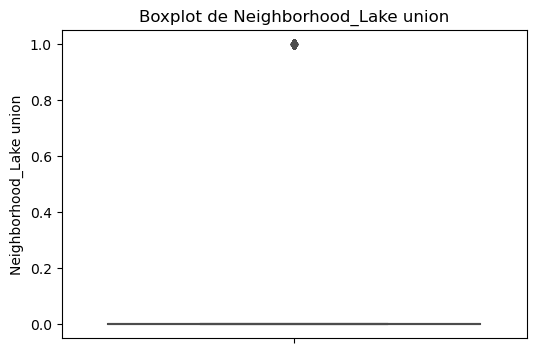

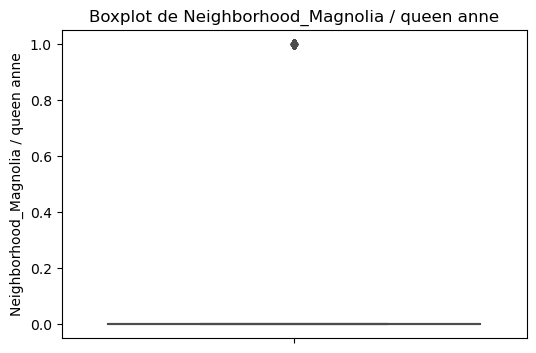

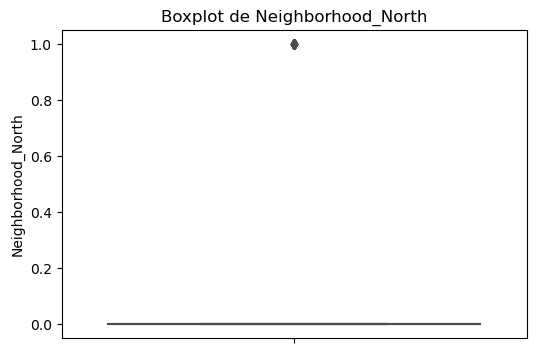

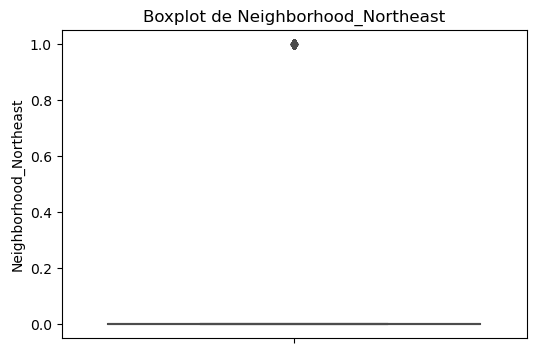

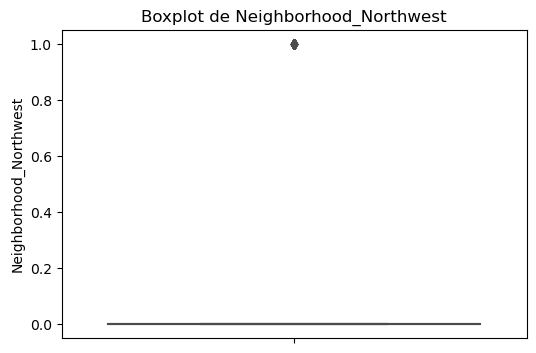

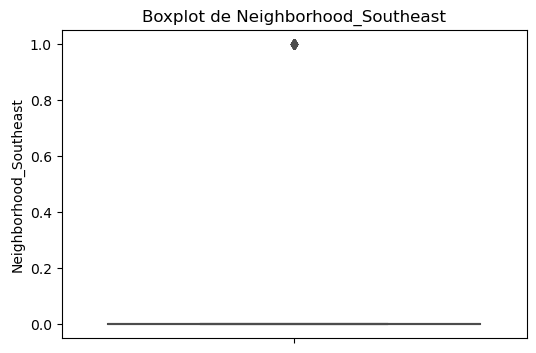

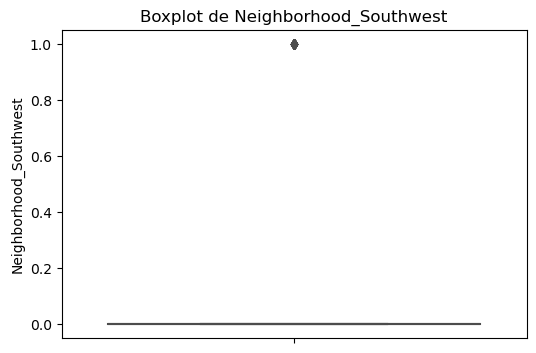

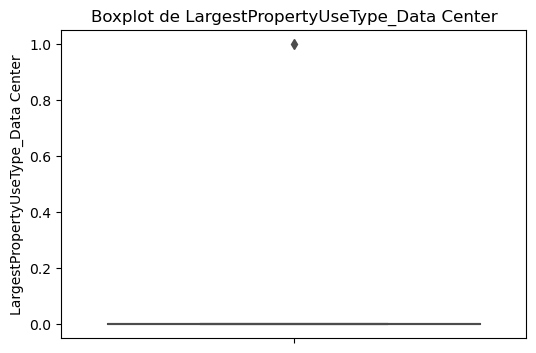

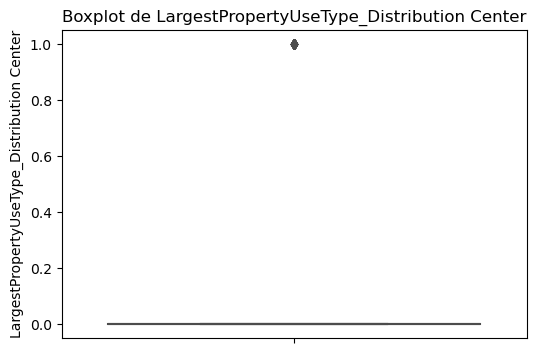

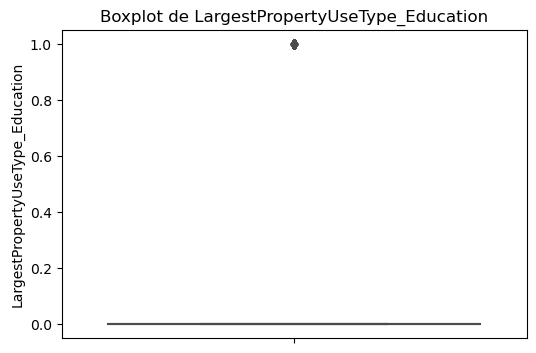

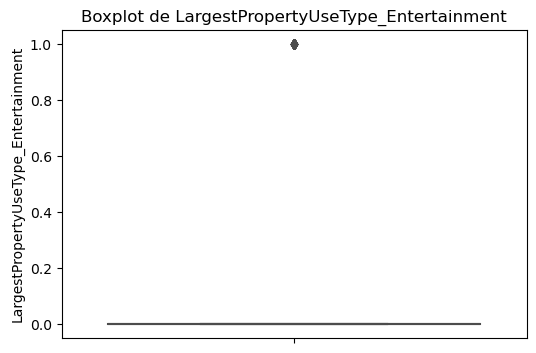

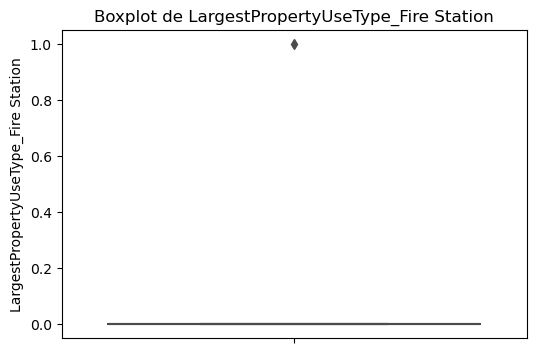

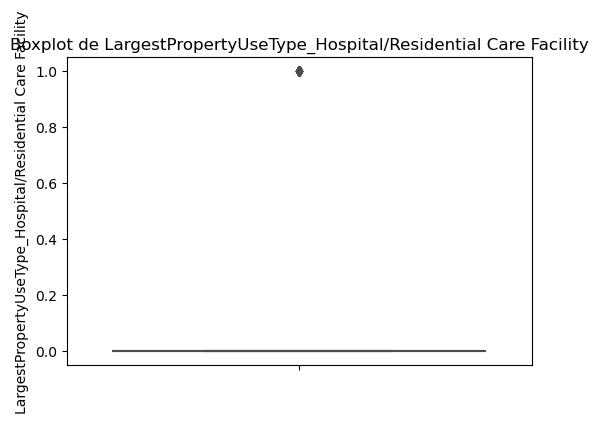

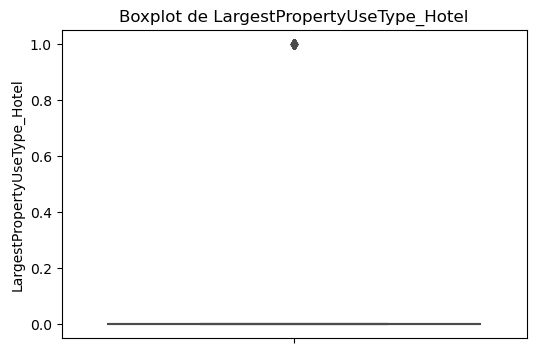

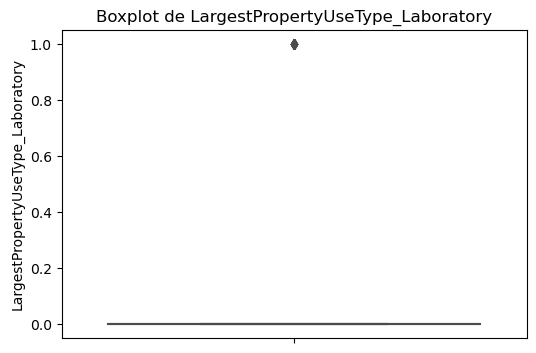

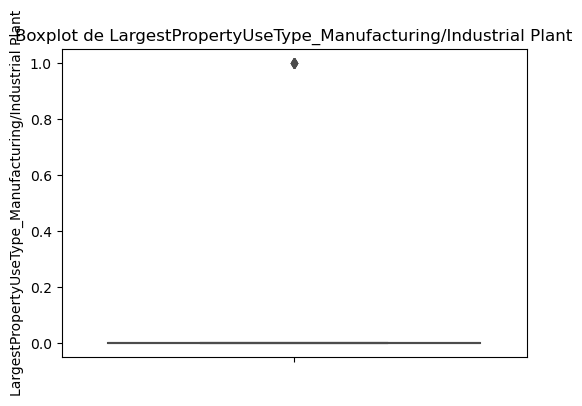

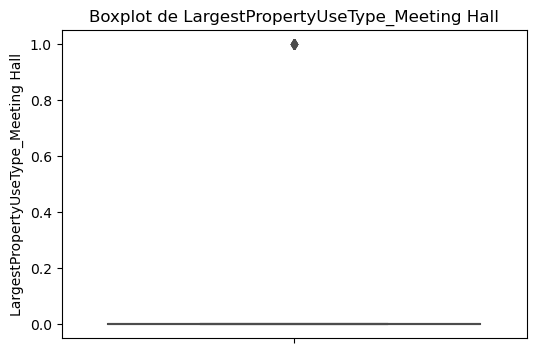

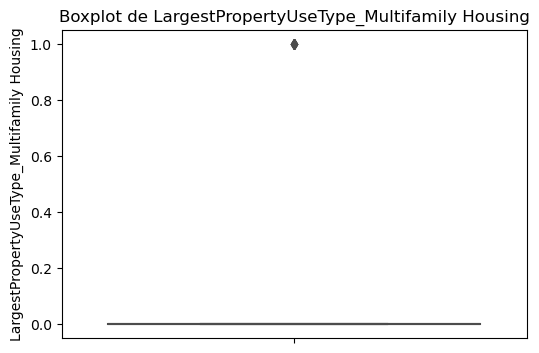

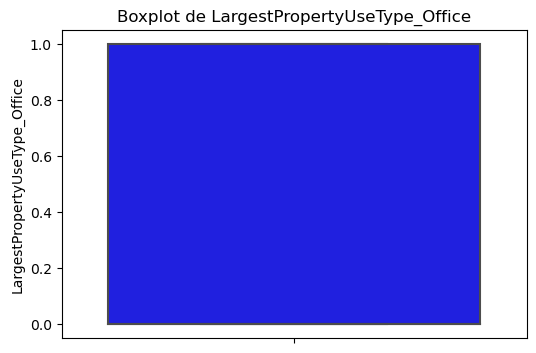

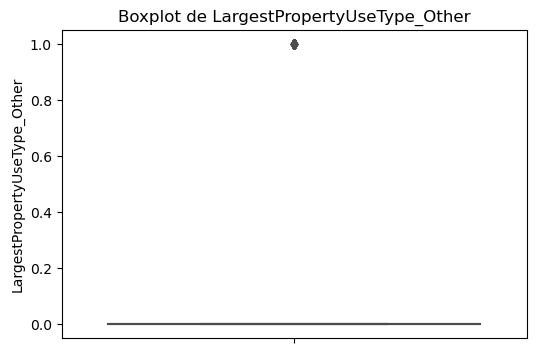

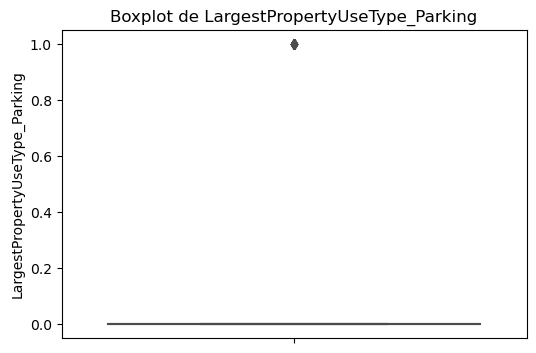

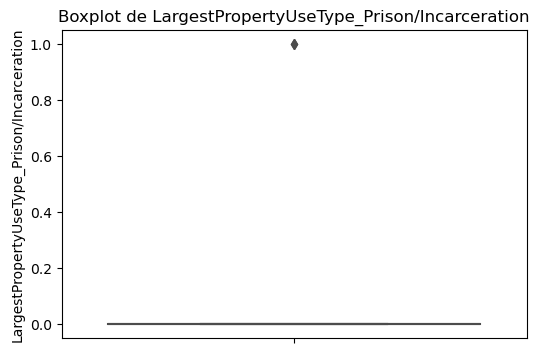

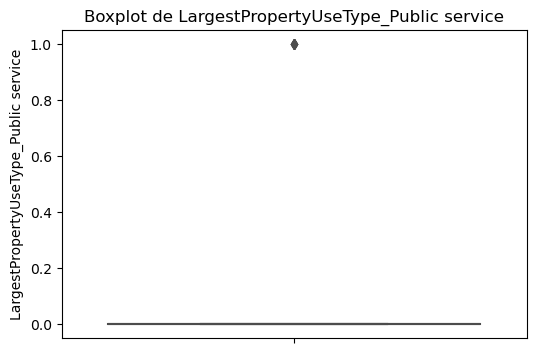

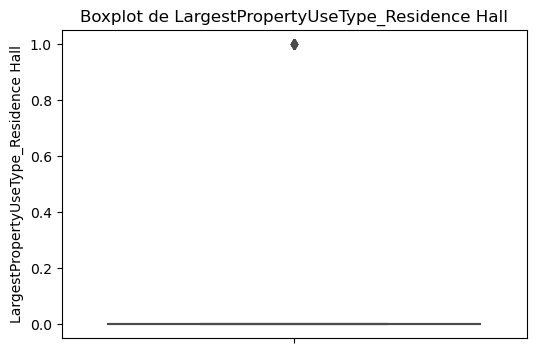

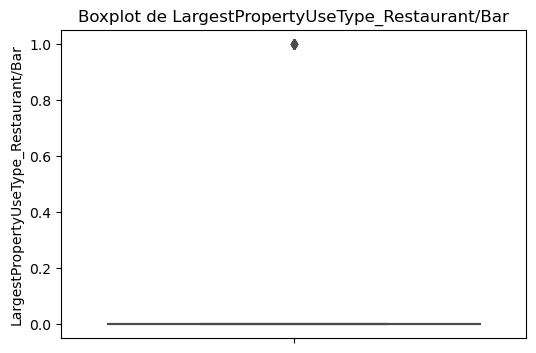

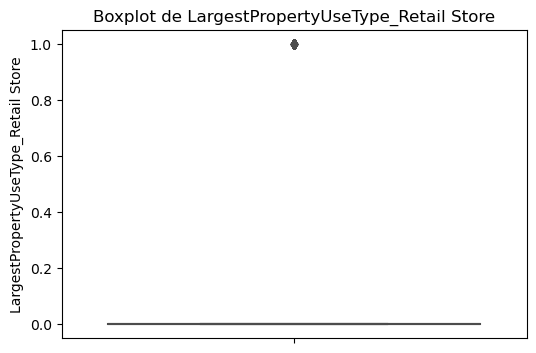

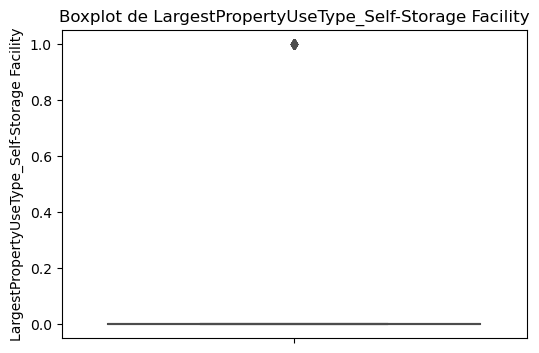

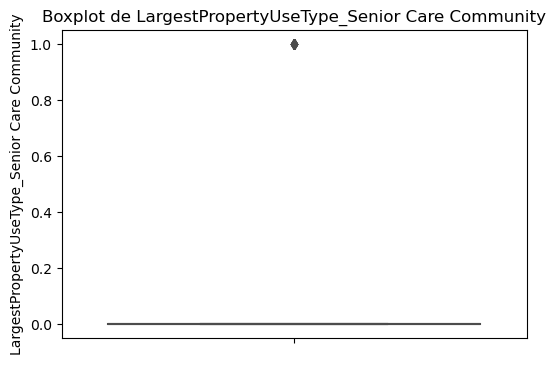

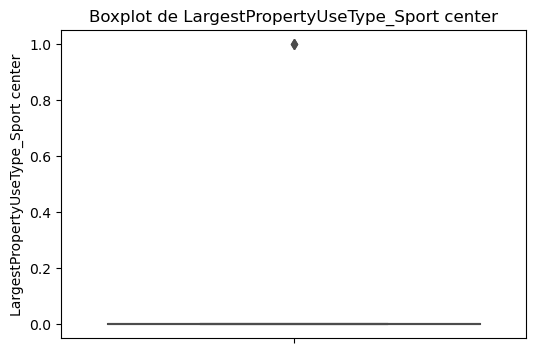

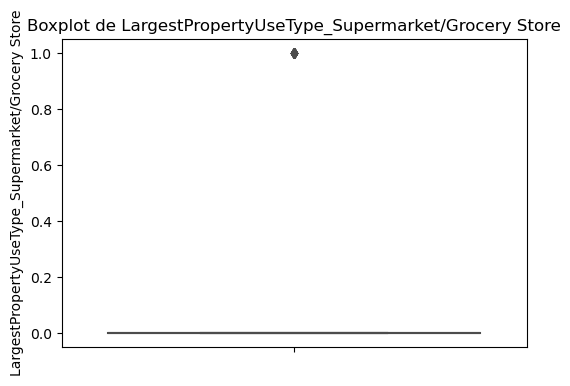

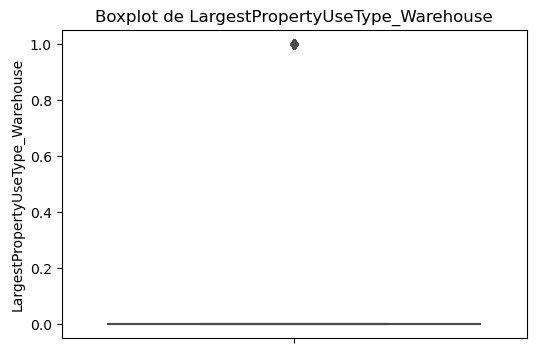

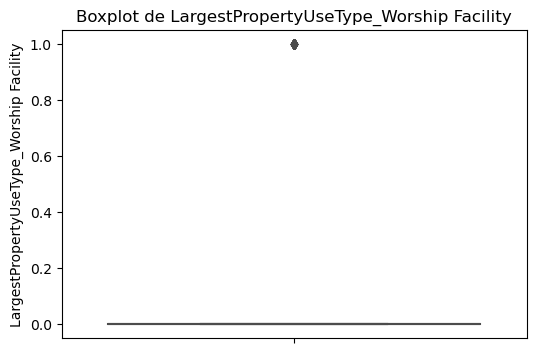

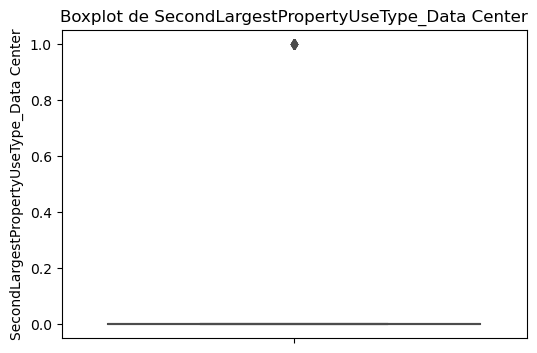

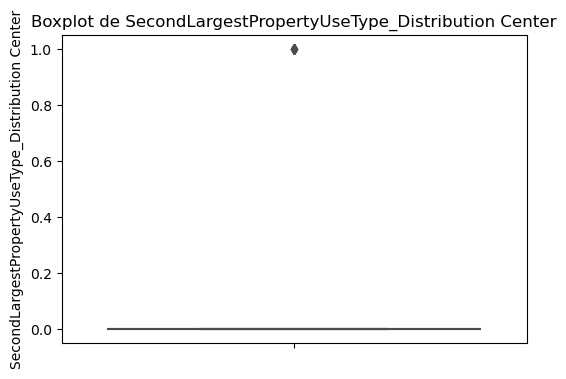

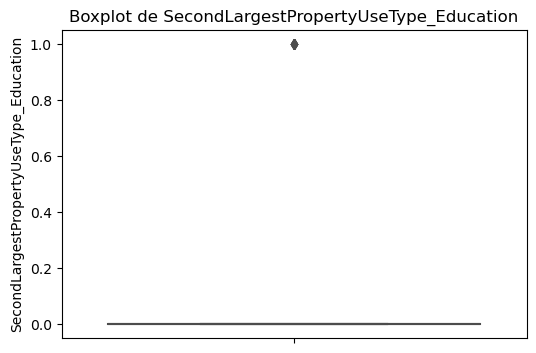

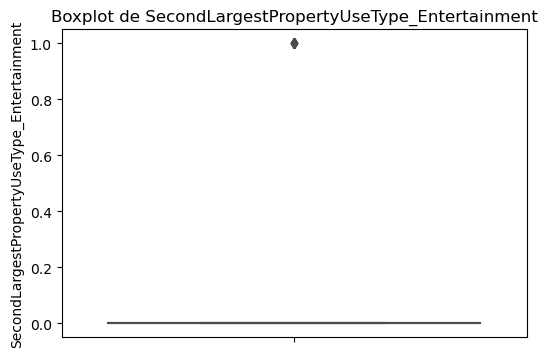

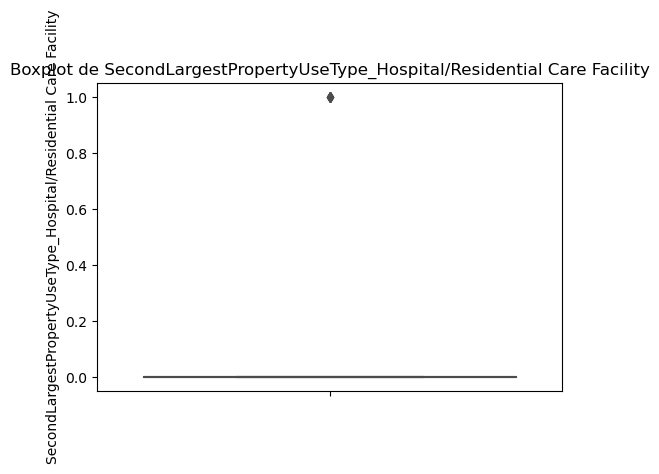

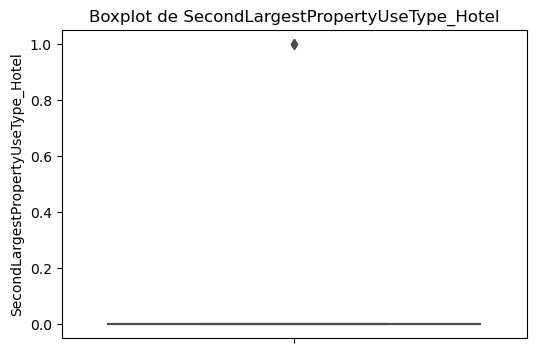

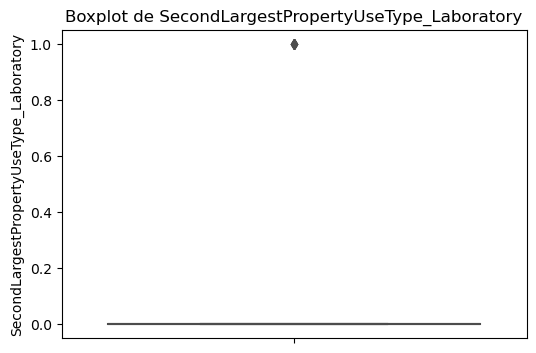

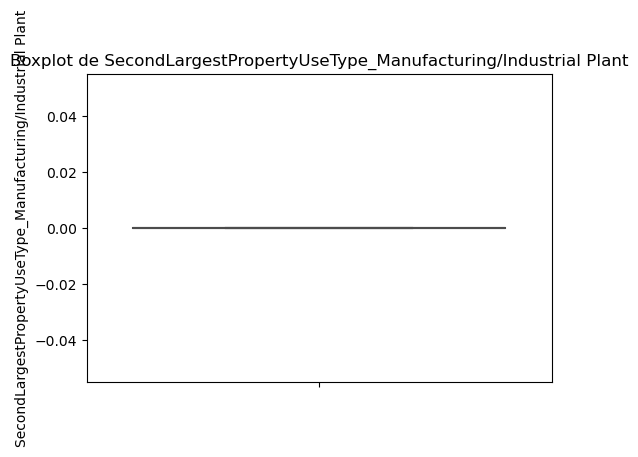

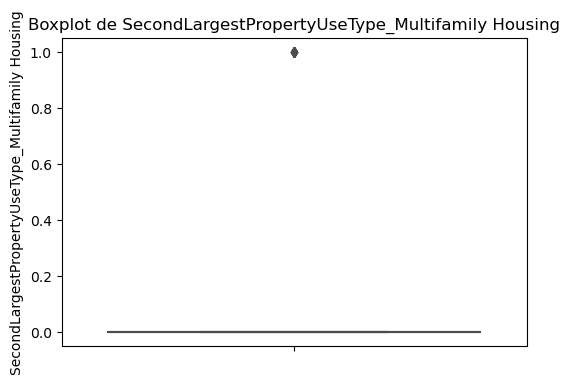

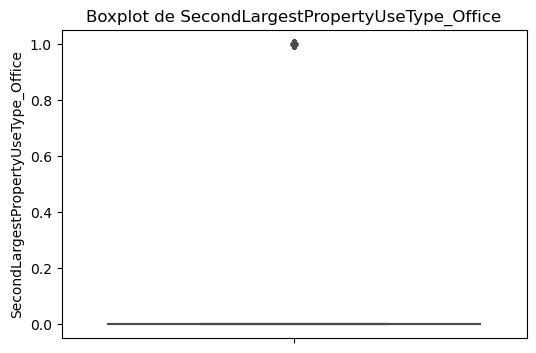

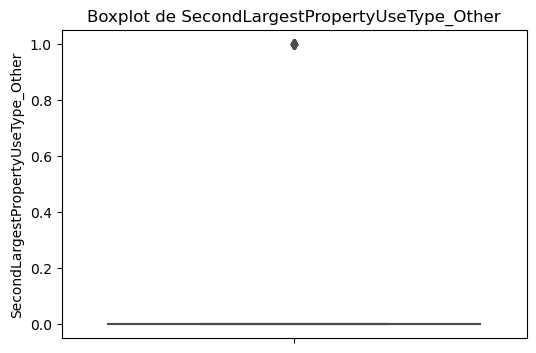

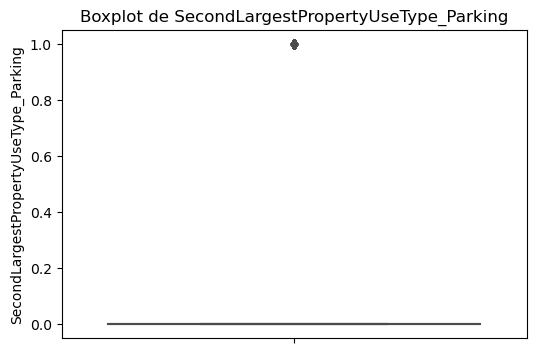

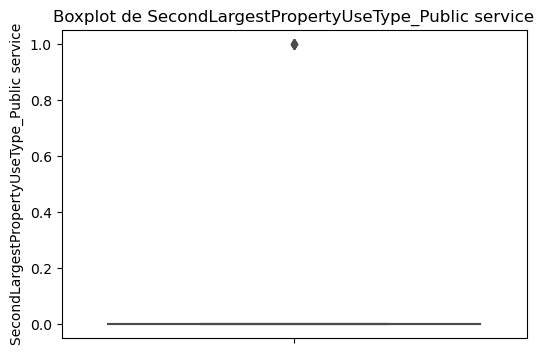

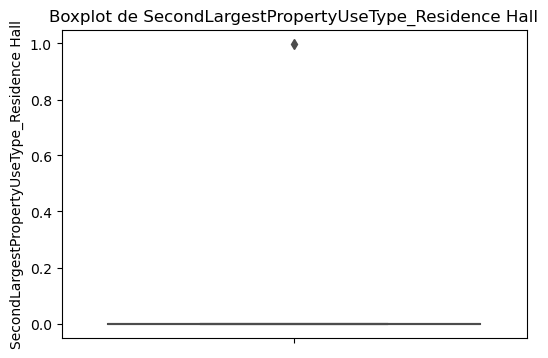

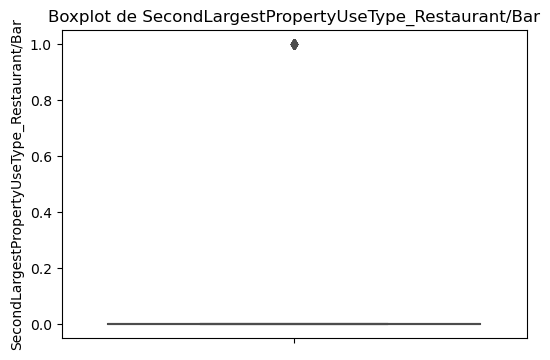

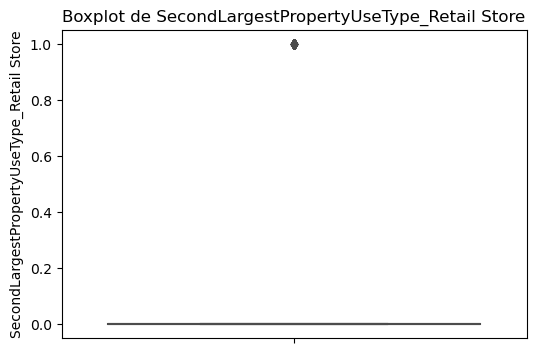

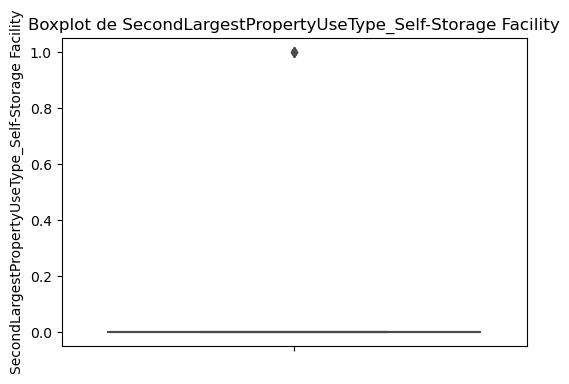

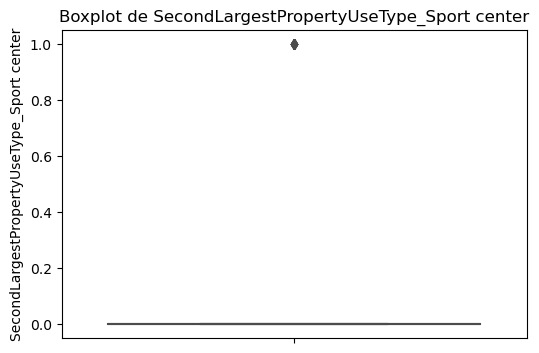

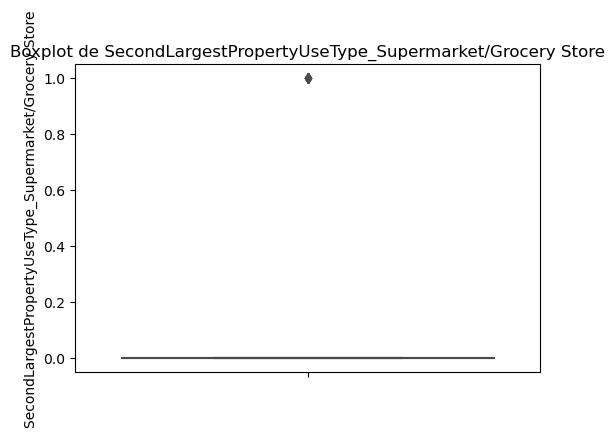

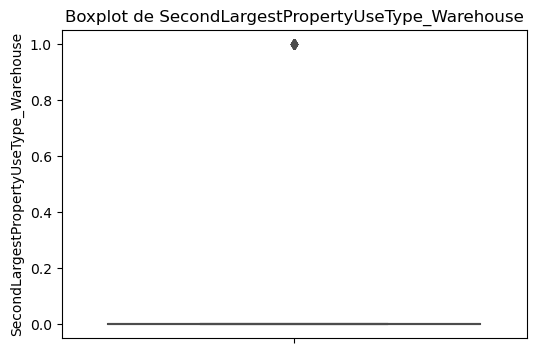

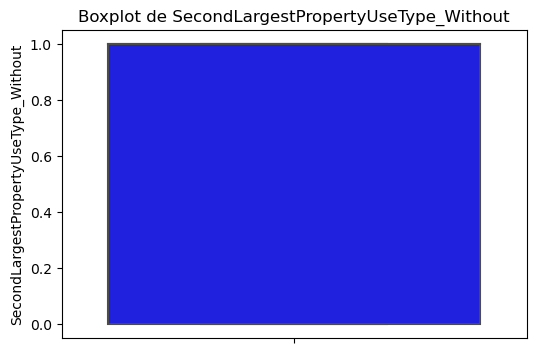

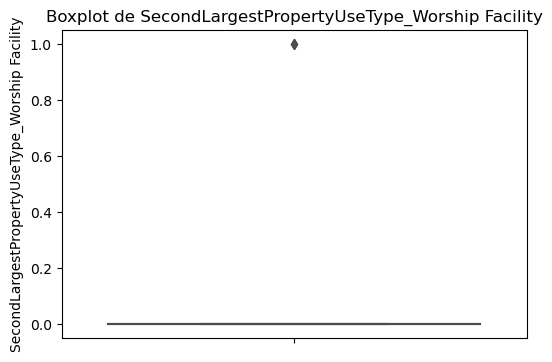

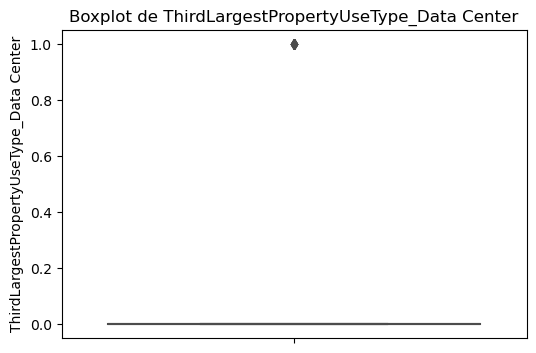

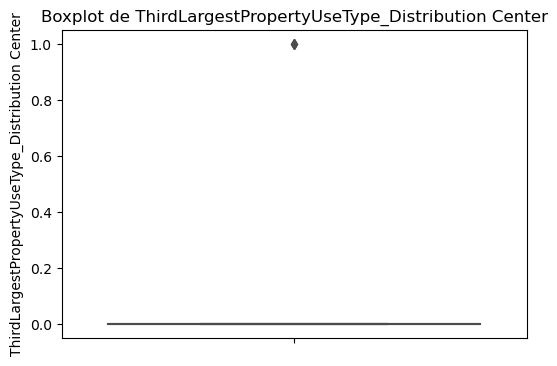

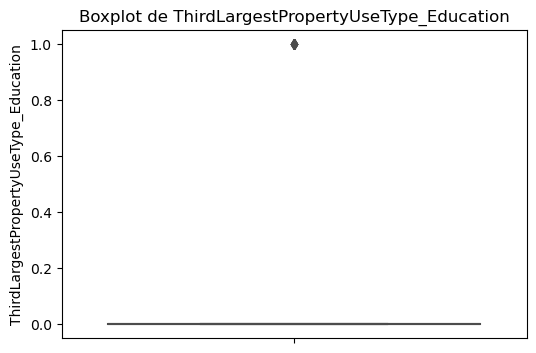

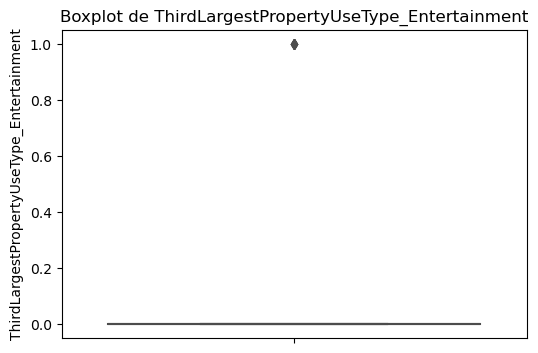

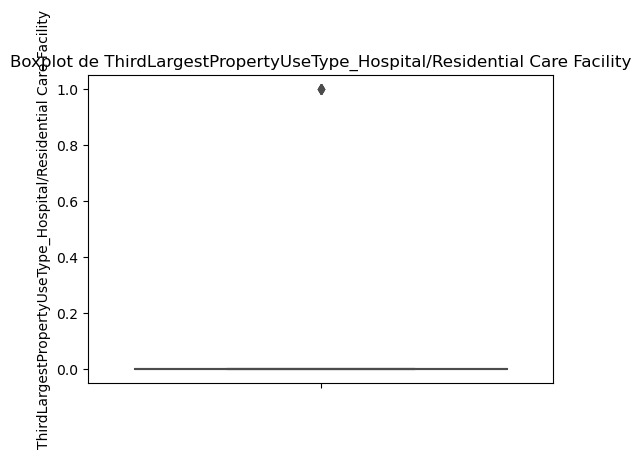

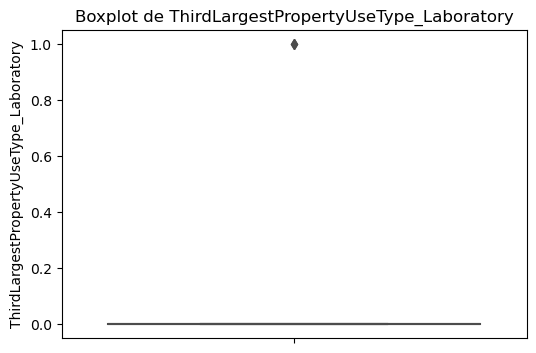

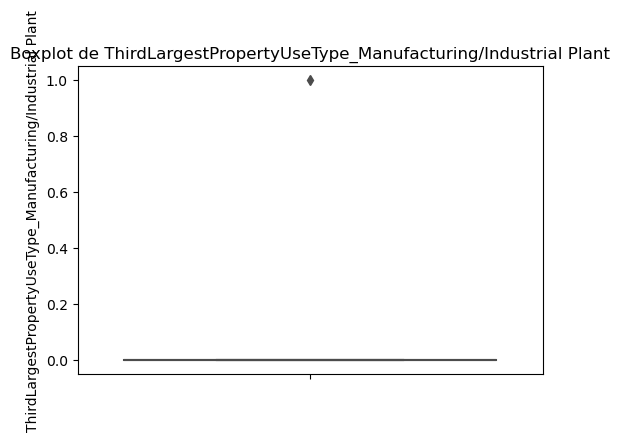

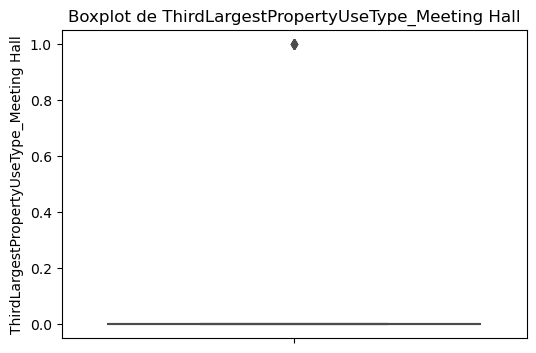

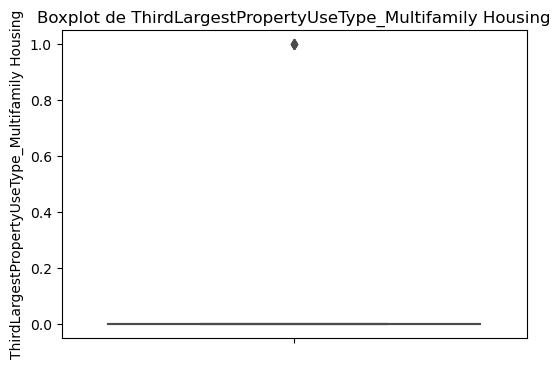

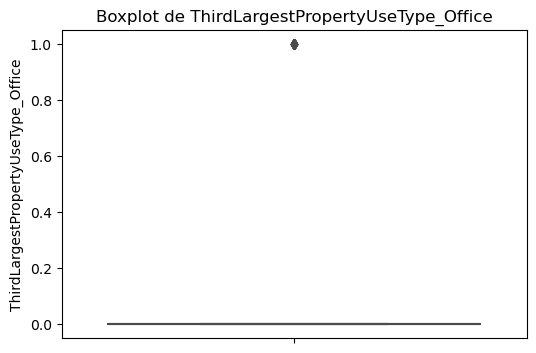

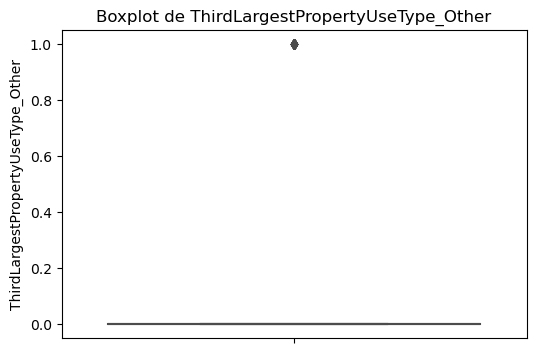

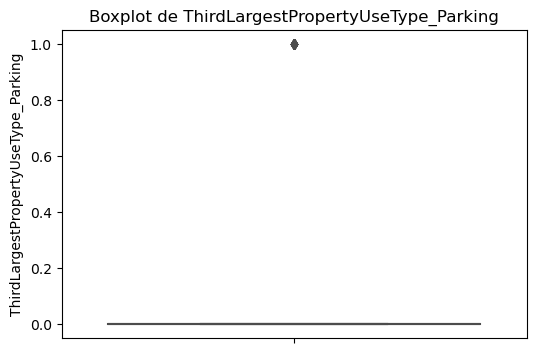

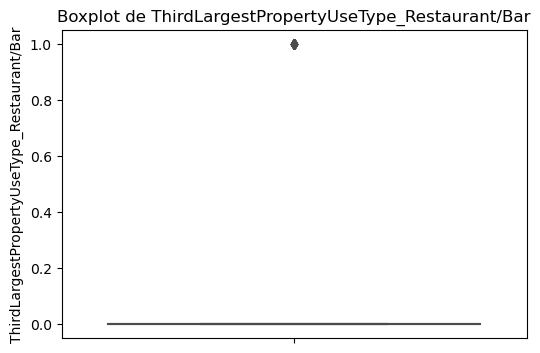

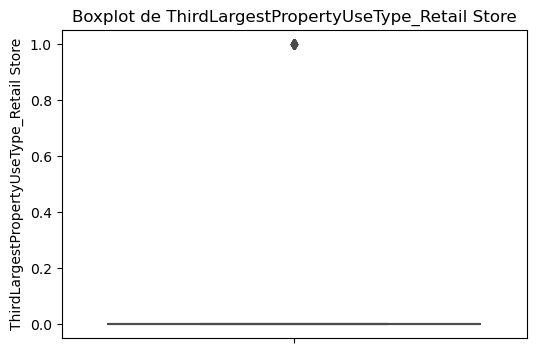

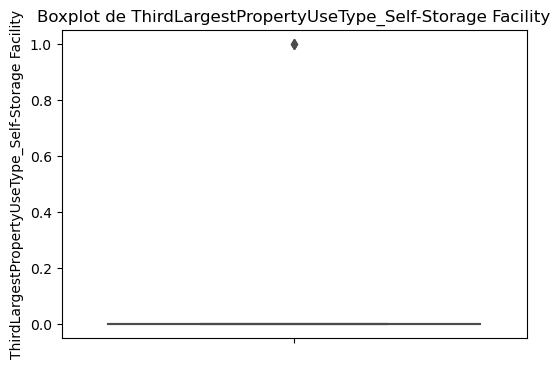

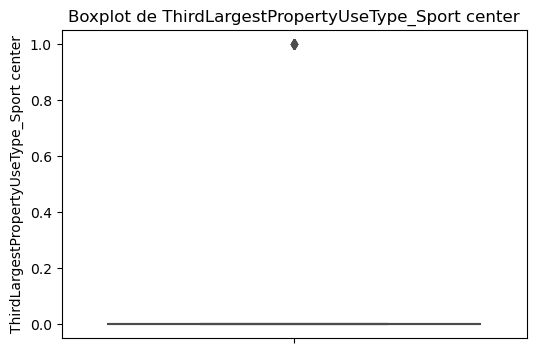

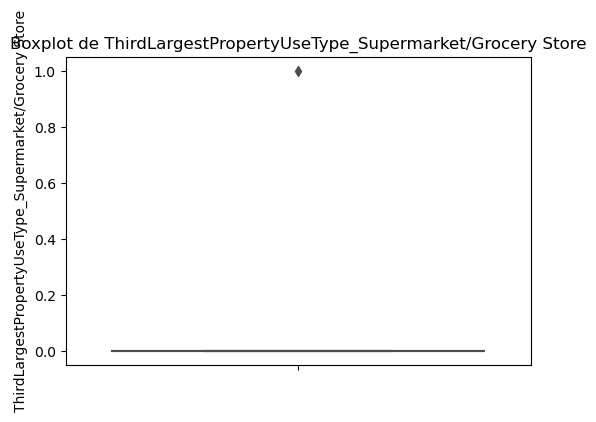

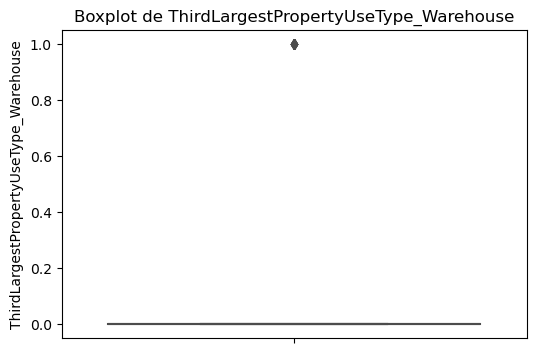

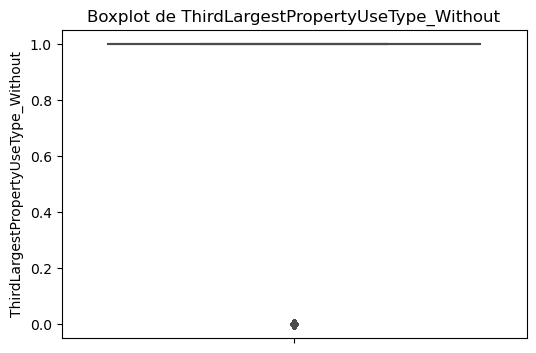

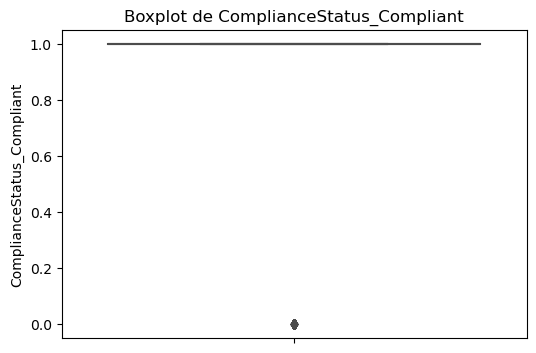

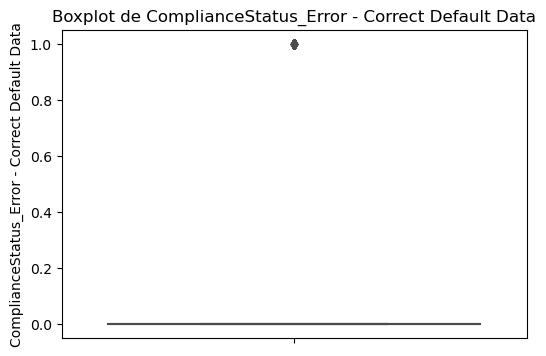

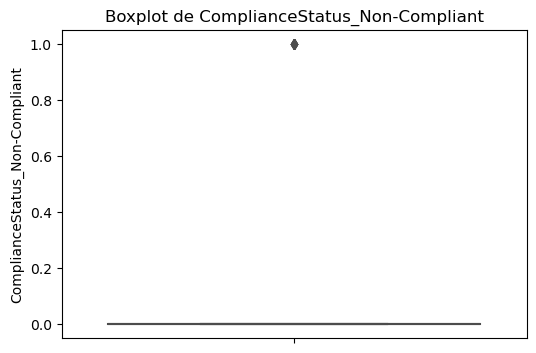

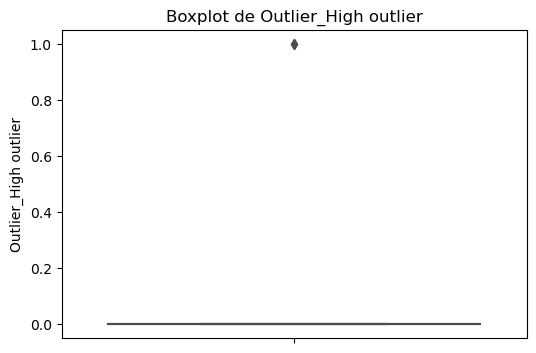

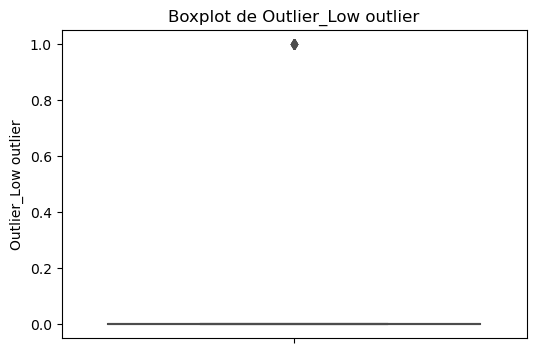

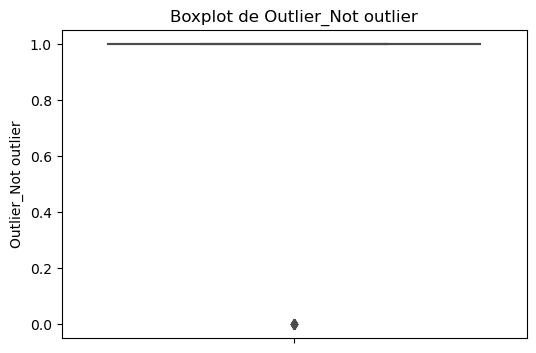

In [136]:

# affichage des boxplot pour chaque variables numériques de la partie destinée à l'entrainement

num_cols = list(train.select_dtypes(include=["float64", "int64"]).columns)

for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=train, y=col, color="blue")
    plt.title(f"Boxplot de {col}")
    plt.ylabel(col)
    plt.show()

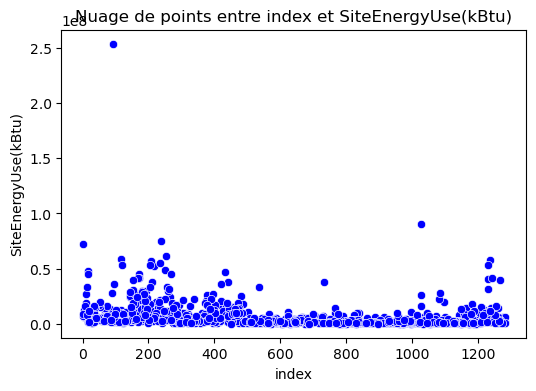

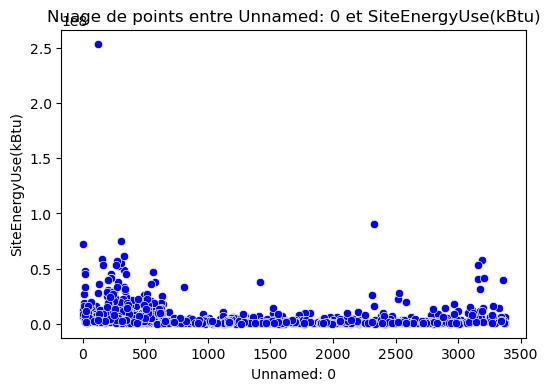

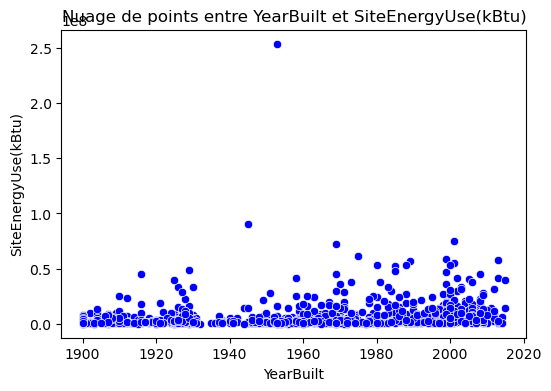

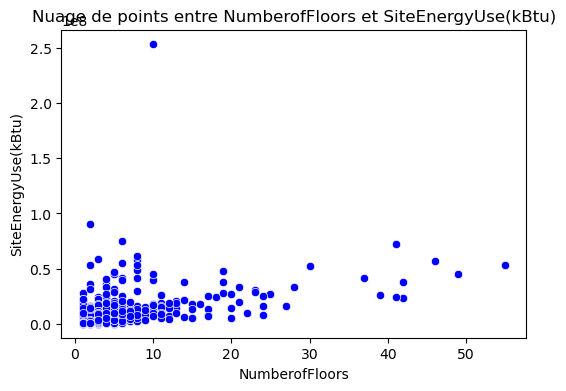

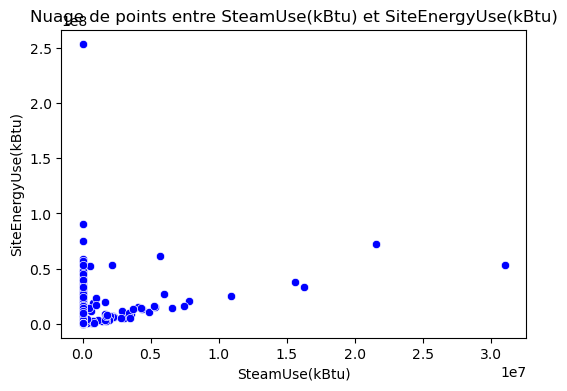

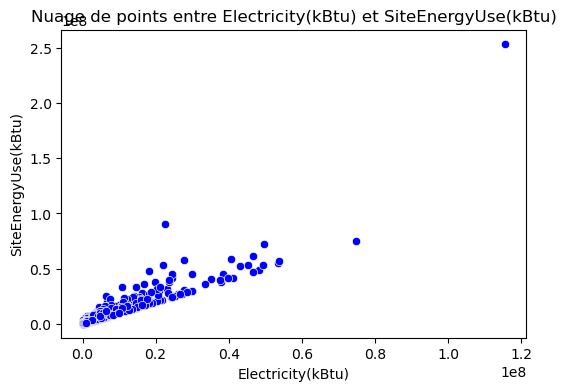

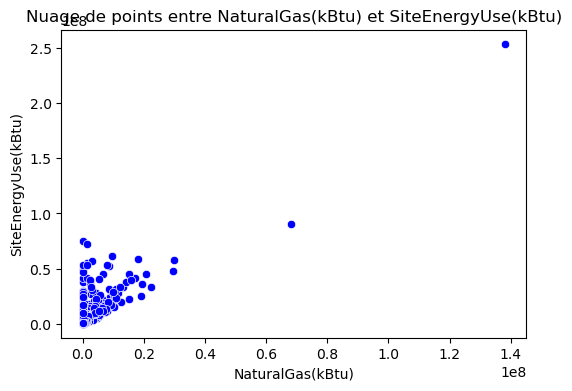

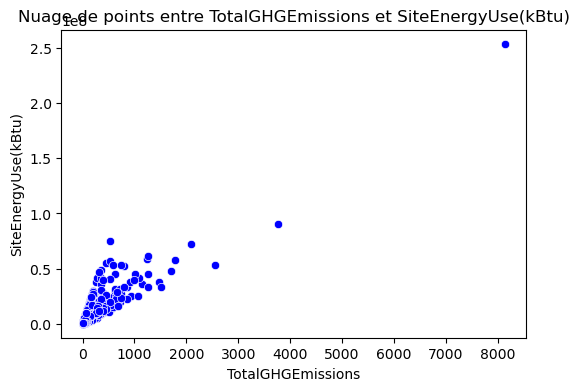

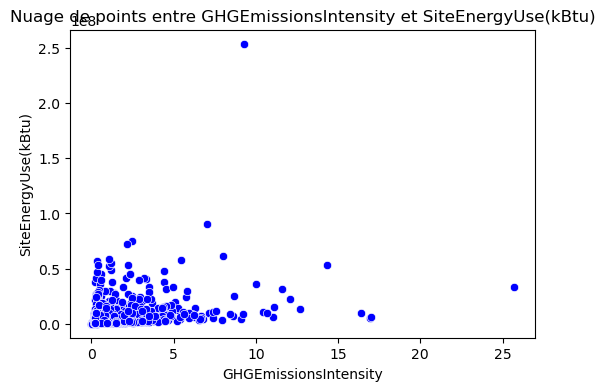

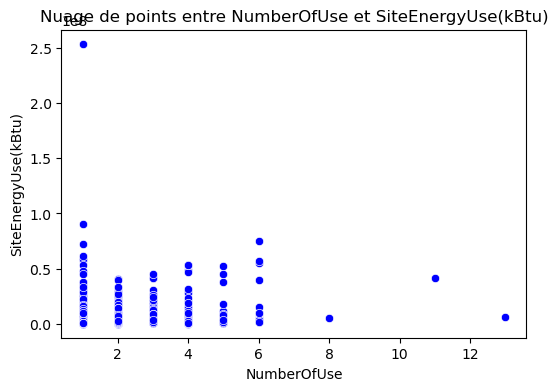

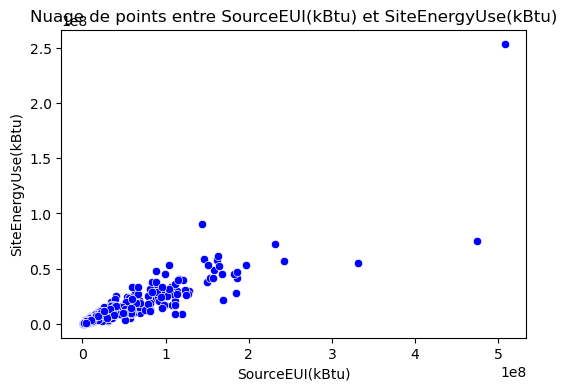

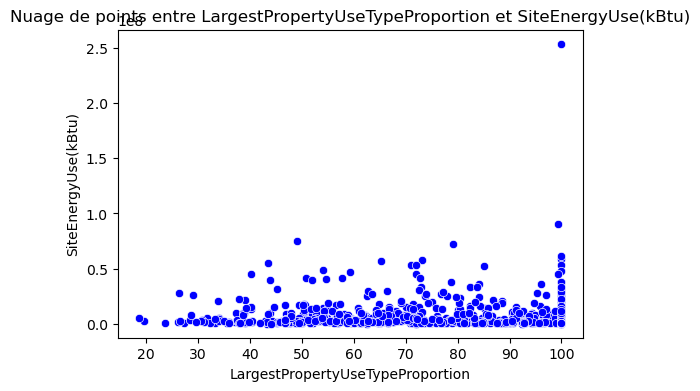

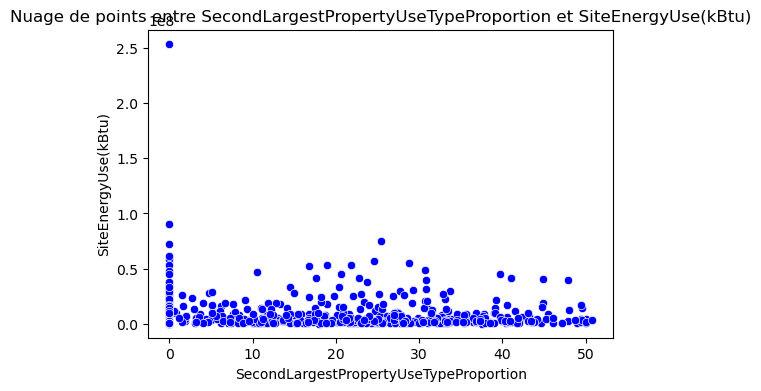

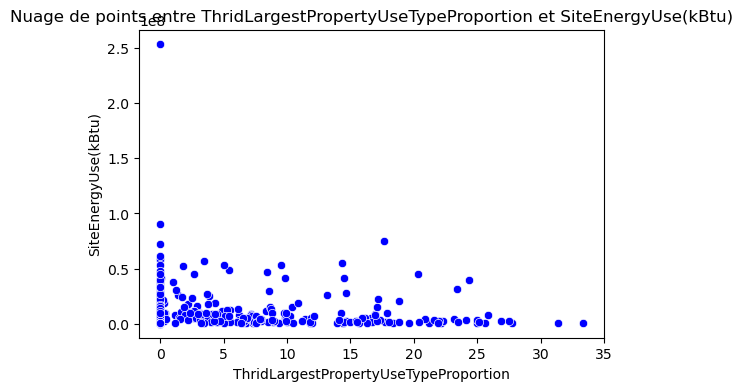

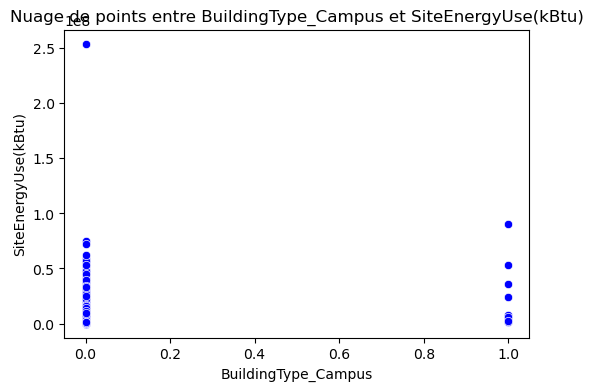

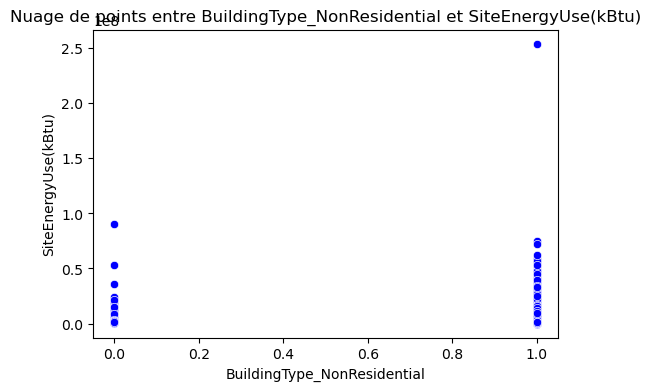

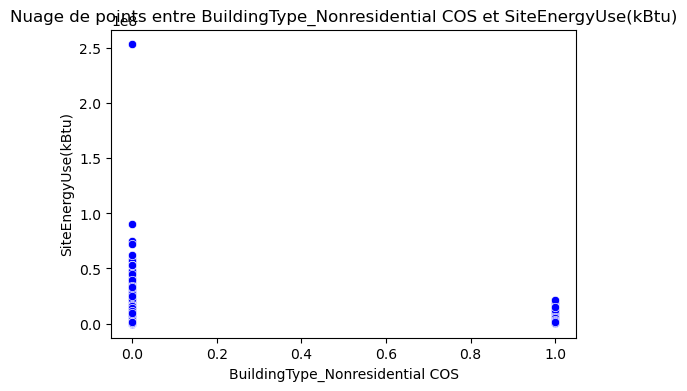

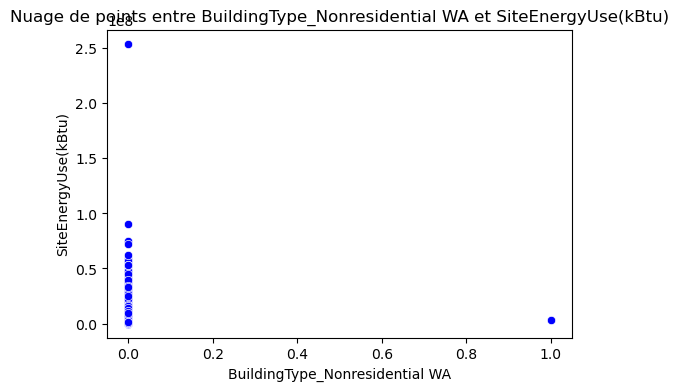

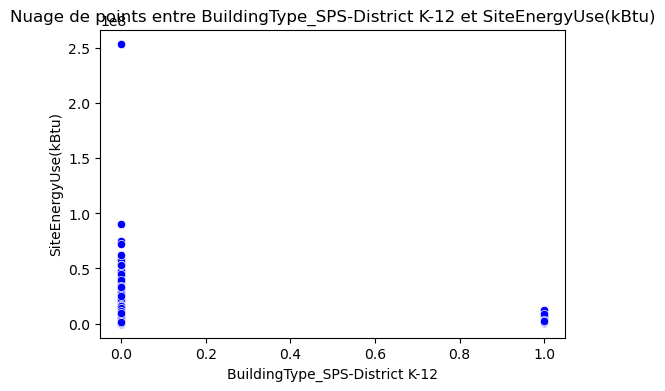

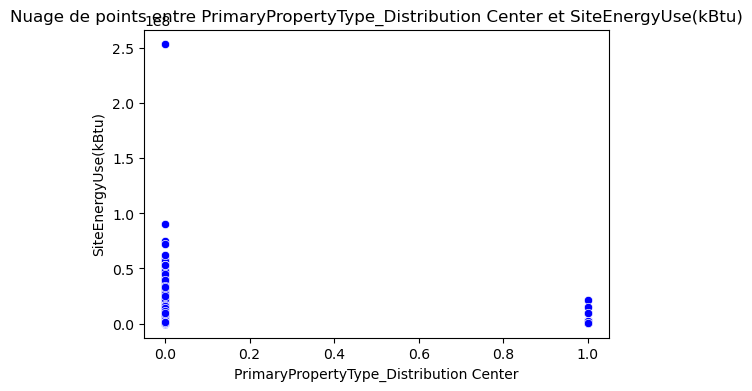

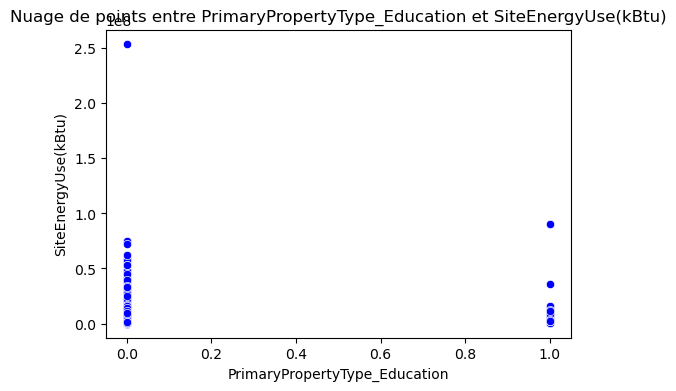

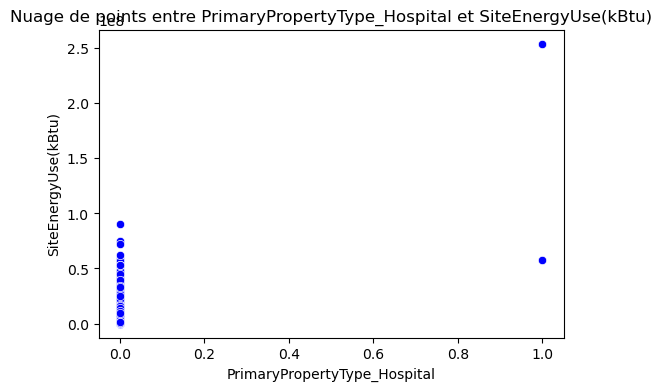

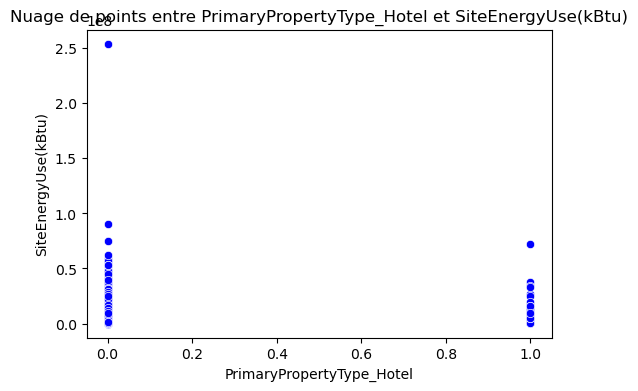

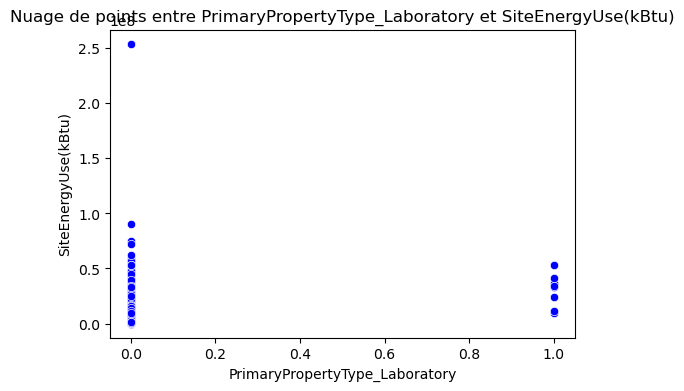

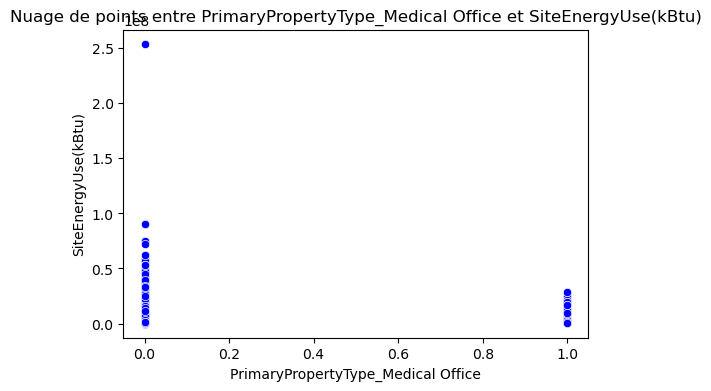

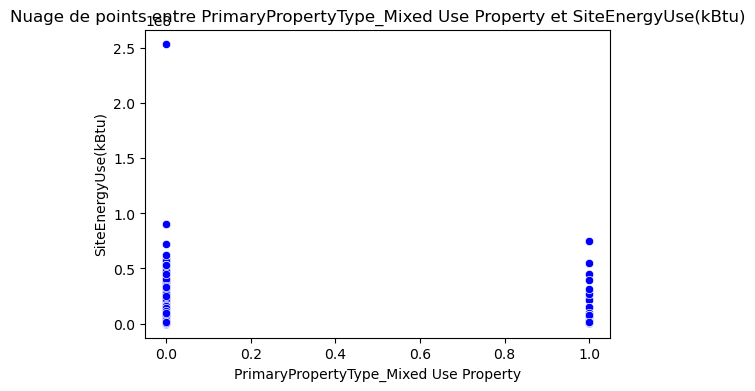

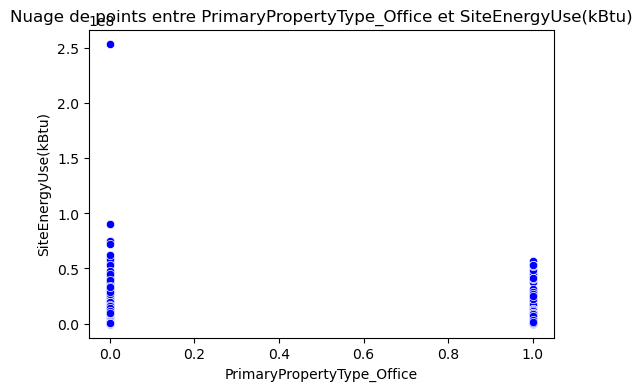

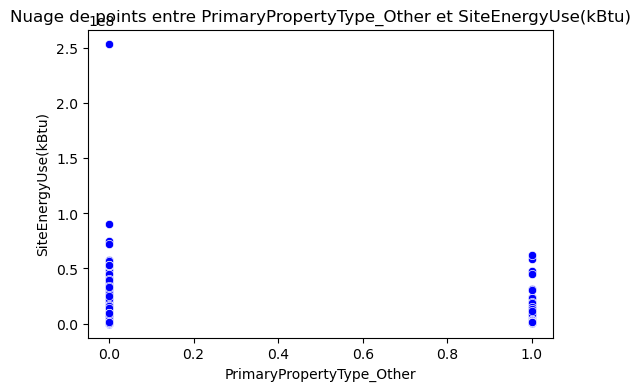

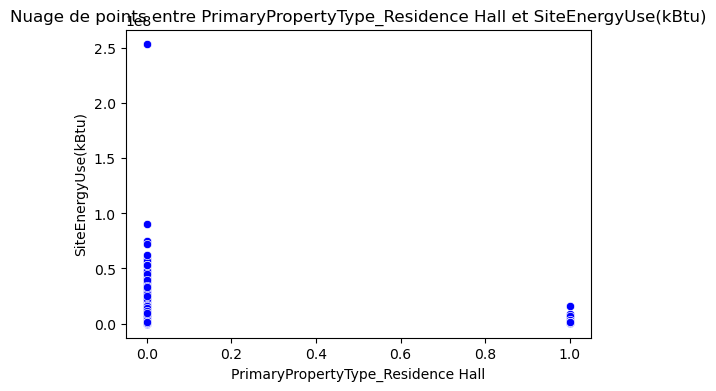

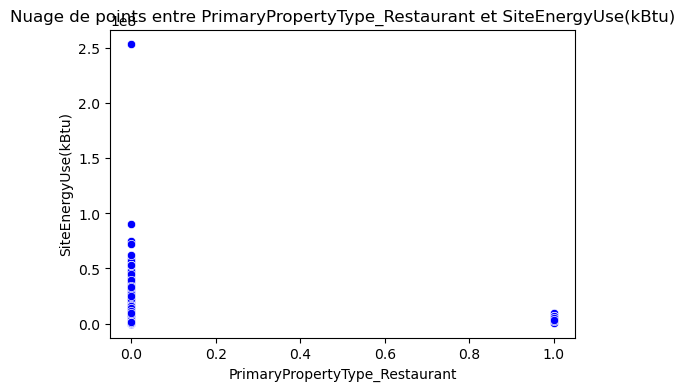

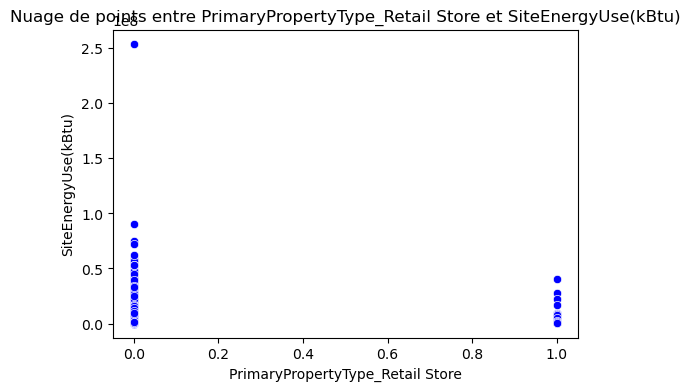

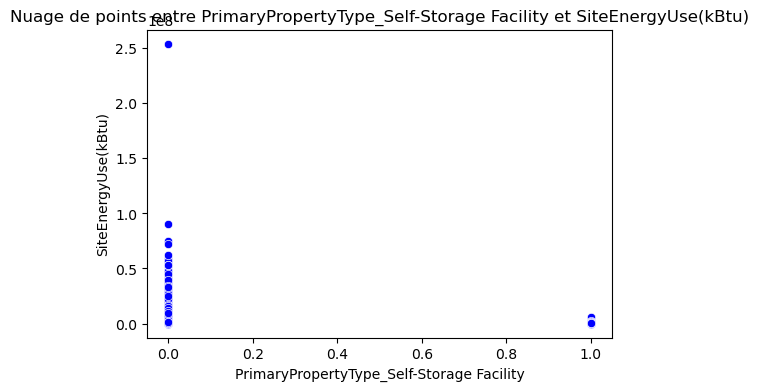

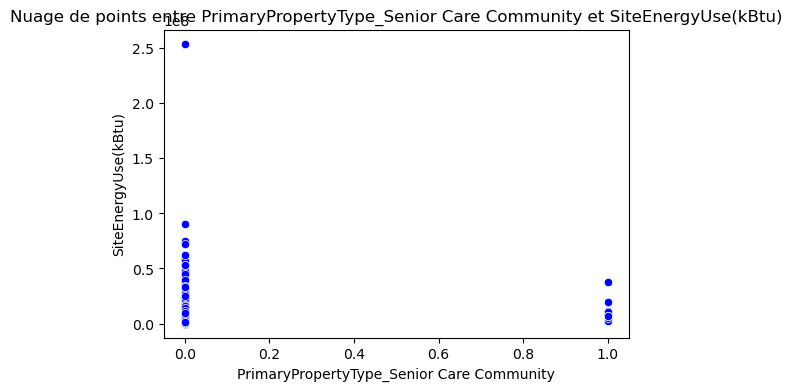

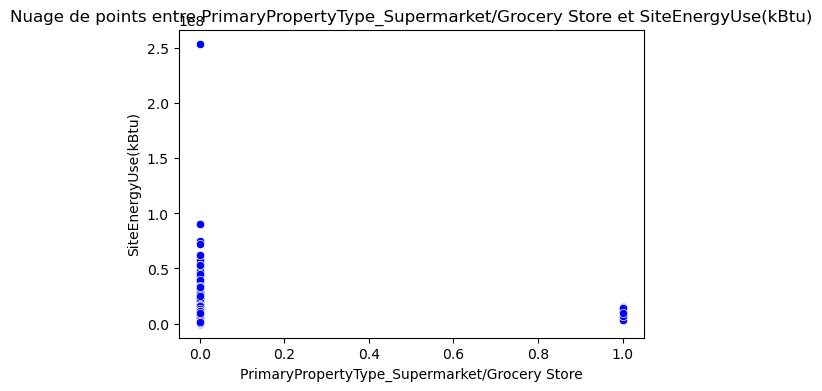

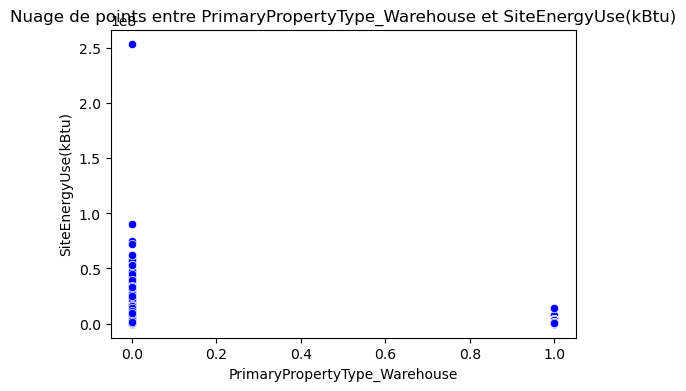

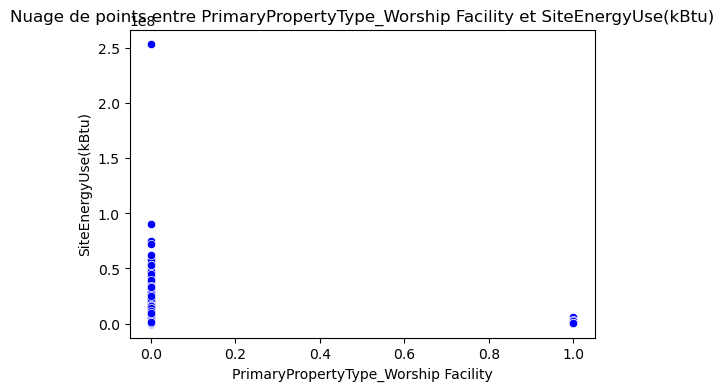

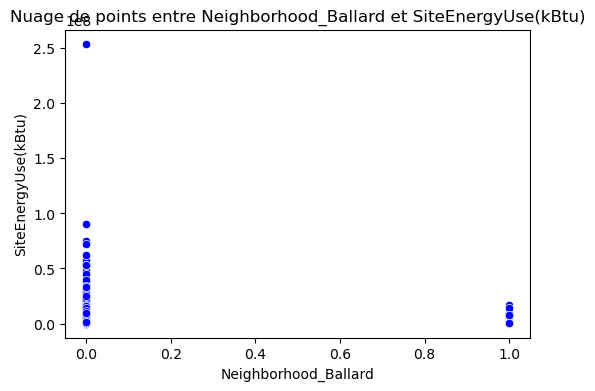

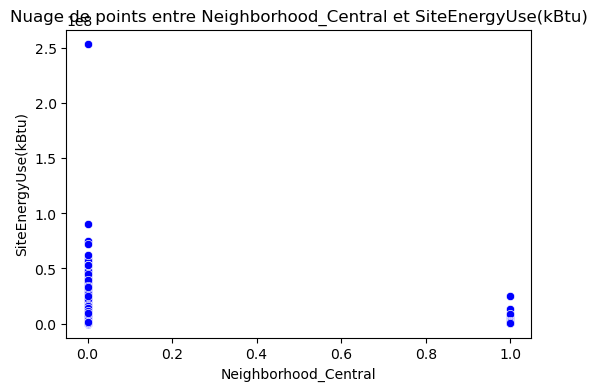

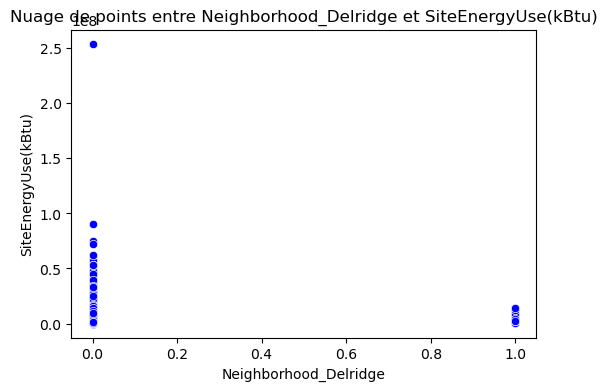

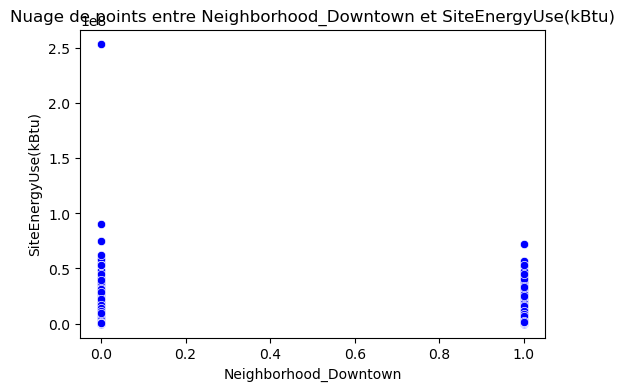

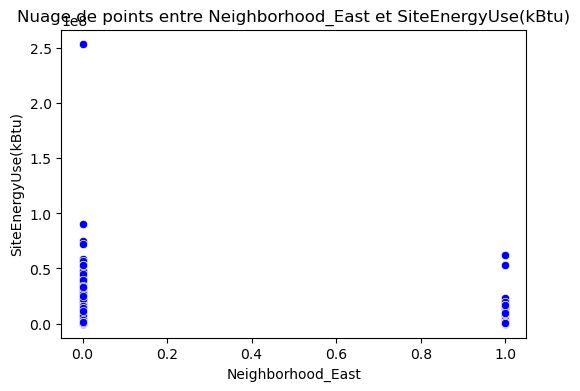

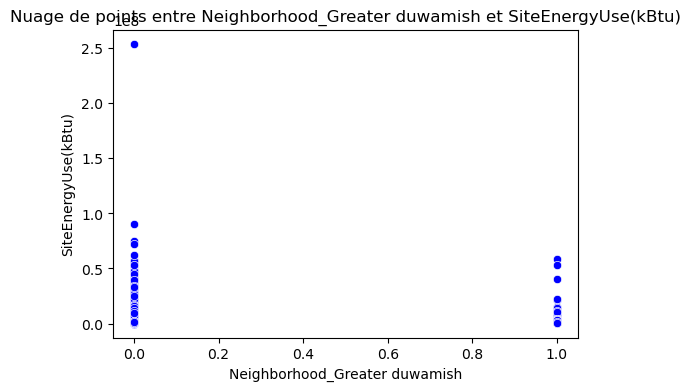

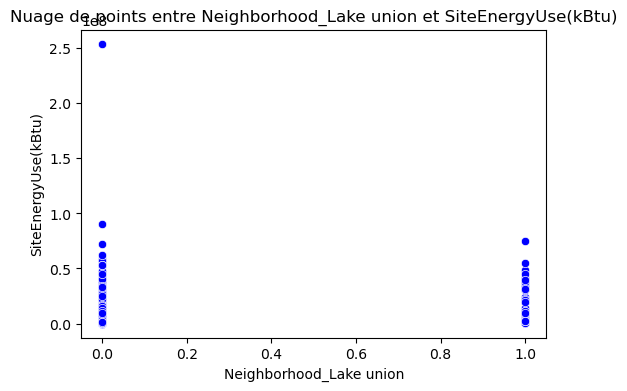

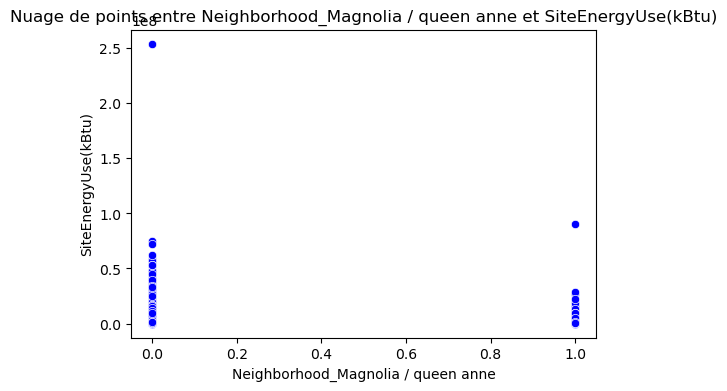

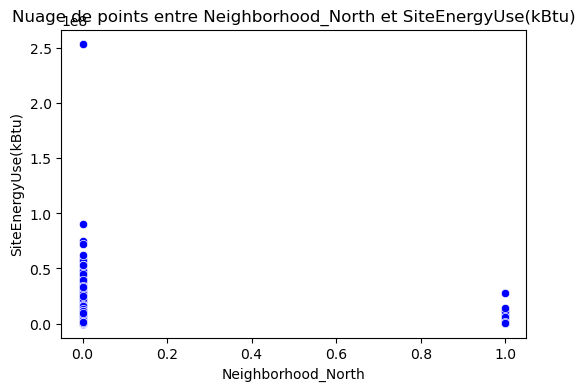

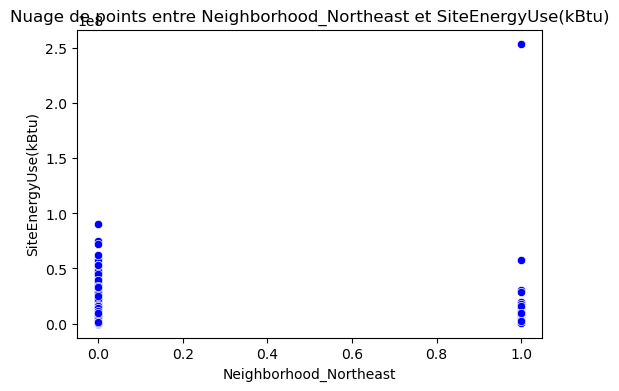

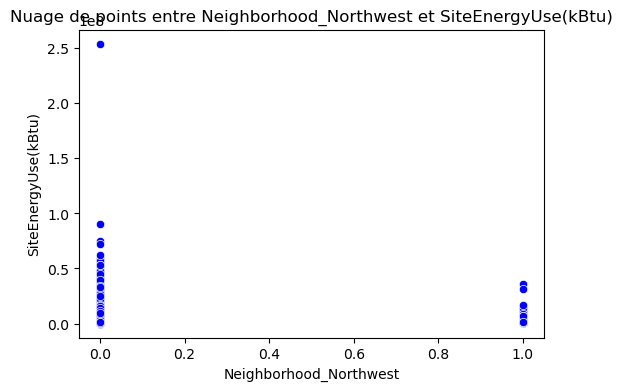

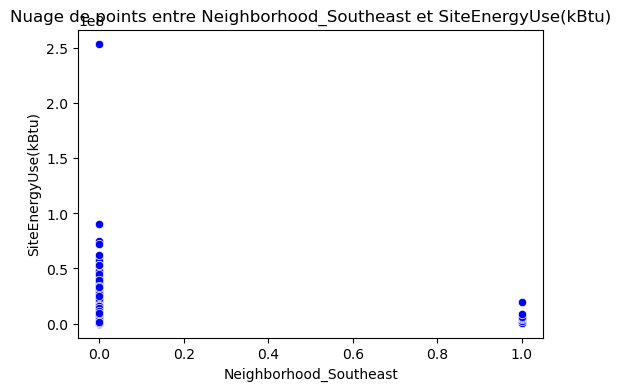

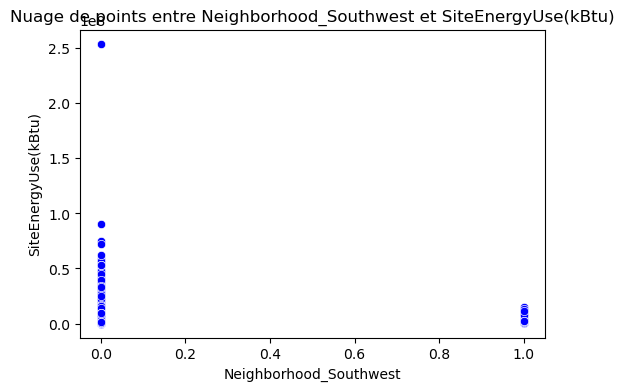

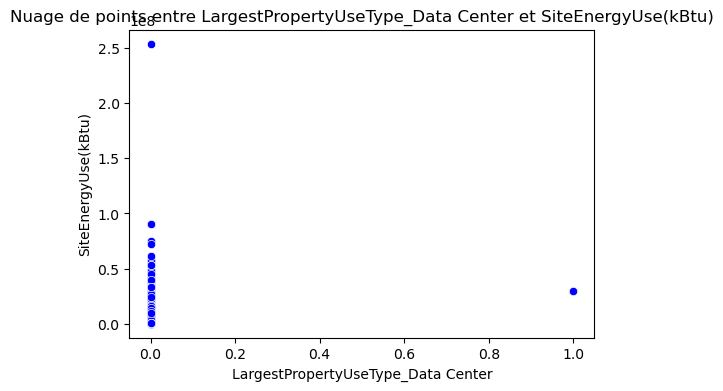

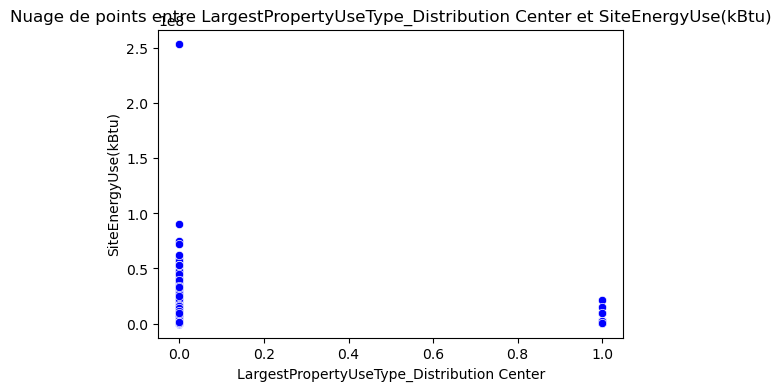

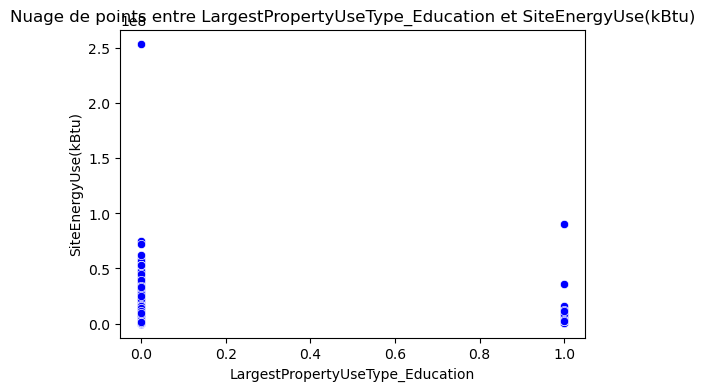

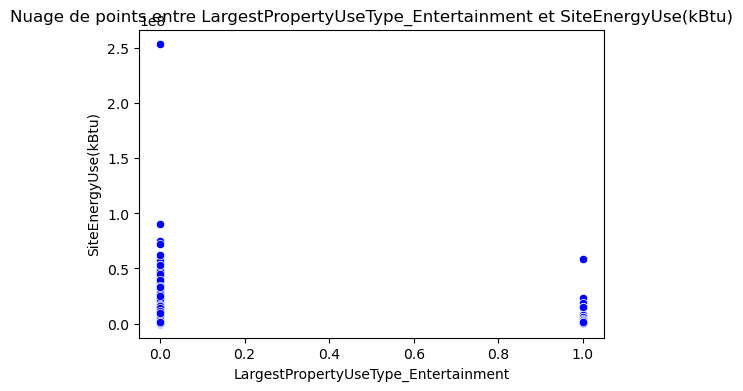

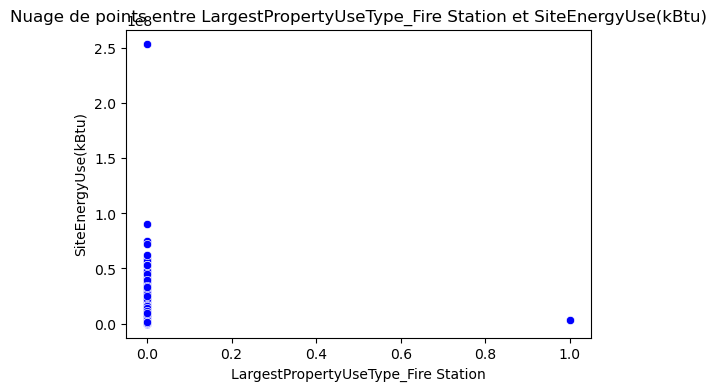

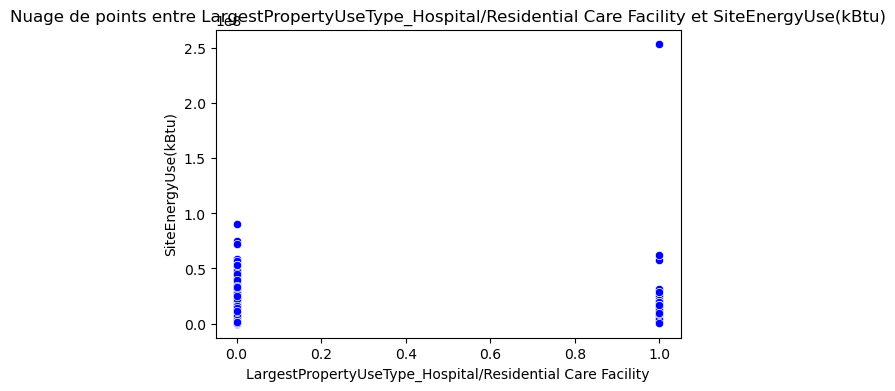

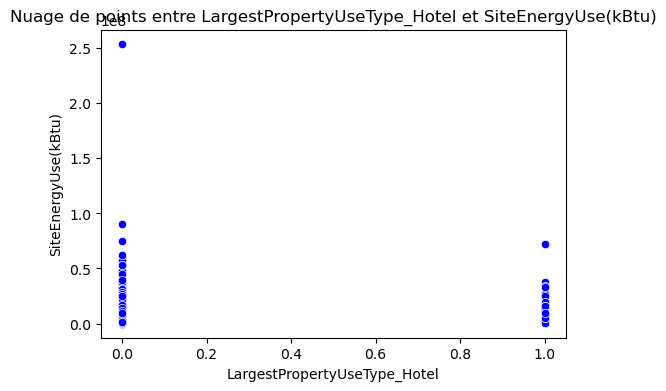

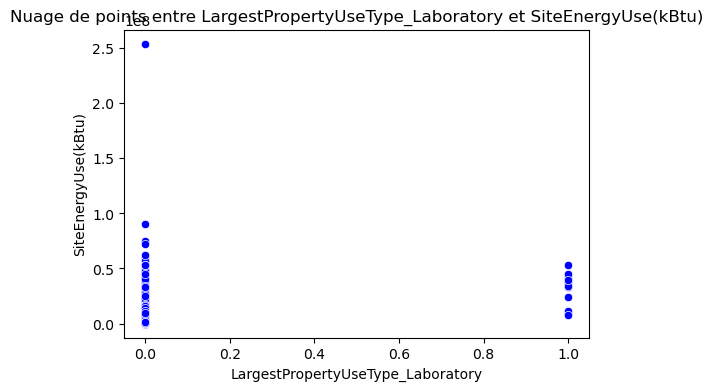

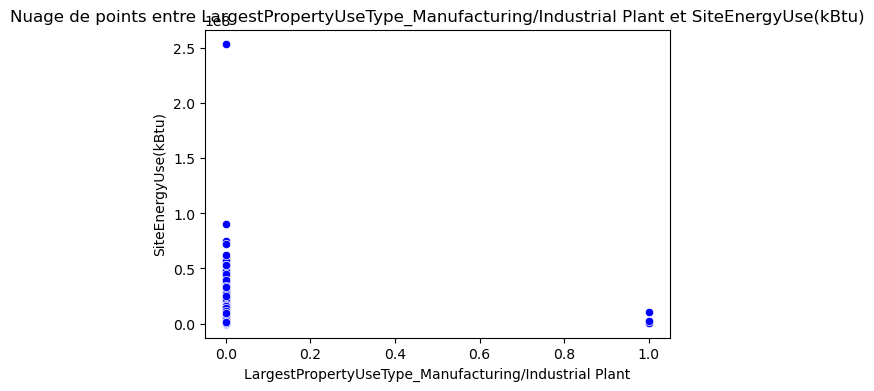

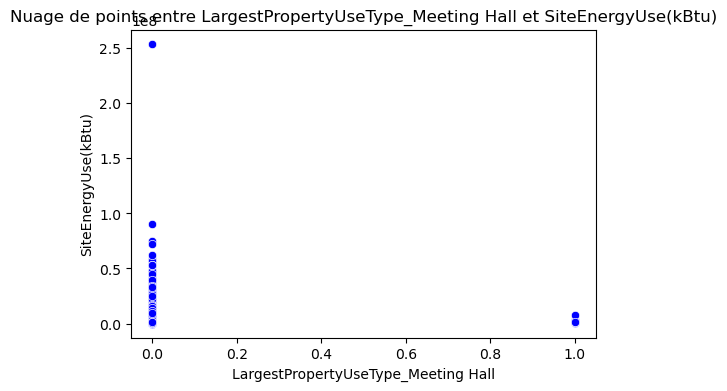

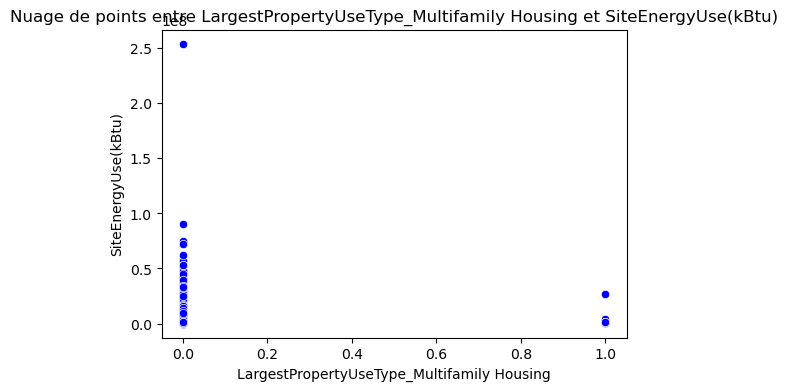

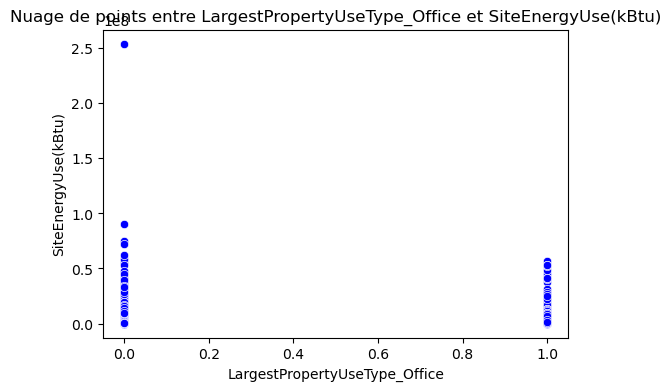

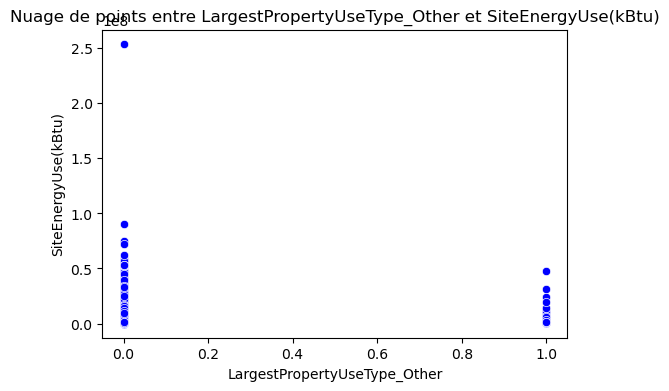

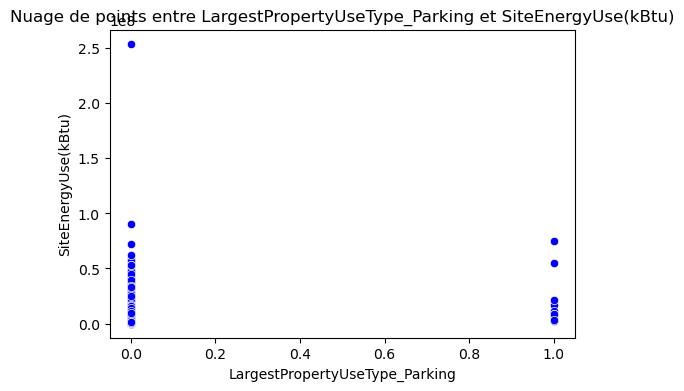

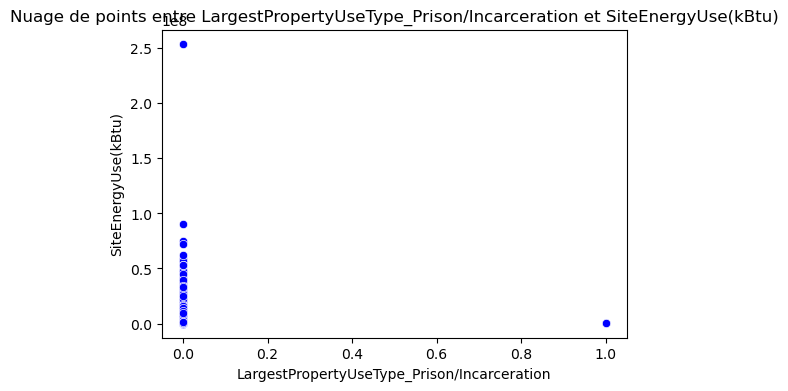

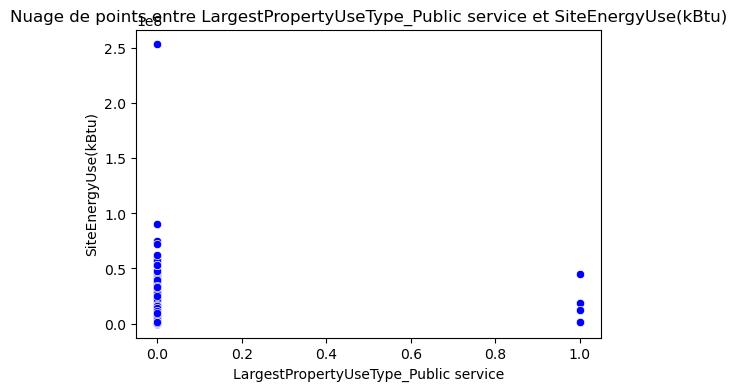

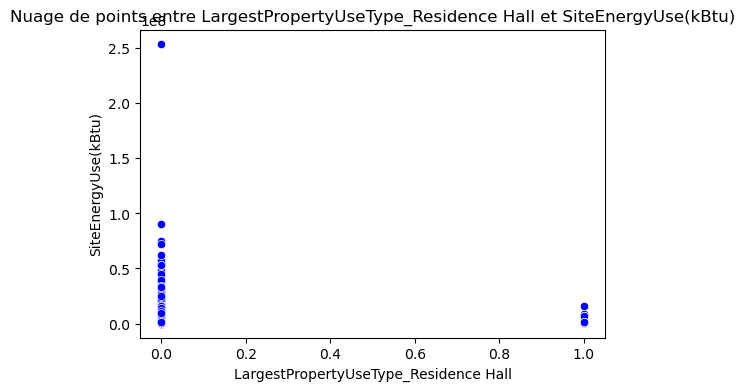

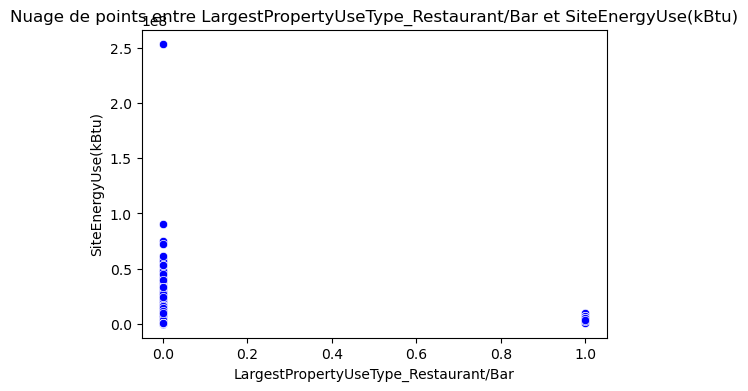

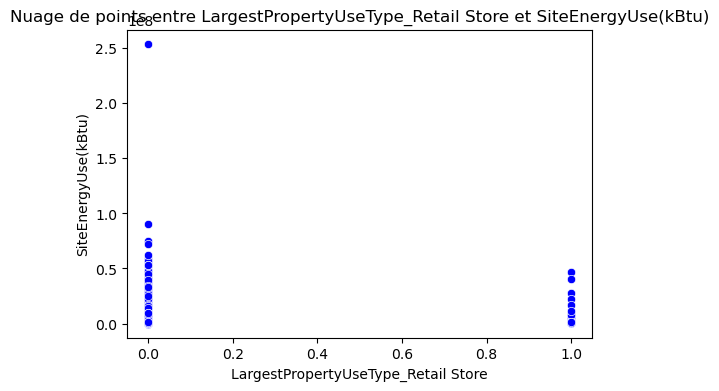

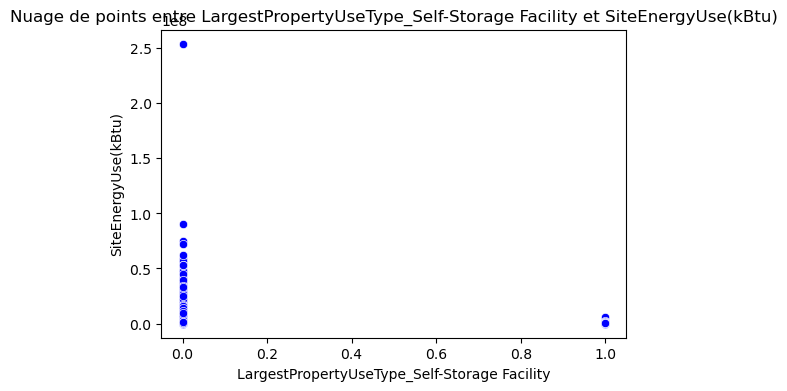

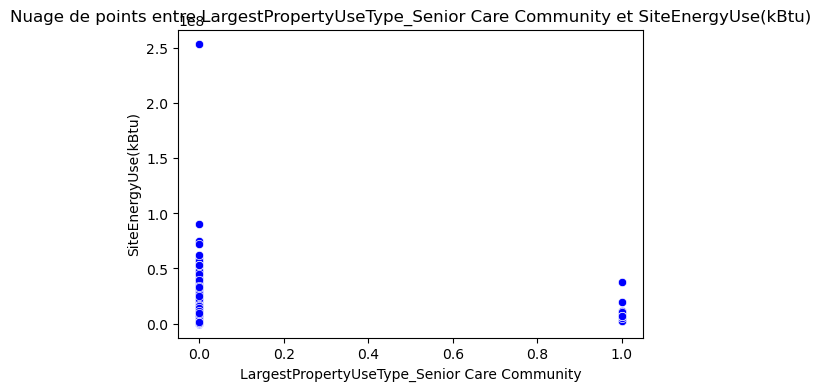

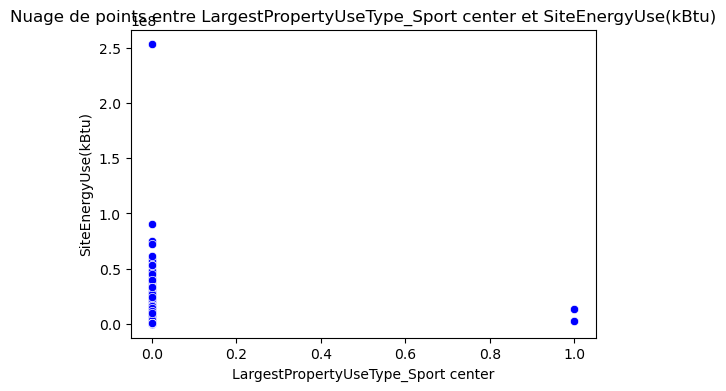

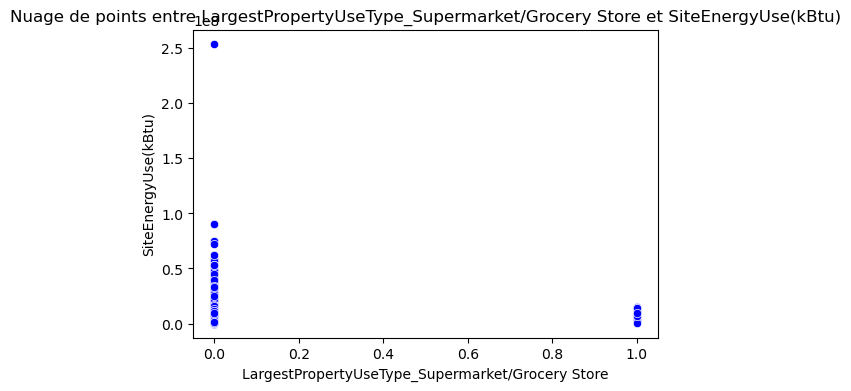

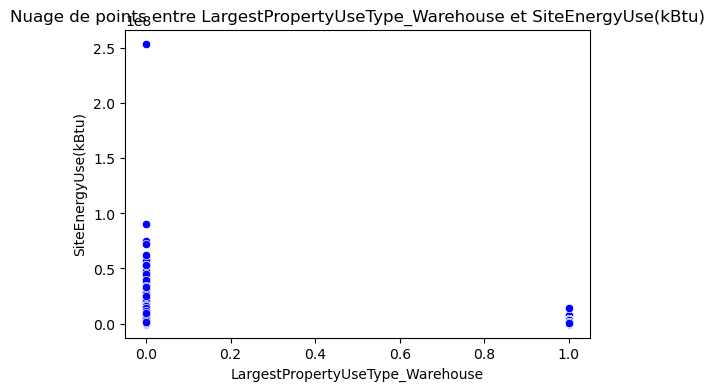

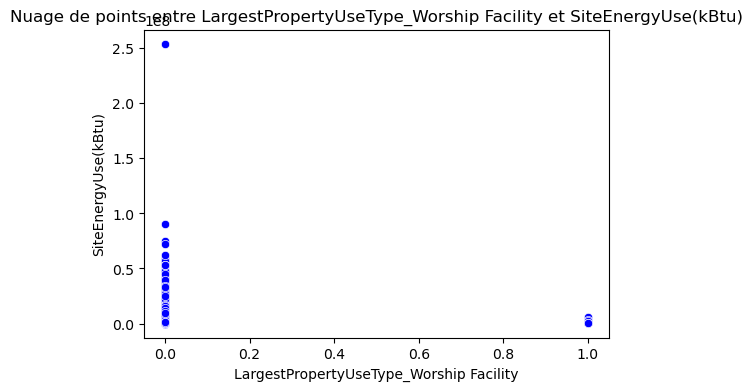

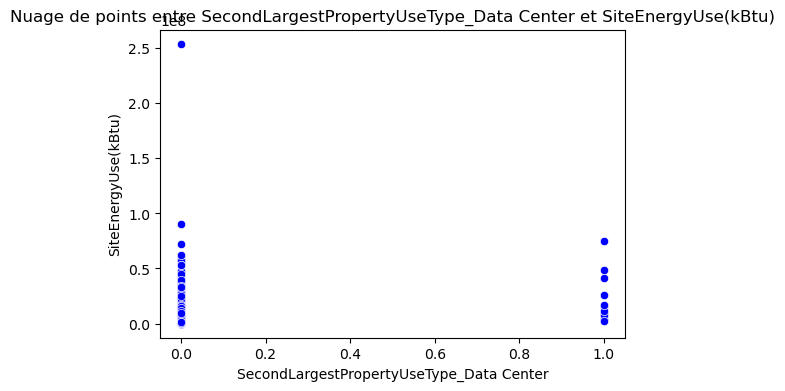

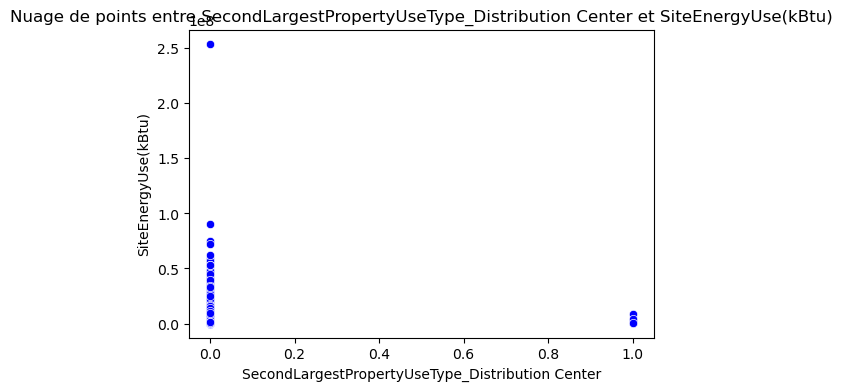

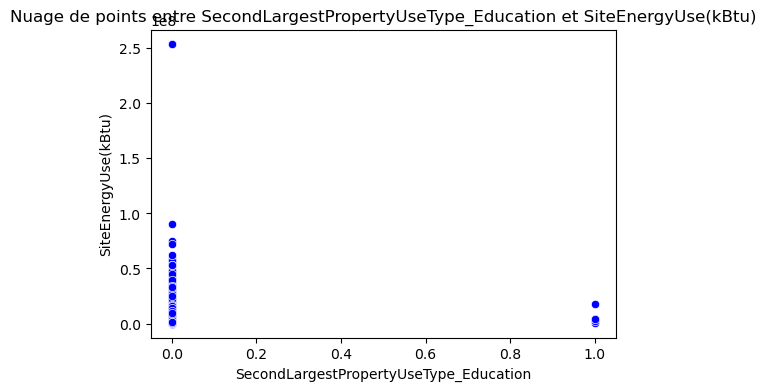

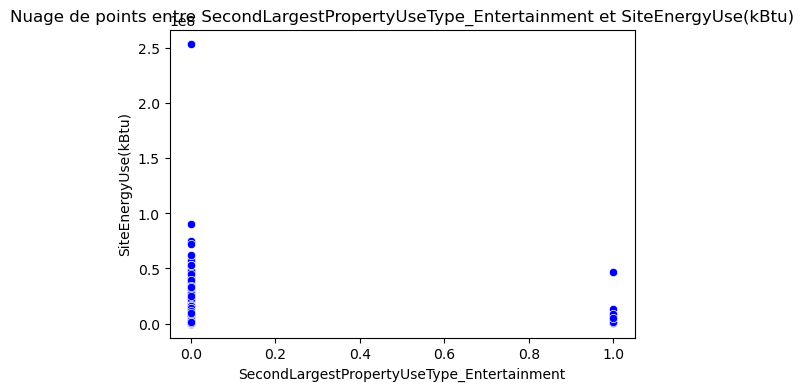

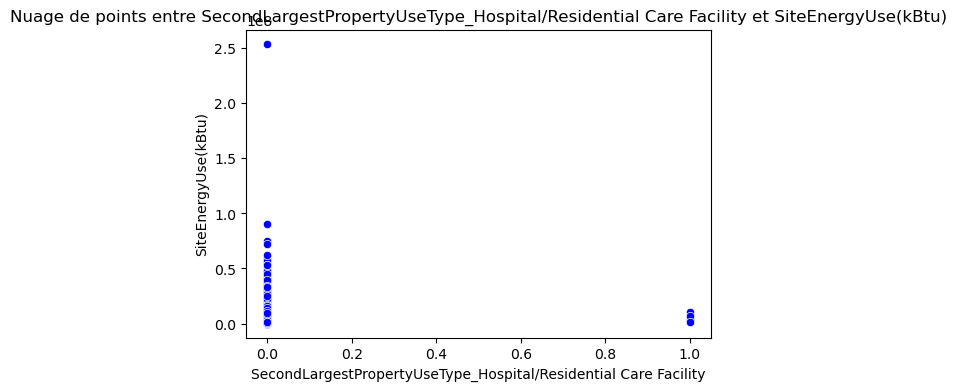

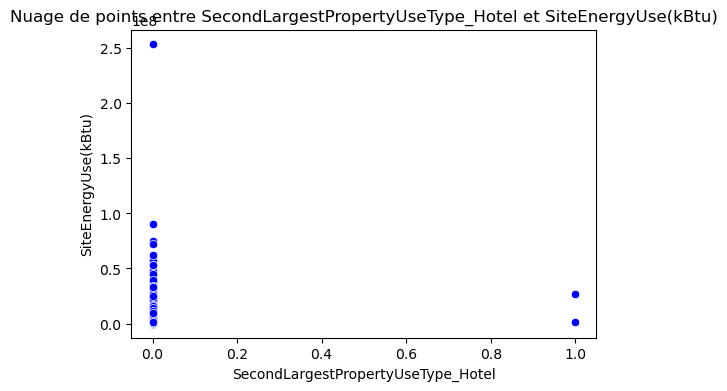

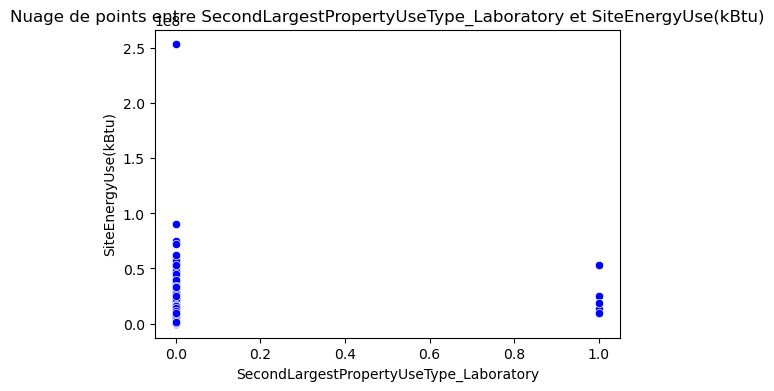

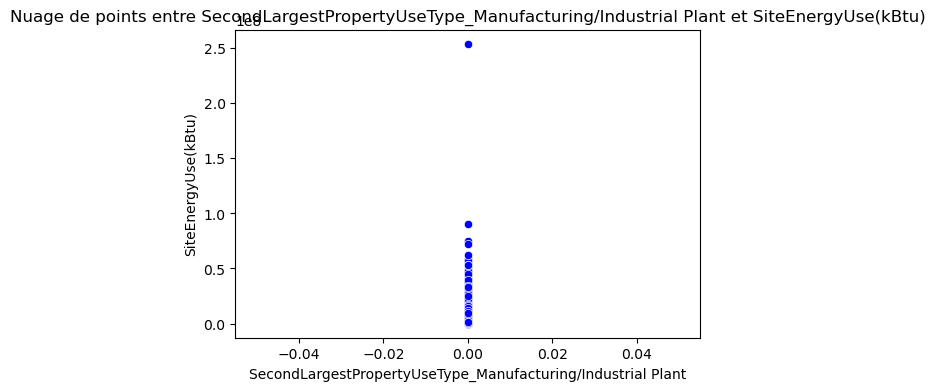

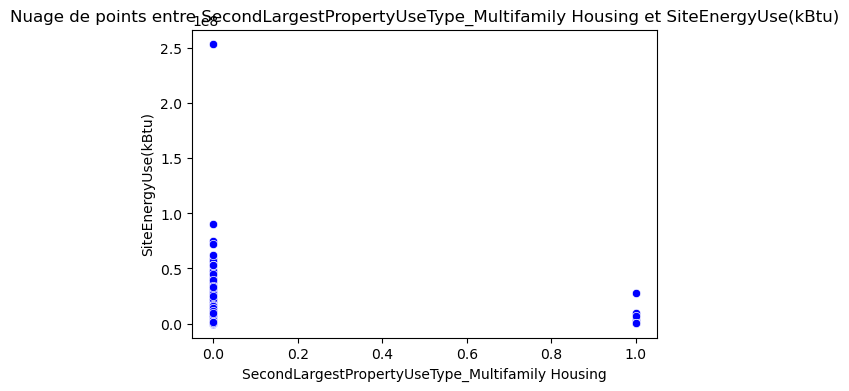

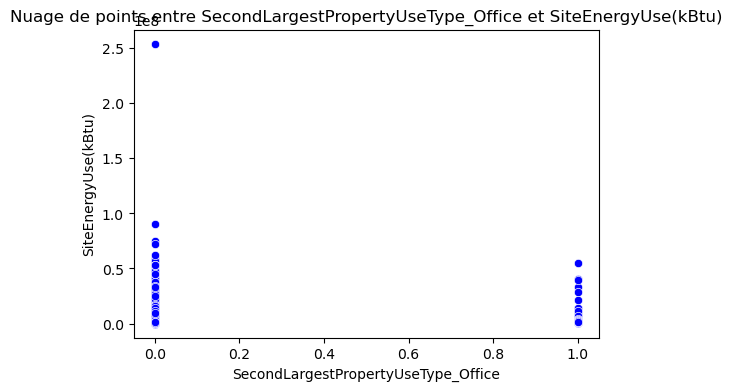

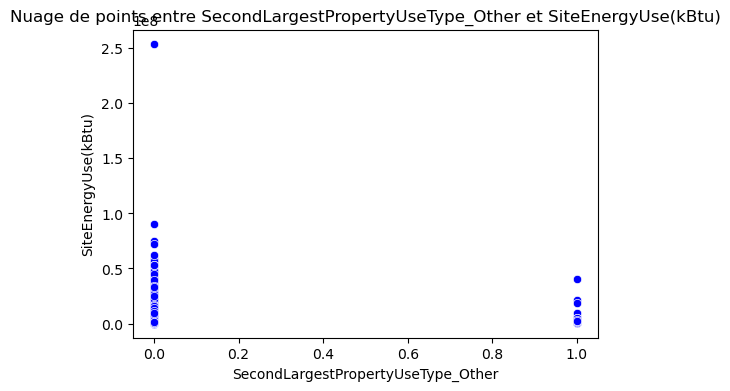

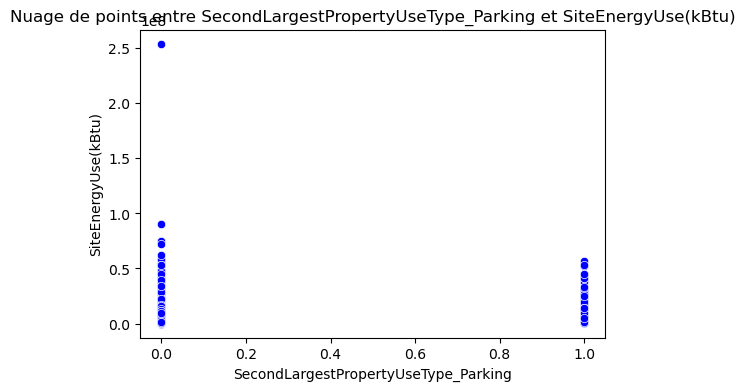

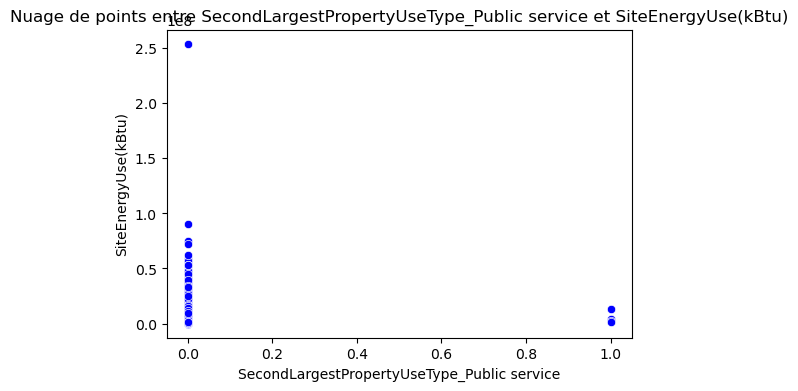

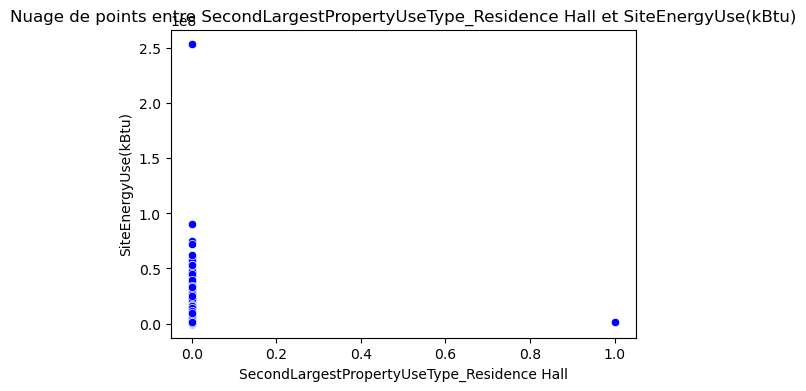

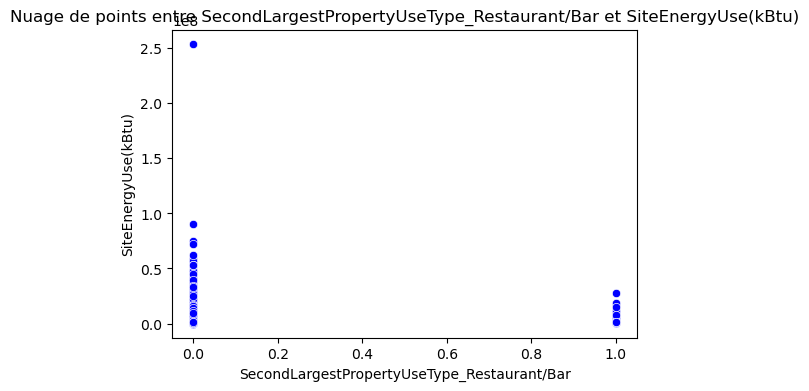

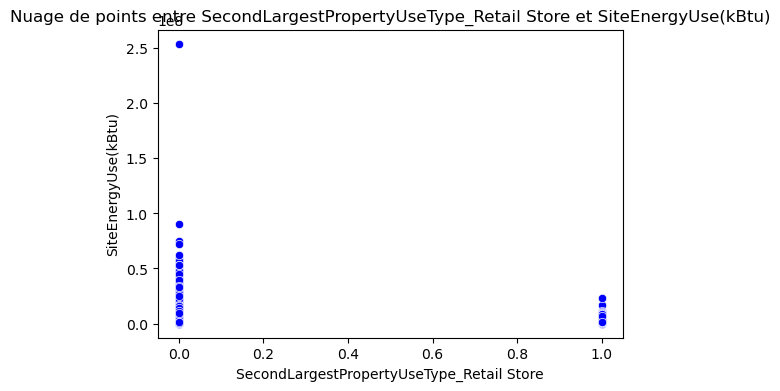

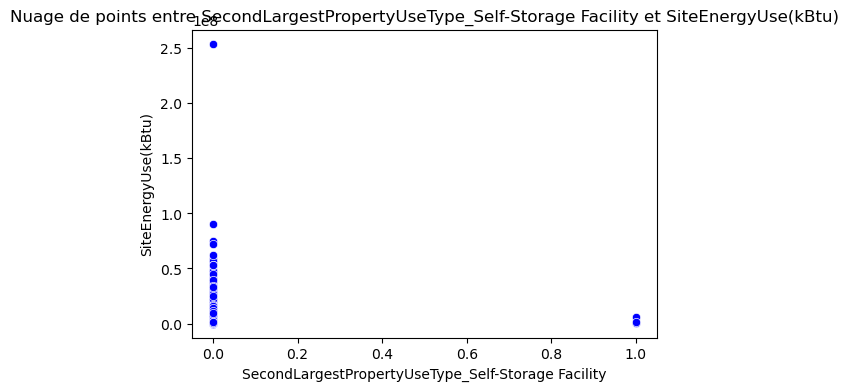

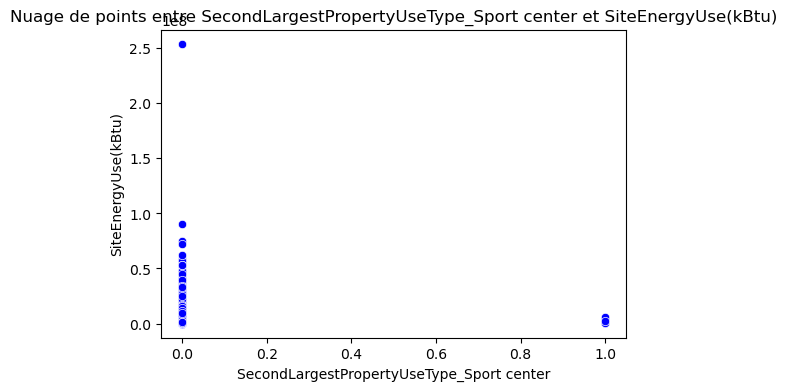

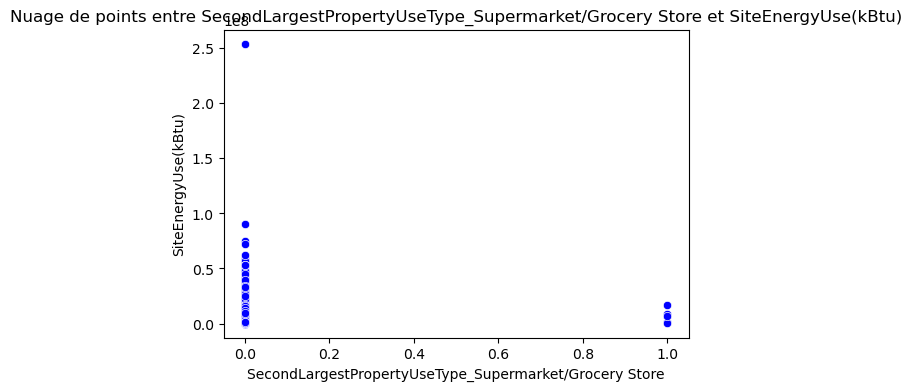

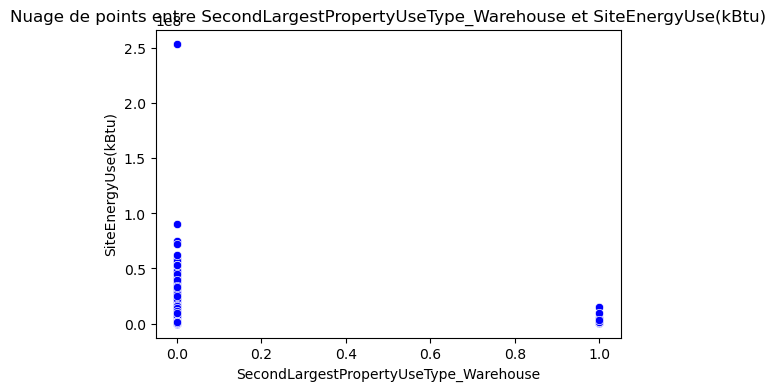

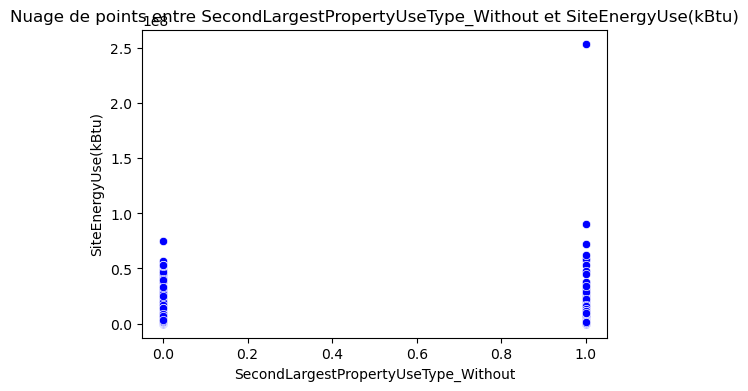

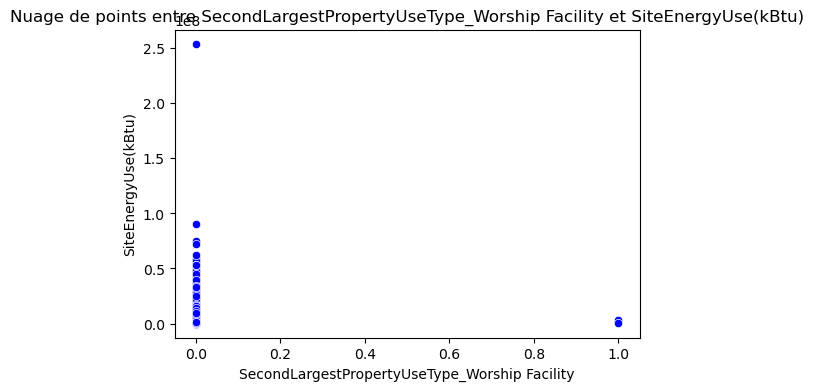

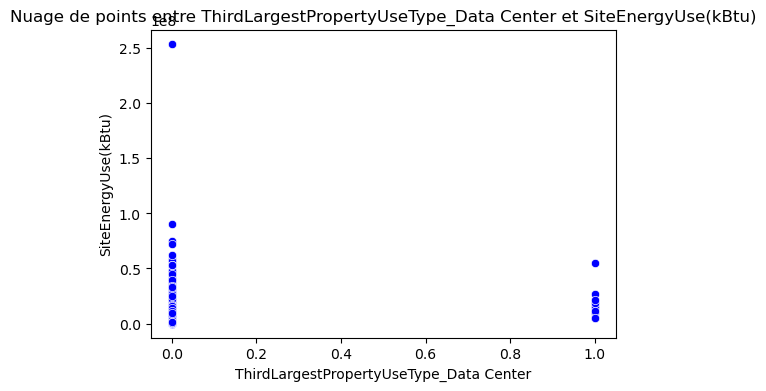

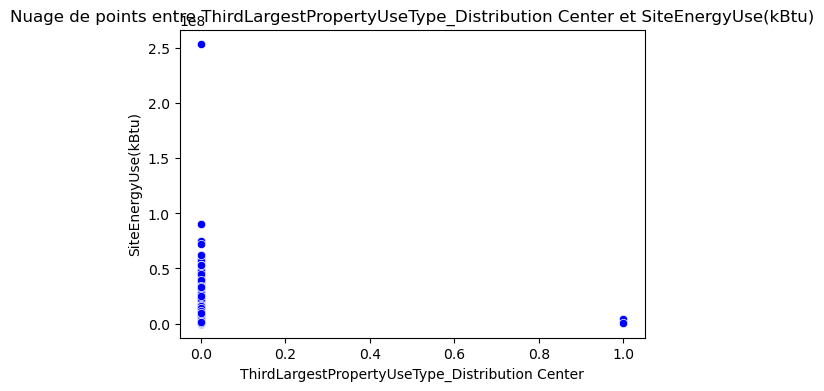

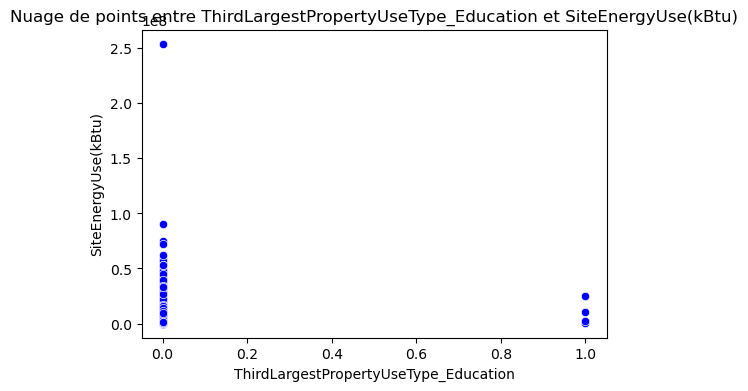

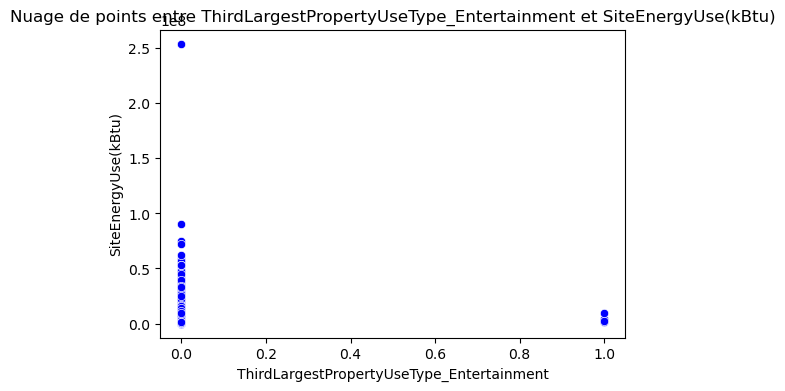

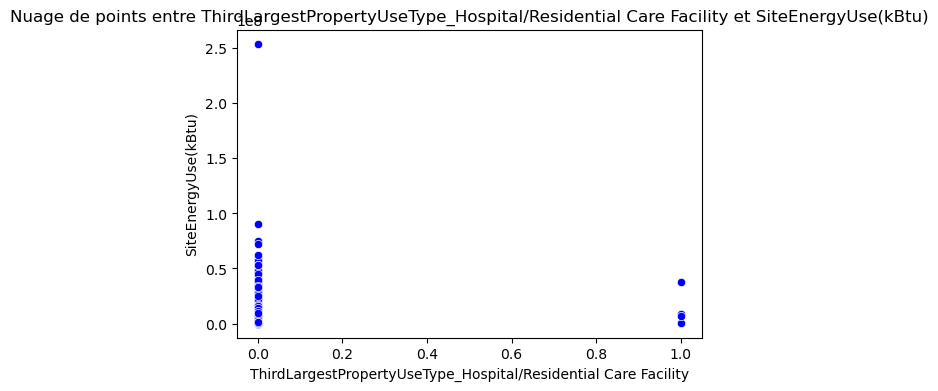

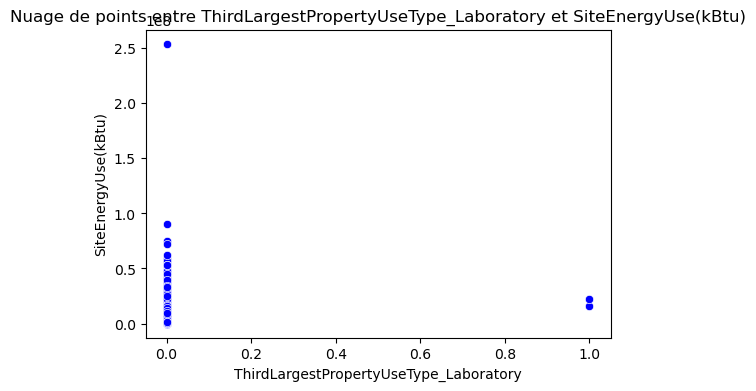

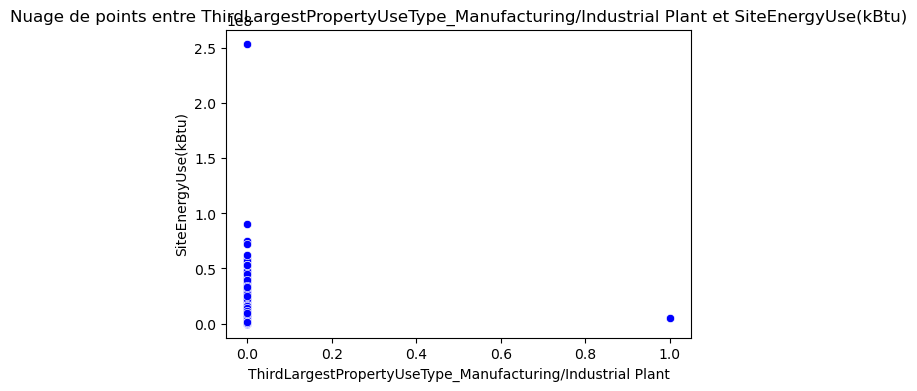

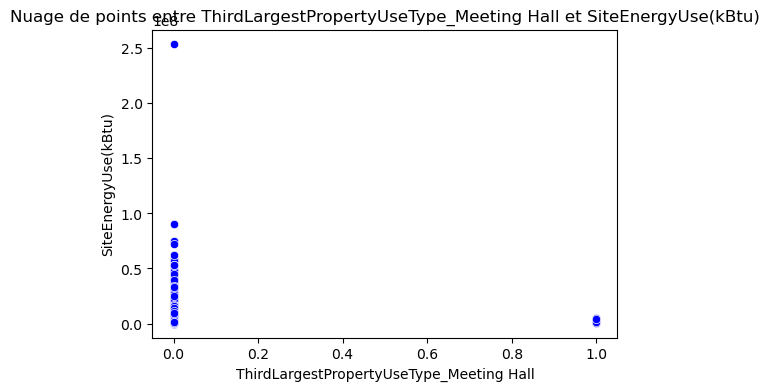

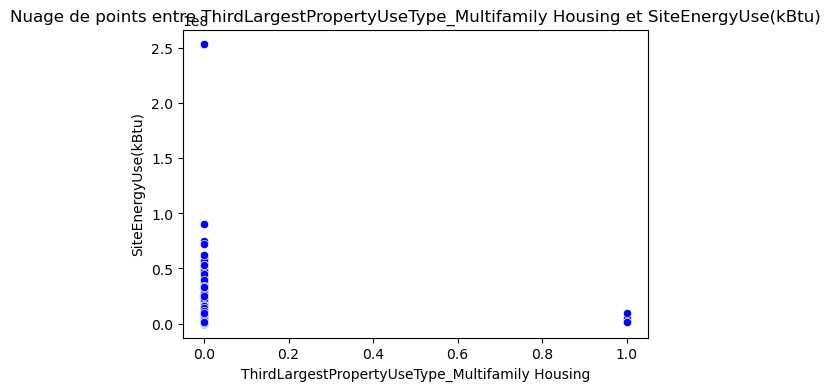

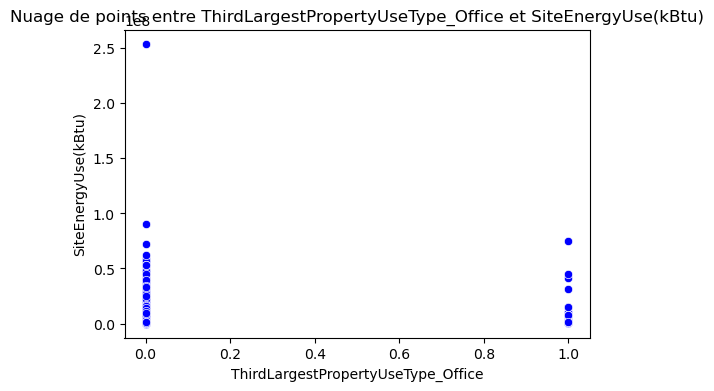

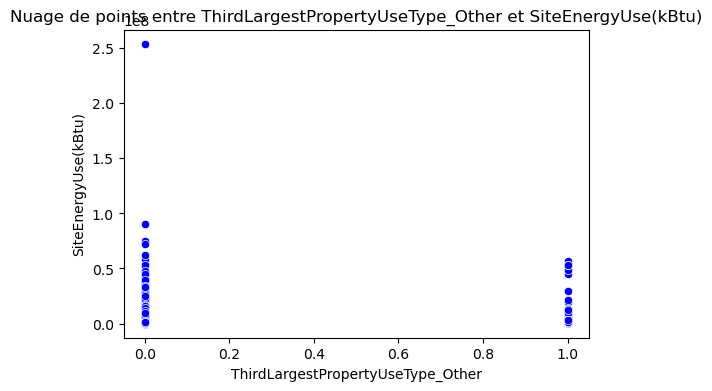

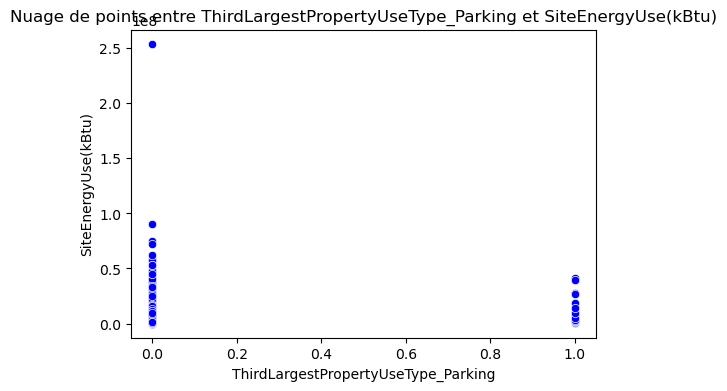

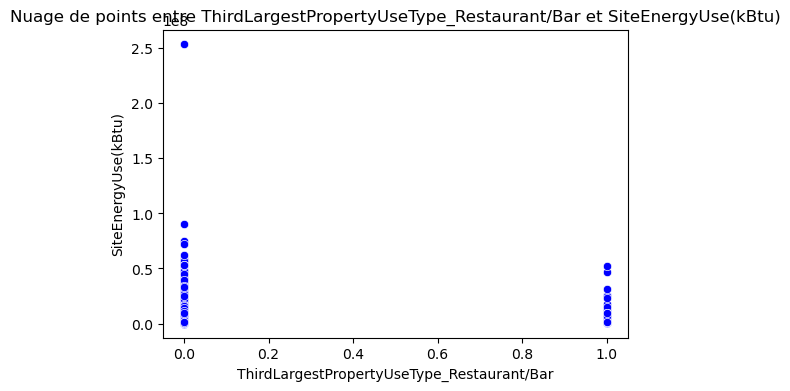

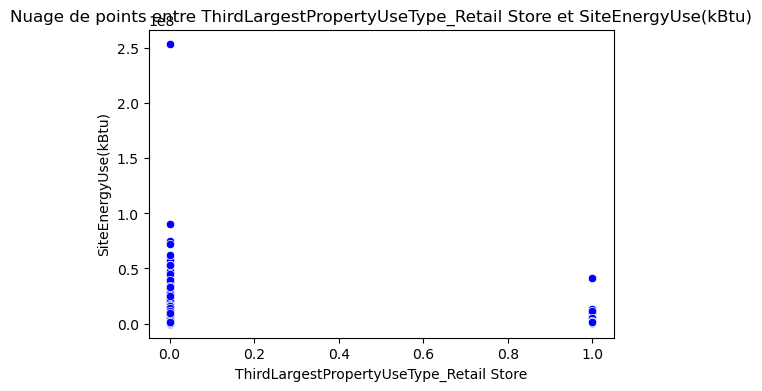

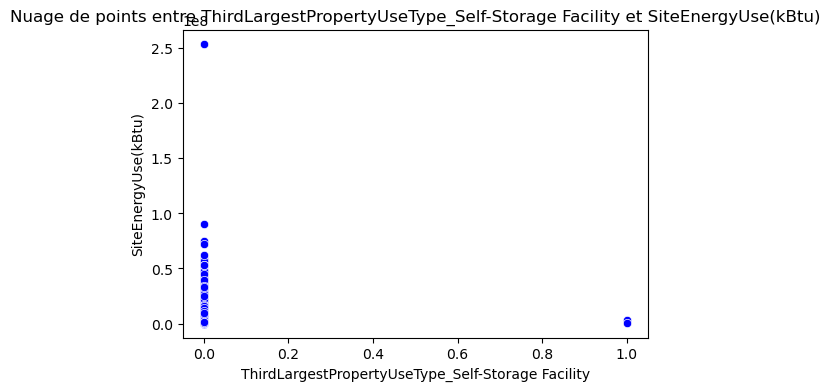

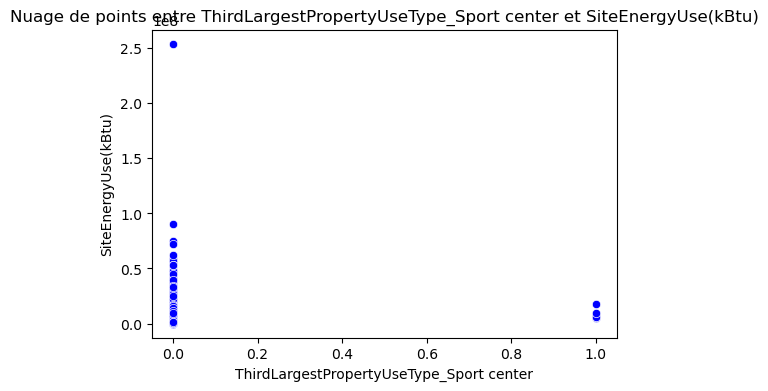

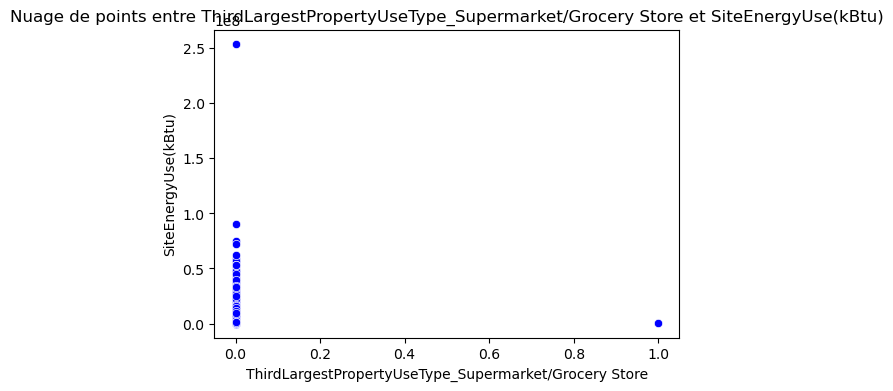

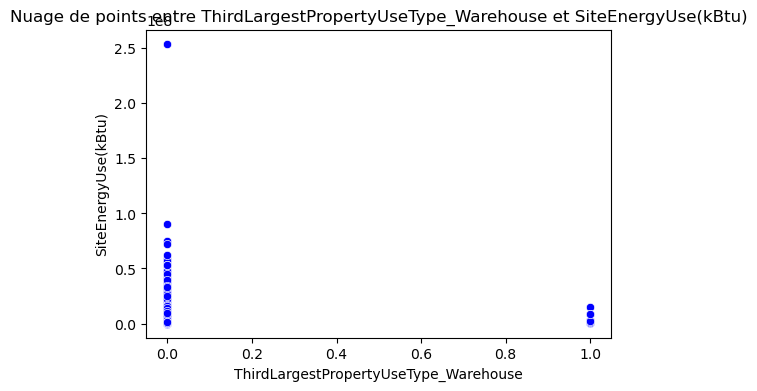

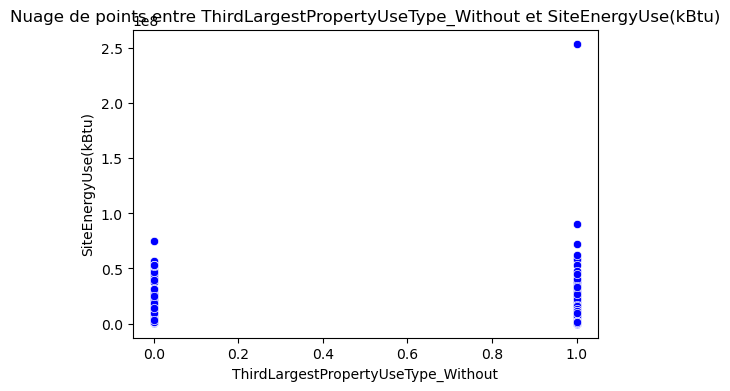

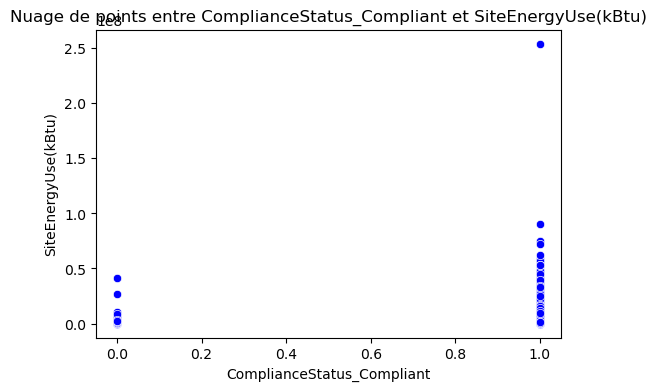

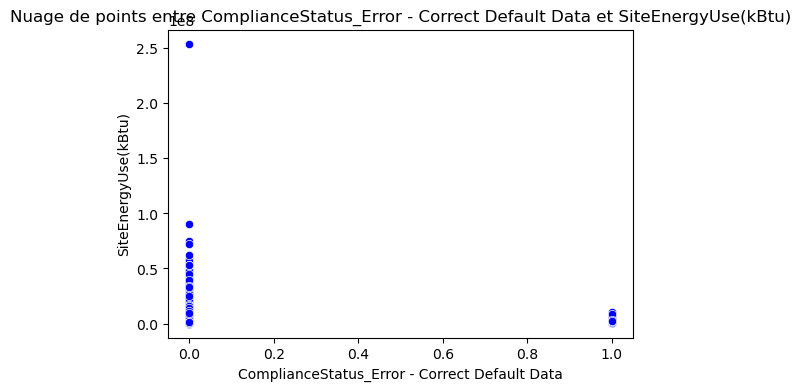

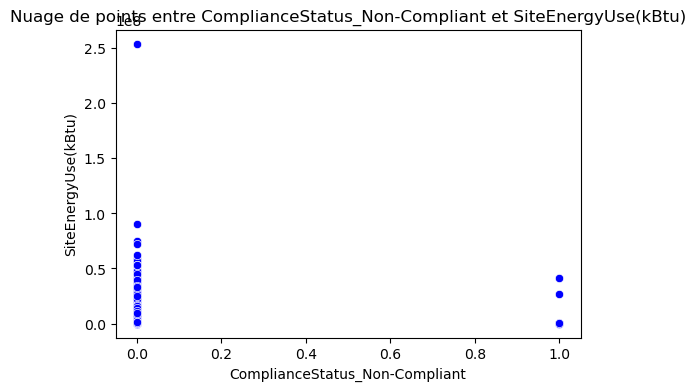

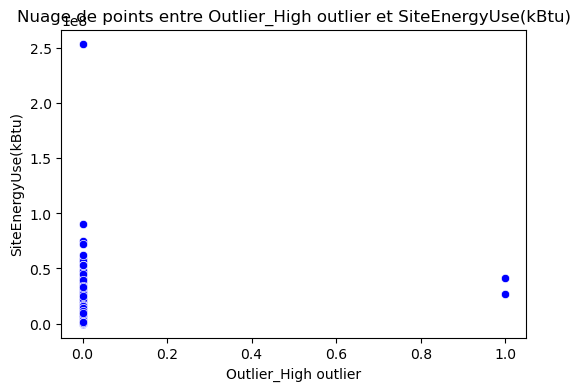

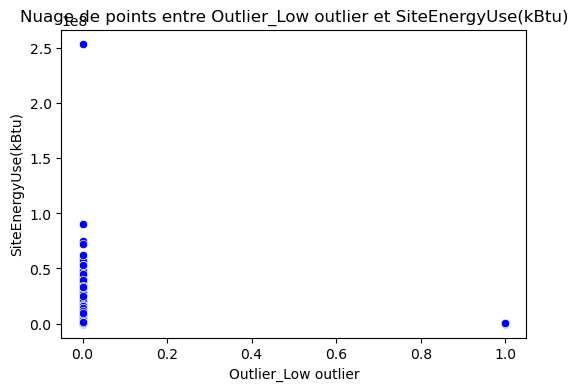

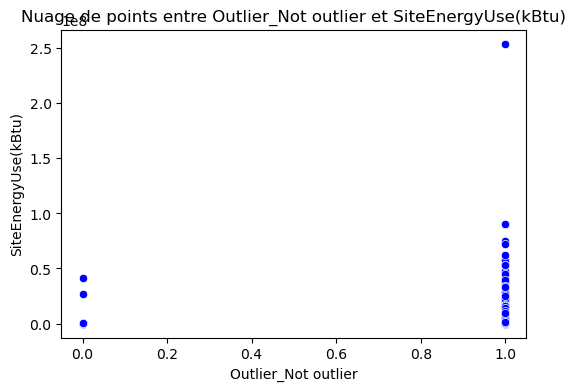

In [137]:
# Affichage des nuages de points entre la variable d'intérêt et toutes les autres variables 
target_col = "SiteEnergyUse(kBtu)"
num_cols = list(train.select_dtypes(include=["float64", "int64"]).columns)
num_cols.remove(target_col)

for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=train, x=col, y=target_col, color="blue")
    plt.title(f"Nuage de points entre {col} et {target_col}")
    plt.xlabel(col)
    plt.ylabel(target_col)
    plt.show()

### Selection des variables à partir de la correlation de pearson


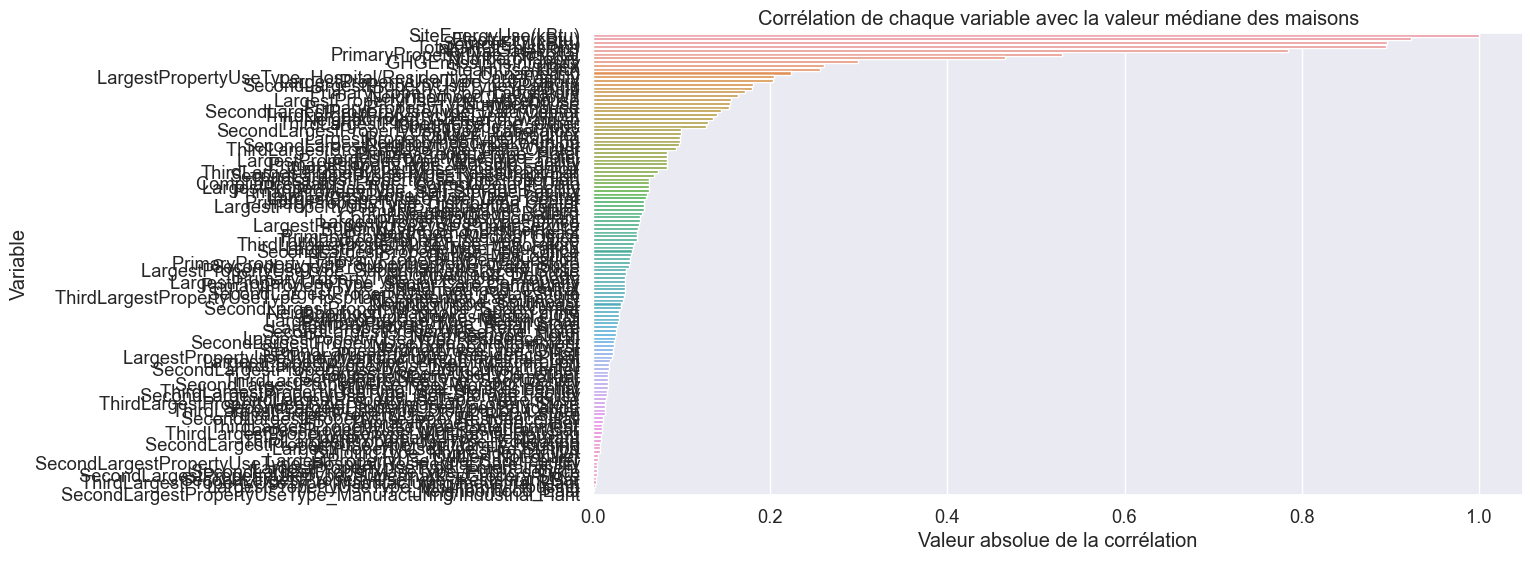

In [143]:

# Calcul de la corrélation entre chaque variable et la variable cible (en valeur absolue)
correlations = abs(train.corr()["SiteEnergyUse(kBtu)"]).sort_values(ascending=False)

# Représentation graphique des corrélations
plt.figure(figsize=(12, 6))
sns.barplot(x=correlations.values, y=correlations.index)
plt.xlabel("Valeur absolue de la corrélation")
plt.ylabel("Variable")
plt.title("Corrélation de chaque variable avec la valeur médiane des maisons")
plt.show()

## MODELISATION SUR LA BASE TRAIN

### 1. Modèle de Regression Lineaire

In [140]:
import statsmodels.api as sm
# Séparation des variables prédictives et de la variable cible
X_train = train.drop("SiteEnergyUse(kBtu)", axis=1)
y_train = train["SiteEnergyUse(kBtu)"]


X_test = test.drop("SiteEnergyUse(kBtu)", axis=1)
y_test = test["SiteEnergyUse(kBtu)"]

# Fit du modèle linéaire
lr_model = sm.OLS(y_train, sm.add_constant(X_train)).fit()

# Obtention du tableau de résultats
results_table = lr_model.summary2().tables[1]
results_table

Coef.     Std.Err.  \
const                                         -5823.402908  4132.310868   
index                                             2.851003     1.991801   
Unnamed: 0                                       -1.044919     0.733594   
YearBuilt                                         5.539952     4.351387   
NumberofFloors                                  -50.874490    35.499874   
...                                                    ...          ...   
ComplianceStatus_Error - Correct Default Data -2222.467886  1853.790903   
ComplianceStatus_Non-Compliant                -1829.637512  2286.201064   
Outlier_High outlier                          -1560.402722  2791.186903   
Outlier_Low outlier                           -2173.502219  1950.701480   
Outlier_Not outlier                           -2089.497968  2306.963761   

                                                      t     P>|t|  \
const                                         -1.409236  0.159103   
index                                          1.431369  0.152664   
Unnamed: 0                                    -1.424383  0.154675   
YearBuilt                                      1.273146  0.203288   
NumberofFloors                                -1.433089  0.152172   
...                                                 ...       ...   
ComplianceStatus_Error - Correct Default Data -1.198877  0.230884   
ComplianceStatus_Non-Compliant                -0.800296  0.423746   
Outlier_High outlier                          -0.559046  0.576266   
Outlier_Low outlier                           -1.114216  0.265478   
Outlier_Not outlier                           -0.905735  0.365313   

                                                     [0.025       0.975]  
const                                         -13933.252571  2286.446754  
index                                             -1.057998     6.760004  
Unnamed: 0                                        -2.484632     0.394794  
YearBuilt                                         -2.999844    14.079748  
NumberofFloors                                  -120.544621    18.795641  
...                                                     ...          ...  
ComplianceStatus_Error - Correct Default Data  -5860.617581  1415.681808  
ComplianceStatus_Non-Compliant                 -6316.411987  2657.136962  
Outlier_High outlier                           -7038.235074  3917.429630  
Outlier_Low outlier                            -6001.843368  1654.838931  
Outlier_Not outlier                            -6617.020188  2438.024252  

[122 rows x 6 columns]

les variables utilisés sont significatives au seuil 15%

In [141]:
lr_model.summary2().tables[0]

0                    1                    2           3
0               Model:                  OLS      Adj. R-squared:       1.000
1  Dependent Variable:  SiteEnergyUse(kBtu)                 AIC:  19796.4152
2                Date:     2024-02-05 10:53                 BIC:  20324.3957
3    No. Observations:                 1027      Log-Likelihood:     -9791.2
4            Df Model:                  106         F-statistic:   1.206e+08
5        Df Residuals:                  920  Prob (F-statistic):        0.00
6           R-squared:                1.000               Scale:  1.2481e+07

In [ ]:
print("Ecart absolu moyen = ",mean_absolute_error(Y_test,))

In [157]:
print("RMSE: %.2f" % np.sqrt(mean_squared_error(y_test, y_rdf_pred)))

RMSE: 12065015.44


In [ ]:
#plt.title("LinearRegression - SiteEnergyUseWN(kBtu)")
#plt.scatter(y_test,X_test , color='coral')
#plt.xlabel("Vraies valeurs")
#plt.ylabel("Valeurs prédictes")

Definition des modèles LinearSVR, RandomForestRegressor et XGBRegressor

In [145]:
lsvr = LinearSVR(random_state=42, tol=1e-05)
clf = RandomForestRegressor(max_depth=2, random_state=42)
#xgb = xgb.XGBRegressor(objective="reg:linear", random_state=42)
xgb = XGBRegressor(max_depth=2,random_state=42)

## 2. Algorithme LinearSVR

In [146]:
lsvr.fit(X_train, y_train)
y_lsvr_pred = lsvr.predict(X_test)
print("RMSE: %.2f" % np.sqrt(mean_squared_error(y_test, y_lsvr_pred)))
print("Coefficient of determination (R²): %.2f"% r2_score(y_test, y_lsvr_pred))

RMSE: 20705.16
Coefficient of determination (R²): 1.00


C:\Users\HP\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Text(0, 0.5, 'Valeurs prédictes')

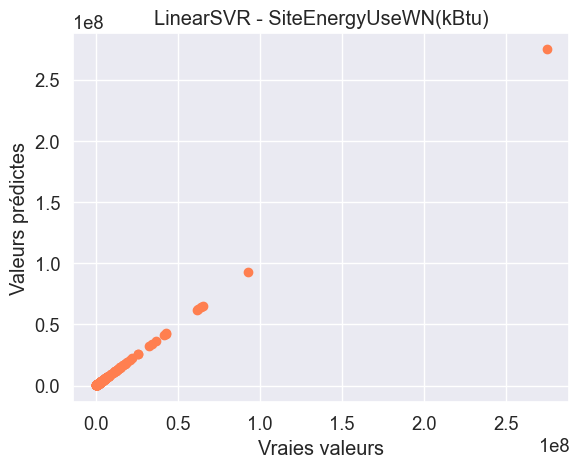

In [147]:
plt.title("LinearSVR - SiteEnergyUseWN(kBtu)")
plt.scatter(y_test, y_lsvr_pred, color='coral')
plt.xlabel("Vraies valeurs")
plt.ylabel("Valeurs prédictes")

## 3. Algorithme RandomForestRegressor

In [148]:
clf.fit(X_train, y_train)
y_rdf_pred = clf.predict(X_test)
print("RMSE: %.2f" % np.sqrt(mean_squared_error(y_test, y_rdf_pred)))
print("Coefficient of determination (R²): %.2f"% r2_score(y_test, y_rdf_pred))

RMSE: 12065015.44
Coefficient of determination (R²): 0.64


Text(0, 0.5, 'Valeurs prédictes')

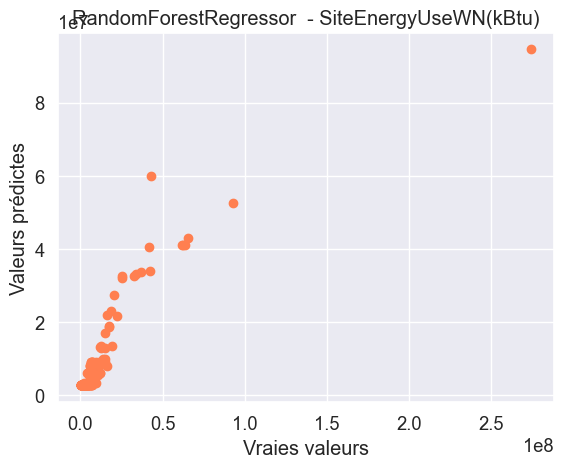

In [149]:
plt.title("RandomForestRegressor  - SiteEnergyUseWN(kBtu)")
plt.scatter(y_test, y_rdf_pred, color='coral')
plt.xlabel("Vraies valeurs")
plt.ylabel("Valeurs prédictes")

## 4.Algorithme XGBoost

In [150]:
xgb.fit(X_train, y_train)
y_xgb_pred = xgb.predict(X_test)
print("RMSE: %.2f" % np.sqrt(mean_squared_error(y_test, y_xgb_pred)))
print("Coefficient of determination (R²): %.2f"% r2_score(y_test, y_xgb_pred))

RMSE: 11121601.93
Coefficient of determination (R²): 0.70


Text(0, 0.5, 'Valeurs prédictes')

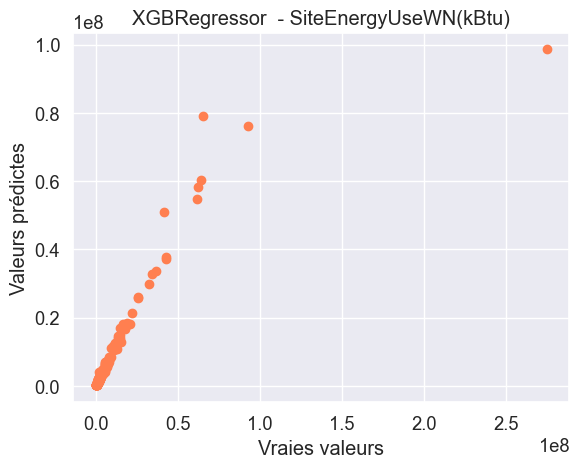

In [151]:
plt.title("XGBRegressor  - SiteEnergyUseWN(kBtu)")
plt.scatter(y_test, y_xgb_pred, color='coral')
plt.xlabel("Vraies valeurs")
plt.ylabel("Valeurs prédictes")

## Tableau recapitulatif des quatres modeles

linéaire
R-squared:	1.000
RMSE: 12065015.44

LSVR
RMSE: 20705.16
Coefficient of determination (R²): 1.00

Random Forest
RMSE: 12065015.44
Coefficient of determination (R²): 0.64

XGBoost
RMSE: 11121601.93
Coefficient of determination (R²): 0.70

### Test des hypothèses

## MODELE RETENU ET PREDICTIONS

D'Après les analyses, le modèle LSVR donne le meilleur compromis de performance.
En effet, il est meilleur en terme de score r2 et également meilleur en terme de score RMSE. Par conséquent nous 
le conserverons et essayerons d'appliquer les différentes techniques de régularisation enfin de le rendre plus performant.

### CAS DU MODELE XGBoost

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from datetime import datetime
start_time = datetime.now()

# On fixe les valeurs des hyperparamètres à tester
param_grid = {'n_estimators':  [5, 100, 200],  
              'max_depth': [20,50,5],
              'learning_rate': [0.02, 0.05, 0.1],
              'gamma': [0.5, 1, 3],
            'min_child_weight': [1, 3, 5],
             }
                
# Choisir un score à optimiser
score = 'r2'

# define the model/ estimator
model = XGBRegressor(random_state=42, verbosity = 0) #verbosity = 0 : silent : les messages warning ne sont pas 
                                                #affichés.  (0 :"silent", 1:"warning", 2:"info", 3:"debug")
# On utilise GridSearchCV
xgbr= GridSearchCV(model, param_grid, scoring=score, cv=5)   

# On optimise sur le jeu d'entraînement
xgbr.fit(X_train_seuwn, y_train_seuwn)

# On généralise
y_xgbr_seuwn_pred = xgbr.predict(X_test_seuwn)

# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
print(xgbr.best_params_)
print(' ')
print("Meilleur(s) score sur le jeu d'entraînement:")
print(xgbr.best_score_)
print(' ')

#RMSE
print("RMSE: %.3f" % np.sqrt(mean_squared_error(y_test_seuwn, y_xgbr_seuwn_pred)))
print(' ')
# Afficher les performances correspondantes
print("Résultats de la validation croisée :")
for mean, std, params in zip(
        xgbr.cv_results_['mean_test_score'], # score moyen
        xgbr.cv_results_['std_test_score'],  # écart-type du score
        xgbr.cv_results_['params']           # valeur de l'hyperparamètre
    ):

    print("{} = {:.3f} (+/-{:.03f}) for {}".format(
        score,
        mean,
        std*2,
        params
    ) )
end_time = datetime.now()
print('Durée d\'exécution : {}'.format(end_time - start_time))

### ALGORITHME DU MODELE AU CAS OU C'EST LINEAIRE

## Regularisation du modele avec Usage de Ridge, Lasso et Elastic Net 

 
Dans cette partie, quelques soit la regularisation de base adaptée,
pour évaluer les performances de notre modèle nous allons utilisés la MSE car l'objectif 
étant de minimiser la fonction de perte ( fonction mesurant l'écart entre la valeur prédite et la valeur réelle)
cela nous ramènes à un problème d'optimisation et qui dit optimisation dit dérivation. La MSE ayant les bonne propriétés mathématique sera donc la mieux adaptée.



##### Créer et ajuster le modèle RidgeCV

In [159]:

alphas = np.linspace(0.01, 1, 100) # Liste des valeurs possibles pour le paramètre alpha
ridge_cv = RidgeCV(alphas=alphas, cv=7) # cv est le nombre de plis (folds) pour la validation croisée
ridge_cv.fit(X_train, y_train)

# Obtenir le meilleur paramètre alpha
best_alpha = ridge_cv.alpha_
print(f"Best alpha: {best_alpha}")

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=5.30767e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=6.04926e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=5.49645e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=5.31204e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-c

Best alpha: 1.0


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=4.87972e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=4.61785e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=5.64736e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=4.18063e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=4.38114e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=5.341e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=5.89429e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=4.37541e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-con

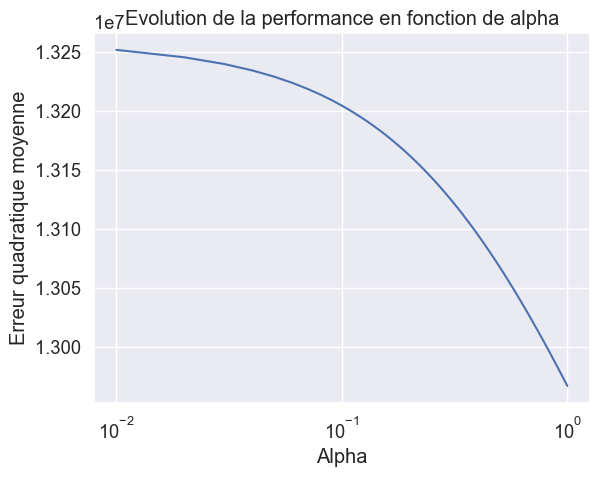

In [160]:
mse_scores = []
for alpha in alphas:
    model = Ridge(alpha=alpha)
    mse_score = np.mean(-cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=5))
    mse_scores.append(mse_score)

plt.plot(alphas, mse_scores)
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Erreur quadratique moyenne')
plt.title('Evolution de la performance en fonction de alpha')
plt.show()

#### création et ajustement de Lasso

In [163]:

alphas = [0.001, 1.0, 10.0, 100.0]
lasso_cv = LassoCV(alphas=alphas, cv=5)
lasso_cv.fit(X_train, y_train)

# Obtenir le meilleur paramètre alpha
best_alpha = lasso_cv.alpha_
print(f"Best alpha: {best_alpha}")

Best alpha: 100.0


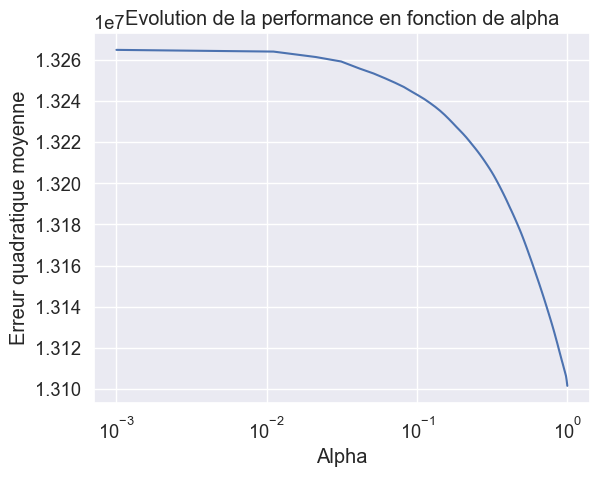

In [164]:
# Tracer le graphique d'évolution des performances en fonction de l'alpha
alphas = np.linspace(0.001, 1, 100) # Liste des valeurs possibles pour le paramètre alpha
mse_scores = []
for alpha in alphas:
    model = Lasso(alpha=alpha)
    mse_score = np.mean(-cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=5))
    mse_scores.append(mse_score)

plt.plot(alphas, mse_scores)
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Erreur quadratique moyenne')
plt.title('Evolution de la performance en fonction de alpha')
plt.show()

#### Créer un modèle de régression ElasticNet avec validation croisée de ElasticNetCV

In [165]:

model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], alphas=np.logspace(-5, 5, 11), cv=5)

# Ajuster le modèle aux données
model.fit(X_train, y_train)

# Trouver le meilleur alpha et le meilleur l1_ratio
best_alpha = model.alpha_
best_l1_ratio = model.l1_ratio_

# Imprimer le meilleur alpha et le meilleur l1_ratio
print("Meilleur alpha:", best_alpha)
print("Meilleur l1_ratio:", best_l1_ratio)

Meilleur alpha: 10000.0
Meilleur l1_ratio: 0.99


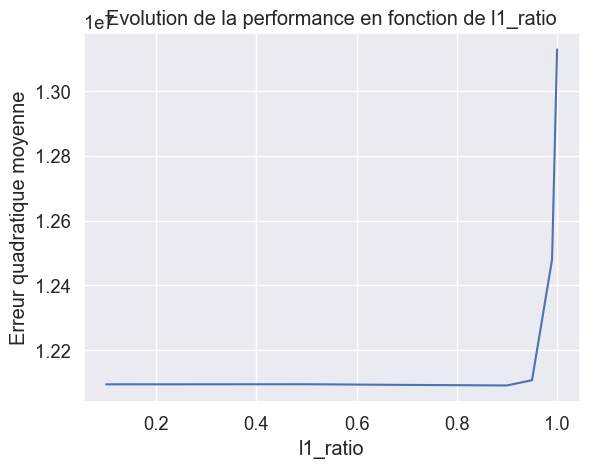

In [166]:
# Tracer le graphique d'évolution des performances en fonction de l'alpha
alphas = np.logspace(-5, 5, 11)
mse_scores = {}
for l1_ratio in [.1, .5, .7, .9, .95, .99, 1]:
    model = ElasticNet(alpha=best_alpha, l1_ratio=l1_ratio)
    mse_score = np.mean(-cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=5))
    mse_scores[l1_ratio] = mse_score

plt.plot(list(mse_scores.keys()), list(mse_scores.values()))
plt.xlabel('l1_ratio')
plt.ylabel('Erreur quadratique moyenne')
plt.title('Evolution de la performance en fonction de l1_ratio')
plt.show()

In [ ]:
resumé des trois modèles

In [167]:
# Créer des modèles de régression Ridge, Lasso et ElasticNet avec validation croisée
ridge_model = RidgeCV(alphas=np.logspace(-5, 5, 11), cv=5)
lasso_model = LassoCV(alphas=np.logspace(-5, 5, 11), cv=5)
enet_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], alphas=np.logspace(-5, 5, 11), cv=5)

# Ajuster les modèles aux données d'apprentissage
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)
enet_model.fit(X_train, y_train)

# Prédire les valeurs pour les données d'apprentissage et de test
ridge_train_pred = ridge_model.predict(X_train)
ridge_test_pred = ridge_model.predict(X_test)
lasso_train_pred = lasso_model.predict(X_train)
lasso_test_pred = lasso_model.predict(X_test)
enet_train_pred = enet_model.predict(X_train)
enet_test_pred = enet_model.predict(X_test)

# Calculer le R2 et le RMSE pour les données d'apprentissage et de test
ridge_train_r2 = r2_score(y_train, ridge_train_pred)
ridge_test_r2 = r2_score(y_test, ridge_test_pred)
ridge_train_rmse = np.sqrt(mean_squared_error(y_train, ridge_train_pred))
ridge_test_rmse = np.sqrt(mean_squared_error(y_test, ridge_test_pred))
lasso_train_r2 = r2_score(y_train, lasso_train_pred)
lasso_test_r2 = r2_score(y_test, lasso_test_pred)
lasso_train_rmse = np.sqrt(mean_squared_error(y_train, lasso_train_pred))
lasso_test_rmse = np.sqrt(mean_squared_error(y_test, lasso_test_pred))
enet_train_r2 = r2_score(y_train, enet_train_pred)
enet_test_r2 = r2_score(y_test, enet_test_pred)
enet_train_rmse = np.sqrt(mean_squared_error(y_train, enet_train_pred))
enet_test_rmse = np.sqrt(mean_squared_error(y_test, enet_test_pred))

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=4.3885e-24): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=4.30074e-24): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=5.96643e-24): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=4.39074e-24): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-co

ValueError: X has 121 features, but RidgeCV is expecting 122 features as input.

In [ ]:
data = {'Modèle': ['Ridge', 'Lasso', 'ElasticNet'],
        'R2 sur base train': [ridge_train_r2, lasso_train_r2, enet_train_r2],
'R2 sur base test': [ridge_test_r2, lasso_test_r2, enet_test_r2],
'RMSE sur base train': [ridge_train_rmse, lasso_train_rmse, enet_train_rmse],
'RMSE sur base test': [ridge_test_rmse, lasso_test_rmse, enet_test_rmse]}

df = pd.DataFrame(data)
df

### FEATURE IMPORTANCE

In [ ]:
liste_variables=X_test_1.columns
importances = xgbr.best_estimator_.feature_importances_
indices = np.argsort(importances)

# style du graphique 
plt.figure(figsize=(8,12))
plt.style.use('fivethirtyeight')
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [liste_variables[i] for i in indices])
plt.xlabel("Modèle Feature Importance")


## predictions "SiteEnergyUseWN(kBtu)"

In [170]:
# Obtention des prédictions et des métriques d'évaluation
y_train_pred = lr_model.predict(sm.add_constant(X_train))
y_test_pred = lr_model.predict(sm.add_constant(X_test))
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

In [171]:
# Construction du tableau de résultats

df_metrics = pd.DataFrame({
    'Métrique': ['R2', 'MSE', 'RMSE'],
    'Train': [r2_train, mse_train, rmse_train],
    'Test': [r2_test, mse_test, rmse_test]
})

print(df_metrics)

  Métrique         Train          Test
0       R2  9.999999e-01  9.999988e-01
1      MSE  1.118085e+07  4.858860e+08
2     RMSE  3.343778e+03  2.204282e+04


In [ ]:
# Tracer les valeurs observées en fonction des valeurs prédites sur les données d'entraînement
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred, color='blue')
plt.xlabel('Observed values')
plt.ylabel('Predicted values')
plt.title('Training data')
plt.plot(np.arange(0, 55, 5), np.arange(0, 55, 5), color='red')
plt.show()



### ANALYSE DU MODELE RETENU DANS LE CAS DE L'INTRODUCTION DE LA VARIABLE "ENERGYSTARScore"

### MODELE

 Calcul du R^2 du RMSE

Affichage des valeurs réels et des valeurs prédites

representation graphique

### Feature importance

In [ ]:
liste_variables=X_test_tghge.columns
importances = xgbr.best_estimator_.feature_importances_
indices = np.argsort(importances)

# style du graphique 
plt.figure(figsize=(8,16))
plt.style.use('fivethirtyeight')
plt.title('Feature Importances avec EnergyStarScore')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [liste_variables[i] for i in indices])
plt.xlabel("Modele Feature Importance")